In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

Use the following line to show all columns

In [2]:
pd.set_option('display.max_columns', None)

Use the following line to reset max columns shown

In [3]:
# pd.reset_option('display.max_columns')

# Load Matchup data

In [3]:
matchup_df_1920 = pd.read_csv("./data/season_1920/1920matchup_03.csv", index_col=0, parse_dates=['game_date'])

In [5]:
matchup_df_1819 = pd.read_csv("./data/season_1819/1819matchup_01.csv", index_col=0, parse_dates=['game_date'])

In [6]:
matchup_df_1718 = pd.read_csv("./data/season_1718/1718matchup_02.csv", index_col=0, parse_dates=['game_date'])

In [4]:
#delete it later
# matchup_df = matchup_df_1718
matchup_df = matchup_df_1920

In [7]:
matchup_df = pd.concat([matchup_df_1718, matchup_df_1819, matchup_df_1920])

In [5]:
matchup_df.head()

,a0,a0_id,a1,a1_id,a2,a2_id,a3,a3_id,a4,a4_id,away_AST,away_BLK,away_DREB,away_ElapsedTime,away_FG3A,away_FG3M,away_FG3_PCT,away_FGA,away_FGM,away_FG_PCT,away_FTA,away_FTM,away_FT_PCT,away_OREB,away_PF,away_PLUS_MINUS,away_PTS,away_Possessions,away_REB,away_STL,away_TO,game_date,game_id,h0,h0_id,h1,h1_id,h2,h2_id,h3,h3_id,h4,h4_id,home_AST,home_BLK,home_DREB,home_ElapsedTime,home_FG3A,home_FG3M,home_FG3_PCT,home_FGA,home_FGM,home_FG_PCT,home_FTA,home_FTM,home_FT_PCT,home_OREB,home_PF,home_PLUS_MINUS,home_PTS,home_Possessions,home_REB,home_STL,home_TO
0,Al Horford,201143,Ben Simmons,1627732,Joel Embiid,203954,Josh Richardson,1626196,Tobias Harris,202699,4,0,6,0 days 00:05:26.000000000,3,2,0,10,6,0,0,0,0,2,3,6,14,12,8,1,4,2019-11-15,21900172,Chris Paul,101108,Danilo Gallinari,201568,Shai Gilgeous-Alexander,1628983,Steven Adams,203500,Terrance Ferguson,1628390,3,0,2,0 days 00:04:27.000000000,3,1,0,9,3,0,2,1,0,1,1,-6,8,11,3,2,2
1,Al Horford,201143,Ben Simmons,1627732,Furkan Korkmaz,1627788,James Ennis III,203516,Tobias Harris,202699,0,0,0,0 days 00:00:00.000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2019-11-15,21900172,Chris Paul,101108,Danilo Gallinari,201568,Shai Gilgeous-Alexander,1628983,Steven Adams,203500,Terrance Ferguson,1628390,0,0,0,0 days 00:00:00.000000000,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
2,Al Horford,201143,Ben Simmons,1627732,Furkan Korkmaz,1627788,James Ennis III,203516,Tobias Harris,202699,0,0,1,0 days 00:00:52.000000000,0,0,0,4,2,0,0,0,0,1,0,2,4,3,2,1,0,2019-11-15,21900172,Danilo Gallinari,201568,Dennis Schroder,203471,Nerlens Noel,203457,Shai Gilgeous-Alexander,1628983,Terrance Ferguson,1628390,0,0,1,0 days 00:01:13.000000000,1,0,0,2,1,0,0,0,0,0,0,-2,2,3,1,0,1
3,Al Horford,201143,Ben Simmons,1627732,Furkan Korkmaz,1627788,James Ennis III,203516,Tobias Harris,202699,1,0,1,0 days 00:01:22.000000000,0,0,0,3,3,1,0,0,0,0,1,2,6,3,1,0,0,2019-11-15,21900172,Abdel Nader,1627846,Danilo Gallinari,201568,Dennis Schroder,203471,Nerlens Noel,203457,Shai Gilgeous-Alexander,1628983,0,0,0,0 days 00:01:31.000000000,0,0,0,2,1,0,2,2,0,0,0,-2,4,2,0,0,0
4,Furkan Korkmaz,1627788,Joel Embiid,203954,Josh Richardson,1626196,Mike Scott,203118,Raul Neto,203526,1,0,1,0 days 00:03:10.000000000,1,1,1,4,2,0,2,0,1,0,2,-5,5,6,1,0,1,2019-11-15,21900172,Abdel Nader,1627846,Darius Bazley,1629647,Dennis Schroder,203471,Nerlens Noel,203457,Terrance Ferguson,1628390,2,0,3,0 days 00:03:03.000000000,1,1,1,4,3,0,4,3,1,0,2,5,10,7,3,1,1


# Build name player_id map

In [6]:
player_df = matchup_df[['a0', 'a0_id']].rename(columns={'a0':'name', 'a0_id':'id'})\
    .append(matchup_df[['a1', 'a1_id']].rename(columns={'a1':'name', 'a1_id':'id'}))\
    .append(matchup_df[['a2', 'a2_id']].rename(columns={'a2':'name', 'a2_id':'id'}))\
    .append(matchup_df[['a3', 'a3_id']].rename(columns={'a3':'name', 'a3_id':'id'}))\
    .append(matchup_df[['a4', 'a4_id']].rename(columns={'a4':'name', 'a4_id':'id'}))\
    .append(matchup_df[['h0', 'h0_id']].rename(columns={'h0':'name', 'h0_id':'id'}))\
    .append(matchup_df[['h1', 'h1_id']].rename(columns={'h1':'name', 'h1_id':'id'}))\
    .append(matchup_df[['h2', 'h2_id']].rename(columns={'h2':'name', 'h2_id':'id'}))\
    .append(matchup_df[['h3', 'h3_id']].rename(columns={'h3':'name', 'h3_id':'id'}))\
    .append(matchup_df[['h4', 'h4_id']].rename(columns={'h4':'name', 'h4_id':'id'}))\
    .drop_duplicates()

In [7]:
name_to_id =  pd.Series(player_df.id.values,index=player_df.name).to_dict()

In [8]:
id_to_name =  pd.Series(player_df.name.values,index=player_df.id).to_dict()

## Build game id game date map

In [9]:
game_df = matchup_df[['game_date', 'game_id']].drop_duplicates().sort_values(['game_date', 'game_id'])

In [10]:
game_df

,game_date,game_id
0,2019-10-22,21900001
0,2019-10-22,21900002
0,2019-10-23,21900003
0,2019-10-23,21900004
0,2019-10-23,21900005
...,...,...
0,2020-03-10,21900968
0,2020-03-11,21900969
0,2020-03-11,21900970
0,2020-03-11,21900971


In [11]:
game_df[:901]

,game_date,game_id
0,2019-10-22,21900001
0,2019-10-22,21900002
0,2019-10-23,21900003
0,2019-10-23,21900004
0,2019-10-23,21900005
...,...,...
0,2020-03-01,21900898
0,2020-03-01,21900899
0,2020-03-01,21900900
0,2020-03-01,21900901


In [12]:
# game_df[game_df['game_date'] > datetime(2020, 3, 1)]
game_df[game_df['game_date'] > datetime(2018, 2, 26)]

,game_date,game_id
0,2019-10-22,21900001
0,2019-10-22,21900002
0,2019-10-23,21900003
0,2019-10-23,21900004
0,2019-10-23,21900005
...,...,...
0,2020-03-10,21900968
0,2020-03-11,21900969
0,2020-03-11,21900970
0,2020-03-11,21900971


# Helper Function

Calculate RAPM for the last n games until a specific date

In [13]:
def add_to_prev_stint(points, weights, PTS):
    
    try:
        prev_ortg = points.pop()
        prev_poss = weights.pop()
    except:
        return
        
    prev_PTS = int(prev_ortg * prev_poss / 100)
    prev_PTS += PTS
    
    try:
        prev_ortg = 100 * prev_PTS / prev_poss
    except:
        add_to_prev_stint(points, weights, prev_PTS)
        prev_ortg = 0

    points.append(prev_ortg)
    weights.append(prev_poss)

In [14]:
from sklearn.feature_extraction import DictVectorizer
from sklearn import linear_model

def calculate_RAPM(matchup_df, n_games, until_date=datetime.now()):
    # build game df using matchup df
    game_df = matchup_df[['game_date', 'game_id']].drop_duplicates().sort_values(['game_date', 'game_id'])
    
    try:
        game_ids = game_df[game_df['game_date'] <= until_date]['game_id'][-n_games:].tolist()
    except Exception as e:
        print('An error occured when trying to get game ids. Exception: ' + e)
        return None
    
    desired_matchup_df = matchup_df[matchup_df['game_id'].isin(game_ids)]
    
#     units = []
#     points = []
#     weights = []

    home_units = []
    home_points = []
    home_weights = []
    
    away_units = []
    away_points = []
    away_weights = []
    
    matchup_data = desired_matchup_df.to_dict('records')
    
#     i = 0
    for d in matchup_data:
#         print("i: ", i)
#         i += 1
        home_poss = int(d['home_Possessions'])
        away_poss = int(d['away_Possessions'])
#         print("home_poss: ", home_poss)
#         print("away_poss: ", away_poss)

        home_name = [d['h0'],d['h1'],d['h2'],d['h3'],d['h4']]
        home_id = [d['h0_id'],d['h1_id'],d['h2_id'],d['h3_id'],d['h4_id']]
        away_name = [d['a0'],d['a1'],d['a2'],d['a3'],d['a4']]
        away_id = [d['a0_id'],d['a1_id'],d['a2_id'],d['a3_id'],d['a4_id']]
        home_offense_unit = {"{},offense".format(name): 1 for name in home_name}
        home_defense_unit = {"{},defense".format(name): 1 for name in home_name}
        away_offense_unit = {"{},offense".format(name): 1 for name in away_name}
        away_defense_unit = {"{},defense".format(name): 1 for name in away_name}

        home_stint = home_offense_unit.copy()
        home_stint.update(away_defense_unit)
#         home_stint.update({'HCA': 1}) #home count advantage
        away_stint = away_offense_unit.copy()
        away_stint.update(home_defense_unit)
#         away_stint.update({'HCA': -1}) 
        
#         if away_poss >= 1 and home_poss < 1:
#             print("discrepency between home posseessions and away possessions")
#             print("d: ", d)

        if home_poss >= 1:  # to avoid some ill-conditioning we only use stints that have possessions >= 1
            home_ortg = 100 * int(d['home_PTS']) / home_poss
            home_units.append(home_stint)
            home_points.append(home_ortg)
            home_weights.append(home_poss)
        else:
#             print("home_poss: " + str(home_poss) + ", home_PTS: " + str(d['home_PTS']))
#             prev_home_ortg = home_points.pop()
#             prev_home_poss = home_weights[-1]
#             prev_home_PTS = int(prev_home_ortg * home_poss / 100)
#             prev_home_PTS += int(d['home_PTS'])
#             prev_home_ortg = 100 * prev_home_PTS / prev_home_poss

#             home_points.append(prev_home_ortg)
            add_to_prev_stint(home_points, home_weights, int(d['home_PTS']))
            
            home_units.append(home_stint)
            home_points.append(0)
            home_weights.append(0)

        if away_poss >= 1:
            away_ortg = 100 * int(d['away_PTS']) / away_poss
            away_units.append(away_stint)
            away_points.append(away_ortg)
            away_weights.append(away_poss)
        else:
#             print("away_poss: " + str(away_poss) + ", away_PTS: " + str(d['away_PTS']))
#             prev_away_ortg = away_points.pop()
#             prev_away_poss = away_weights[-1]
#             prev_away_PTS = int(prev_away_ortg * away_poss / 100)
#             prev_away_PTS += int(d['away_PTS'])
#             prev_away_ortg = 100 * prev_away_PTS / prev_away_poss

#             away_points.append(prev_away_ortg)
            add_to_prev_stint(away_points, away_weights, int(d['away_PTS']))
            
            away_units.append(away_stint)
            away_points.append(0)
            away_weights.append(0)
    
    units = home_units + away_units
    points = home_points + away_points
    weights = home_weights + away_weights
    
    u = DictVectorizer(sparse=False)
    u_mat = u.fit_transform(units)
    
    players = u.get_feature_names()
    
    clf = linear_model.RidgeCV(alphas=(np.array([0.01, 0.1, 1.0, 10, 100, 500, 750, 1000, 1500, 2000, 5000])), 
                               cv=5)
#     clf = linear_model.RidgeCV(alphas=(np.array([2000, 5000])), cv=5)
#     clf = linear_model.RidgeCV(alphas=(np.array([0.01, 0.1, 1.0])), cv=5)
#     print("len(points): ", len(points))
#     print("len(weights): ", len(weights))
#     print("u_mat.shape: ", u_mat.shape)
    clf.fit(u_mat, points, sample_weight=weights)
    
    # Debug
    print("clf.alpha_: ", clf.alpha_)
    print("clf.score: ", clf.score(u_mat, points, sample_weight=weights))
    
    ratings = []
    for player in players:
        ratings.append((player, clf.coef_[players.index(player)]))
    ratings.sort(key=lambda tup: tup[1], reverse=True)  # sort by rating in descending order
#     print("len(ratings): ", len(ratings))
    
    player_name_list = []
    player_id_list = []
    ORAPM_list = []
    DRAPM_list = []
    for rating in ratings:
        if(rating[0] != 'HCA'):
            string = rating[0].split(',')
            if(string[0] not in player_name_list):
                player_name_list.append(string[0])  
                player_id_list.append(name_to_id[string[0]])
            if(string[1] == 'offense'):
                ORAPM_list.append(rating[1])
            else:
                DRAPM_list.append(-rating[1])    
    RAPM_list = []
    for i in range(len(ORAPM_list)):
        RAPM_list.append(ORAPM_list[i]+DRAPM_list[i]) 
    RAPM_dict = {'Player': player_name_list, 'PlayerId': player_id_list, 
                 'ORAPM': ORAPM_list,'DRAPM': DRAPM_list,'RAPM': RAPM_list }
#     print("len(player_name_list): ", len(player_name_list))
#     print("len(player_id_list): ", len(player_id_list))
#     print("len(ORAPM_list): ", len(ORAPM_list))
#     print("len(DRAPM_list): ", len(DRAPM_list))
#     print("len(RAPM_list): ", len(RAPM_list))
    
    RAPM_df = pd.DataFrame(data=RAPM_dict)
    return RAPM_df.sort_values(by=['RAPM'],ascending=False)

In [21]:
calculate_RAPM(matchup_df, n_games = 900, until_date=datetime(2020, 3, 1))

clf.alpha_:  2000.0
clf.score:  0.01660146920450789


,Player,PlayerId,ORAPM,DRAPM,RAPM
1,Trae Young,1629027,4.296437,-3.340585,0.955853
2,Ben McLemore,203463,3.952113,-3.276293,0.675820
0,Chris Paul,101108,4.331134,-3.751848,0.579287
7,Duncan Robinson,1629130,3.581141,-3.068518,0.512623
9,Davis Bertans,202722,3.316378,-2.828899,0.487479
...,...,...,...,...,...
396,John Collins,1628381,-0.972000,0.745150,-0.226850
394,Jarrell Brantley,1629714,-0.962290,0.734698,-0.227592
397,Thanasis Antetokounmpo,203648,-0.976795,0.747944,-0.228852
395,Vic Law,1629724,-0.965721,0.736729,-0.228992


In [35]:
calculate_RAPM(matchup_df, n_games = 3000, until_date=datetime(2020, 3, 1))

clf.alpha_:  5000.0
clf.score:  0.011003837763581714


,Player,PlayerId,ORAPM,DRAPM,RAPM
2,Damian Lillard,203081,4.371912,-2.717163,1.654749
1,Kevin Durant,201142,4.542054,-3.067529,1.474524
3,Chris Paul,101108,4.071624,-2.657125,1.414499
4,James Harden,201935,3.706014,-2.351255,1.354759
0,Stephen Curry,201939,4.706625,-3.379975,1.326650
...,...,...,...,...,...
640,Jarred Vanderbilt,1629020,-0.790104,0.648442,-0.141662
643,Gorgui Dieng,203476,-0.811939,0.663083,-0.148856
642,Tony Parker,2225,-0.811599,0.657988,-0.153611
641,Isaiah Taylor,1627819,-0.808864,0.649334,-0.159529


In [36]:
calculate_RAPM(matchup_df, n_games = 2000, until_date=datetime(2020, 3, 1))

clf.alpha_:  5000.0
clf.score:  0.011204172253086675


,Player,PlayerId,ORAPM,DRAPM,RAPM
2,Collin Sexton,1629012,3.470009,-2.415245,1.054764
3,Davis Bertans,202722,3.371201,-2.367371,1.003830
5,Stephen Curry,201939,3.192314,-2.243361,0.948954
4,Damian Lillard,203081,3.195149,-2.300383,0.894767
7,Trae Young,1629027,2.747428,-1.932713,0.814715
...,...,...,...,...,...
438,T.J. Warren,203933,-0.352436,0.196631,-0.155805
439,William Howard,1629739,-0.354215,0.197207,-0.157008
442,Tremont Waters,1629682,-0.365011,0.206613,-0.158398
646,Stanley Johnson,1626169,-3.012686,2.734197,-0.278489


In [38]:
calculate_RAPM(matchup_df, 900, until_date=datetime(2020, 3, 1))

clf.alpha_:  2000.0
clf.score:  0.01660146920450789


,Player,PlayerId,ORAPM,DRAPM,RAPM
1,Trae Young,1629027,4.296437,-3.340585,0.955853
2,Ben McLemore,203463,3.952113,-3.276293,0.675820
0,Chris Paul,101108,4.331134,-3.751848,0.579287
7,Duncan Robinson,1629130,3.581141,-3.068518,0.512623
9,Davis Bertans,202722,3.316378,-2.828899,0.487479
...,...,...,...,...,...
396,John Collins,1628381,-0.972000,0.745150,-0.226850
394,Jarrell Brantley,1629714,-0.962290,0.734698,-0.227592
397,Thanasis Antetokounmpo,203648,-0.976795,0.747944,-0.228852
395,Vic Law,1629724,-0.965721,0.736729,-0.228992


In [37]:
calculate_RAPM(matchup_df, 600, until_date=datetime(2020, 3, 1))

clf.alpha_:  5000.0
clf.score:  0.012001482604188317


,Player,PlayerId,ORAPM,DRAPM,RAPM
500,Gorgui Dieng,203476,-1.732167,2.261110,0.528942
20,Trae Young,1629027,1.211144,-1.034239,0.176905
68,Landry Shamet,1629013,0.754782,-0.582305,0.172478
496,Kelan Martin,1629103,-1.559951,1.731688,0.171737
499,DeAndre Jordan,201599,-1.701717,1.871746,0.170029
...,...,...,...,...,...
451,Troy Daniels,203584,-0.837002,0.674635,-0.162367
456,Svi Mykhailiuk,1629004,-0.896444,0.732925,-0.163519
450,Thanasis Antetokounmpo,203648,-0.836302,0.668195,-0.168108
449,Stanley Johnson,1626169,-0.832285,0.663568,-0.168718


In [39]:
calculate_RAPM(matchup_df, 700, until_date=datetime(2020, 3, 1))

clf.alpha_:  5000.0
clf.score:  0.012084551672919885


,Player,PlayerId,ORAPM,DRAPM,RAPM
503,Gorgui Dieng,203476,-1.787808,2.561706,0.773898
5,Royce O'Neale,1626220,1.892324,-1.495926,0.396399
6,Bradley Beal,203078,1.818455,-1.488270,0.330184
4,Collin Sexton,1629012,1.905116,-1.575484,0.329632
502,DeAndre Jordan,201599,-1.781946,2.079644,0.297698
...,...,...,...,...,...
461,Willy Hernangomez,1626195,-0.961972,0.833042,-0.128931
481,Kent Bazemore,203145,-1.252258,1.092576,-0.159682
479,Dwayne Bacon,1628407,-1.241820,1.079339,-0.162481
482,Timothe Luwawu-Cabarrot,1627789,-1.263740,1.096716,-0.167024


In [40]:
calculate_RAPM(matchup_df, 800)

clf.alpha_:  2000.0
clf.score:  0.01733410616029063


,Player,PlayerId,ORAPM,DRAPM,RAPM
510,Gorgui Dieng,203476,-3.176996,4.423482,1.246486
0,Chris Paul,101108,4.580672,-3.508259,1.072413
509,Willie Cauley-Stein,1626161,-3.155695,4.134067,0.978372
508,Raul Neto,203526,-3.148068,4.014393,0.866325
507,Ky Bowman,1629065,-3.121787,3.660261,0.538474
...,...,...,...,...,...
466,Victor Oladipo,203506,-1.817239,1.498694,-0.318545
462,Dante Exum,203957,-1.745920,1.426558,-0.319362
493,Garrett Temple,202066,-2.566184,2.241747,-0.324437
491,Timothe Luwawu-Cabarrot,1627789,-2.497780,2.150576,-0.347204


In [41]:
calculate_RAPM(matchup_df, 900)

clf.alpha_:  5000.0
clf.score:  0.011590194627164596


,Player,PlayerId,ORAPM,DRAPM,RAPM
512,Gorgui Dieng,203476,-2.063333,2.817654,0.754321
511,Willie Cauley-Stein,1626161,-2.022911,2.597645,0.574734
510,Raul Neto,203526,-2.007865,2.444537,0.436672
0,Chris Paul,101108,2.741844,-2.368361,0.373484
5,Luka Doncic,1629029,2.085400,-1.786248,0.299152
...,...,...,...,...,...
457,Mason Plumlee,203486,-0.880726,0.786619,-0.094108
464,Russell Westbrook,201566,-0.951805,0.855897,-0.095909
461,Hamidou Diallo,1628977,-0.926433,0.819145,-0.107288
463,Daniel Gafford,1629655,-0.940911,0.829802,-0.111109


In [67]:
RAPM = calculate_RAPM(matchup_df, 400)

clf.alpha_:  5000.0
len(player_name_list):  484
len(player_id_list):  484
len(ORAPM_list):  484
len(DRAPM_list):  484
len(RAPM_list):  484


In [85]:
RAPM[RAPM['PlayerId'] == 101108].to_dict('records')

[{'Player': 'Chris Paul',
  'PlayerId': 101108,
  'ORAPM': 2.073835792389313,
  'DRAPM': -1.7058720910439011,
  'RAPM': 0.367963701345412}]

In [15]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), Ridge(**kwargs))

def calculate_RAPM_v2(matchup_df, n_games, until_date=datetime.now()):
    # build game df using matchup df
    game_df = matchup_df[['game_date', 'game_id']].drop_duplicates().sort_values(['game_date', 'game_id'])
    
    try:
        game_ids = game_df[game_df['game_date'] <= until_date]['game_id'][-n_games:].tolist()
    except Exception as e:
        print('An error occured when trying to get game ids. Exception: ' + e)
        return None
    
    desired_matchup_df = matchup_df[matchup_df['game_id'].isin(game_ids)]
    
#     units = []
#     points = []
#     weights = []

    home_units = []
    home_points = []
    home_weights = []
    
    away_units = []
    away_points = []
    away_weights = []
    
    matchup_data = desired_matchup_df.to_dict('records')
    
#     i = 0
    for d in matchup_data:
#         print("i: ", i)
#         i += 1
        home_poss = int(d['home_Possessions'])
        away_poss = int(d['away_Possessions'])
#         print("home_poss: ", home_poss)
#         print("away_poss: ", away_poss)

        home_name = [d['h0'],d['h1'],d['h2'],d['h3'],d['h4']]
        home_id = [d['h0_id'],d['h1_id'],d['h2_id'],d['h3_id'],d['h4_id']]
        away_name = [d['a0'],d['a1'],d['a2'],d['a3'],d['a4']]
        away_id = [d['a0_id'],d['a1_id'],d['a2_id'],d['a3_id'],d['a4_id']]
        home_offense_unit = {"{},offense".format(name): 1 for name in home_name}
        home_defense_unit = {"{},defense".format(name): 1 for name in home_name}
        away_offense_unit = {"{},offense".format(name): 1 for name in away_name}
        away_defense_unit = {"{},defense".format(name): 1 for name in away_name}

        home_stint = home_offense_unit.copy()
        home_stint.update(away_defense_unit)
#         home_stint.update({'HCA': 1}) #home count advantage
        away_stint = away_offense_unit.copy()
        away_stint.update(home_defense_unit)
#         away_stint.update({'HCA': -1}) 
        
#         if away_poss >= 1 and home_poss < 1:
#             print("discrepency between home posseessions and away possessions")
#             print("d: ", d)

        if home_poss >= 1:  # to avoid some ill-conditioning we only use stints that have possessions >= 1
            home_ortg = 100 * int(d['home_PTS']) / home_poss
            home_units.append(home_stint)
            home_points.append(home_ortg)
            home_weights.append(home_poss)
        else:
#             print("home_poss: " + str(home_poss) + ", home_PTS: " + str(d['home_PTS']))
#             prev_home_ortg = home_points.pop()
#             prev_home_poss = home_weights[-1]
#             prev_home_PTS = int(prev_home_ortg * home_poss / 100)
#             prev_home_PTS += int(d['home_PTS'])
#             prev_home_ortg = 100 * prev_home_PTS / prev_home_poss

#             home_points.append(prev_home_ortg)
            add_to_prev_stint(home_points, home_weights, int(d['home_PTS']))
            
            home_units.append(home_stint)
            home_points.append(0)
            home_weights.append(0)

        if away_poss >= 1:
            away_ortg = 100 * int(d['away_PTS']) / away_poss
            away_units.append(away_stint)
            away_points.append(away_ortg)
            away_weights.append(away_poss)
        else:
#             print("away_poss: " + str(away_poss) + ", away_PTS: " + str(d['away_PTS']))
#             prev_away_ortg = away_points.pop()
#             prev_away_poss = away_weights[-1]
#             prev_away_PTS = int(prev_away_ortg * away_poss / 100)
#             prev_away_PTS += int(d['away_PTS'])
#             prev_away_ortg = 100 * prev_away_PTS / prev_away_poss

#             away_points.append(prev_away_ortg)
            add_to_prev_stint(away_points, away_weights, int(d['away_PTS']))
            
            away_units.append(away_stint)
            away_points.append(0)
            away_weights.append(0)
    
    units = home_units + away_units
    points = home_points + away_points
    weights = home_weights + away_weights
    
    u = DictVectorizer(sparse=False)
    u_mat = u.fit_transform(units)
    
    players = u.get_feature_names()
    
    param_grid = {'polynomialfeatures__degree': np.arange(5),
                  'ridge__alpha': [0.01, 0.1, 1.0, 10, 100, 500, 750, 1000, 1500, 2000, 5000]}
    grid = GridSearchCV(PolynomialRegression(), param_grid, cv=5)
    
#     clf = linear_model.RidgeCV(alphas=(np.array([2000, 5000])), cv=5)
#     clf = linear_model.RidgeCV(alphas=(np.array([0.01, 0.1, 1.0])), cv=5)
#     print("len(points): ", len(points))
#     print("len(weights): ", len(weights))
#     print("u_mat.shape: ", u_mat.shape)
    grid.fit(u_mat, points)
    
    # Debug
#     print("clf.alpha_: ", clf.alpha_)
    print("grid.best_estimator_: ", grid.best_estimator_)
    print("grid.score: ", grid.score(u_mat, points))
    
    ratings = []
    for player in players:
        ratings.append((player, clf.coef_[players.index(player)]))
    ratings.sort(key=lambda tup: tup[1], reverse=True)  # sort by rating in descending order
#     print("len(ratings): ", len(ratings))
    
    player_name_list = []
    player_id_list = []
    ORAPM_list = []
    DRAPM_list = []
    for rating in ratings:
        if(rating[0] != 'HCA'):
            string = rating[0].split(',')
            if(string[0] not in player_name_list):
                player_name_list.append(string[0])  
                player_id_list.append(name_to_id[string[0]])
            if(string[1] == 'offense'):
                ORAPM_list.append(rating[1])
            else:
                DRAPM_list.append(-rating[1])    
    RAPM_list = []
    for i in range(len(ORAPM_list)):
        RAPM_list.append(ORAPM_list[i]+DRAPM_list[i]) 
    RAPM_dict = {'Player': player_name_list, 'PlayerId': player_id_list, 
                 'ORAPM': ORAPM_list,'DRAPM': DRAPM_list,'RAPM': RAPM_list }
#     print("len(player_name_list): ", len(player_name_list))
#     print("len(player_id_list): ", len(player_id_list))
#     print("len(ORAPM_list): ", len(ORAPM_list))
#     print("len(DRAPM_list): ", len(DRAPM_list))
#     print("len(RAPM_list): ", len(RAPM_list))
    
    RAPM_df = pd.DataFrame(data=RAPM_dict)
    return RAPM_df.sort_values(by=['RAPM'],ascending=False)

In [ ]:
calculate_RAPM_v2(matchup_df, n_games = 900, until_date=datetime(2020, 3, 1))

In [20]:
calculate_RAPM_v2(matchup_df, n_games = 3000, until_date=datetime(2020, 3, 1))

clf.alpha_:  0.01
clf.l1_ratio_:  0.1
clf.score:  0.00903414135481806


,Player,PlayerId,ORAPM,DRAPM,RAPM
2,James Harden,201935,4.762302,-2.730871,2.031432
5,Damian Lillard,203081,4.410957,-2.482202,1.928755
3,Nikola Jokic,203999,4.531689,-2.603276,1.928413
4,Trae Young,1629027,4.471766,-2.589550,1.882216
6,Kevin Durant,201142,4.096912,-2.376954,1.719958
...,...,...,...,...,...
547,Jeremiah Martin,1629725,-0.448217,0.215393,-0.232824
559,Justin Holiday,203200,-0.513866,0.277305,-0.236561
768,Kyle Anderson,203937,-4.354056,3.887438,-0.466618
766,Sindarius Thornwell,1628414,-3.897542,3.411013,-0.486529


In [21]:
calculate_RAPM_v2(matchup_df, n_games = 2000, until_date=datetime(2020, 3, 1))

clf.alpha_:  0.01
clf.l1_ratio_:  0.1
clf.score:  0.010454181429575993


,Player,PlayerId,ORAPM,DRAPM,RAPM
4,Kevin Durant,201142,4.538784,-3.157487,1.381297
1,Cristiano Felicio,1626245,5.087086,-3.705848,1.381238
7,Giannis Antetokounmpo,203507,3.870956,-2.709790,1.161166
2,James Harden,201935,4.703238,-3.597839,1.105398
3,Bradley Beal,203078,4.551283,-3.472744,1.078538
...,...,...,...,...,...
413,Garrison Mathews,1629726,-0.374529,0.171496,-0.203033
411,Tacko Fall,1629605,-0.359681,0.155588,-0.204093
645,Wendell Carter Jr.,1628976,-4.080248,3.875327,-0.204921
646,Darius Bazley,1629647,-4.326882,3.942668,-0.384214


In [22]:
calculate_RAPM_v2(matchup_df, 600, until_date=datetime(2020, 3, 1))

clf.alpha_:  0.1
clf.l1_ratio_:  0.1
clf.score:  0.0053235617981167715


,Player,PlayerId,ORAPM,DRAPM,RAPM
500,Wes Iwundu,1628411,-1.269662,1.648988,0.379326
498,Harrison Barnes,203084,-1.048305,1.344987,0.296682
499,Mikal Bridges,1628969,-1.110309,1.360159,0.249850
497,Bogdan Bogdanovic,203992,-1.020976,1.244310,0.223335
5,James Harden,201935,1.206342,-0.998102,0.208240
...,...,...,...,...,...
428,Vlatko Cancar,1628427,-0.368121,0.263834,-0.104287
430,Willie Cauley-Stein,1626161,-0.375712,0.270489,-0.105223
431,Willy Hernangomez,1626195,-0.379126,0.273468,-0.105657
432,Yuta Watanabe,1629139,-0.380463,0.273732,-0.106731


In [23]:
calculate_RAPM_v2(matchup_df, 700, until_date=datetime(2020, 3, 1))

clf.alpha_:  0.1
clf.l1_ratio_:  0.1
clf.score:  0.005112800416069985


,Player,PlayerId,ORAPM,DRAPM,RAPM
501,Kent Bazemore,203145,-1.037234,1.553218,0.515983
503,Gorgui Dieng,203476,-1.323874,1.756515,0.432641
502,Wes Iwundu,1628411,-1.226847,1.607165,0.380317
2,Duncan Robinson,1629130,1.342276,-1.049579,0.292697
36,P.J. Tucker,200782,0.629063,-0.425428,0.203636
...,...,...,...,...,...
423,Tacko Fall,1629605,-0.308578,0.216597,-0.091981
422,TJ Leaf,1628388,-0.300701,0.208705,-0.091996
421,T.J. Warren,203933,-0.298013,0.205216,-0.092797
411,Raul Neto,203526,-0.273526,0.179958,-0.093568


In [24]:
calculate_RAPM_v2(matchup_df, 800)

clf.alpha_:  0.1
clf.l1_ratio_:  0.1
clf.score:  0.004638956500586433


,Player,PlayerId,ORAPM,DRAPM,RAPM
510,Gorgui Dieng,203476,-1.253157,1.763894,0.510737
509,Garrett Temple,202066,-1.174135,1.650806,0.476670
26,Khris Middleton,203114,0.717018,-0.488329,0.228690
27,Danuel House Jr.,1627863,0.702610,-0.486775,0.215835
508,Ky Bowman,1629065,-1.161833,1.365947,0.204114
...,...,...,...,...,...
489,DeAndre Jordan,201599,-0.636406,0.566760,-0.069645
493,Abdel Nader,1627846,-0.696971,0.610355,-0.086616
492,Nerlens Noel,203457,-0.691700,0.604825,-0.086875
491,Timothe Luwawu-Cabarrot,1627789,-0.678059,0.590636,-0.087423


In [25]:
calculate_RAPM_v2(matchup_df, 900)

clf.alpha_:  0.01
clf.l1_ratio_:  0.1
clf.score:  0.014987108881020506


,Player,PlayerId,ORAPM,DRAPM,RAPM
2,Duncan Robinson,1629130,5.553330,-4.237910,1.315420
3,JJ Redick,200755,5.408008,-4.158365,1.249643
509,Wes Iwundu,1628411,-4.298222,5.489648,1.191426
510,Kent Bazemore,203145,-4.518226,5.611568,1.093342
10,James Harden,201935,4.515357,-3.561217,0.954140
...,...,...,...,...,...
452,Matthew Dellavedova,203521,-2.105831,1.773477,-0.332354
455,DeMar DeRozan,201942,-2.148048,1.810290,-0.337757
453,Tony Snell,203503,-2.123294,1.781741,-0.341553
454,Ian Mahinmi,101133,-2.128795,1.784357,-0.344438


# Get and Process Play By Play Data

In [26]:
import nba_scraper.nba_scraper as ns

In [27]:
after_2020_03_01_game_ids = game_df[game_df['game_date'] > datetime(2020, 3, 1)]['game_id'].to_list()

In [28]:
after_2020_03_01_pbp_df = ns.scrape_game([str(game_id) for game_id in after_2020_03_01_game_ids])

Scraping game id: 0021900902
Scraping game id: 0021900903
Scraping game id: 0021900904
Scraping game id: 0021900905
Scraping game id: 0021900906
Scraping game id: 0021900907
Scraping game id: 0021900908
Scraping game id: 0021900909
Scraping game id: 0021900910
Scraping game id: 0021900911
Scraping game id: 0021900912
Scraping game id: 0021900913
Scraping game id: 0021900914
Scraping game id: 0021900915
Scraping game id: 0021900916
Scraping game id: 0021900917
Scraping game id: 0021900918
Scraping game id: 0021900919
Scraping game id: 0021900920
Scraping game id: 0021900921
Scraping game id: 0021900922
Scraping game id: 0021900923
Scraping game id: 0021900924
Scraping game id: 0021900925
Scraping game id: 0021900926
Scraping game id: 0021900927
Scraping game id: 0021900928
Scraping game id: 0021900929
Scraping game id: 0021900930
Scraping game id: 0021900931
Scraping game id: 0021900932
Scraping game id: 0021900933
Scraping game id: 0021900934
Scraping game id: 0021900935
Scraping game 

In [29]:
after_2020_03_01_pbp_df

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id
0,0021900902,2,12,0,1,7:11 PM,12:00,None,None,None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,period-start,,NaN,0,NaN,0,NaN,0,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
1,0021900902,4,10,0,1,7:11 PM,12:00,Jump Ball Nance Jr. vs. Gobert: Tip to Mitchell,None,None,None,None,4,1626204,Larry Nance Jr.,1.610613e+09,Cleveland,Cavaliers,CLE,5,203497,Rudy Gobert,1.610613e+09,Utah,Jazz,UTA,5,1628378,Donovan Mitchell,1.610613e+09,Utah,Jazz,UTA,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,CLE,jump-ball,,NaN,0,NaN,0,0.0,0,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
2,0021900902,7,2,1,1,7:11 PM,11:41,None,None,MISS O'Neale 26' 3PT Jump Shot,None,None,5,1626220,Royce O'Neale,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,missed_shot,,0.0,0,Jump Shot,19,19.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
3,0021900902,8,4,0,1,7:11 PM,11:39,None,None,Bogdanovic REBOUND (Off:1 Def:0),None,None,5,202711,Bojan Bogdanovic,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,rebound,,NaN,0,NaN,21,2.0,0,0,1,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
4,0021900902,9,2,1,1,7:12 PM,11:32,None,None,MISS Mitchell 3PT Jump Shot,None,None,5,1628378,Donovan Mitchell,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,missed_shot,,0.0,0,Jump Shot,28,7.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42

In [30]:
after_2020_03_01_pbp_df['event_type_de'].unique()

array(['period-start', 'jump-ball', 'missed_shot', 'rebound', 'turnover',
       'shot', 'foul', 'team-timeout', 'instant-replay', 'free-throw',
       'substitution', 'period-end', 'goal-tending', 11], dtype=object)

In [31]:
after_2020_03_01_shot_df = after_2020_03_01_pbp_df[(after_2020_03_01_pbp_df['event_type_de'] == 'shot') | 
                                                   (after_2020_03_01_pbp_df['event_type_de'] == 'missed_shot')]

In [32]:
after_2020_03_01_shot_df.reset_index(inplace = True, drop=True)
after_2020_03_01_shot_df

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id
0,0021900902,7,2,1,1,7:11 PM,11:41,None,None,MISS O'Neale 26' 3PT Jump Shot,None,None,5,1626220,Royce O'Neale,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,missed_shot,,0.0,0,Jump Shot,19,19.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
1,0021900902,9,2,1,1,7:12 PM,11:32,None,None,MISS Mitchell 3PT Jump Shot,None,None,5,1628378,Donovan Mitchell,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,missed_shot,,0.0,0,Jump Shot,28,7.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
2,0021900902,12,2,1,1,7:12 PM,11:14,MISS Nance Jr. 25' 3PT Jump Shot,None,None,None,None,4,1626204,Larry Nance Jr.,1.610613e+09,Cleveland,Cavaliers,CLE,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,CLE,missed_shot,,0.0,0,Jump Shot,46,14.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
3,0021900902,16,1,52,1,7:12 PM,10:57,Porter Jr. 1' Alley Oop Dunk (2 PTS) (Osman 1 ...,None,None,0 - 2,2,4,1629645,Kevin Porter Jr.,1.610613e+09,Cleveland,Cavaliers,CLE,4,1626224,Cedi Osman,1.610613e+09,Cleveland,Cavaliers,CLE,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,CLE,shot,,1.0,0,Alley Oop Dunk Shot,63,4.0,0,2,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
4,0021900902,22,2,79,1,7:16 PM,10:23,None,None,MISS Bogdanovic 30' 3PT Pullup Jump Shot,None,None,5,202711,Bojan Bogdanovic,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,missed_shot,,0.0,0,Pullup Jump shot,97,14.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [68]:
RAPM_dict = {}

def lookup_RAPM(game_id, player_id):
    if game_df is None:
        print("global object game_df is required to look up games")
        return
    
    if matchup_df is None:
        print("global object matchup_df is required to look up games")
        return
    
    game_id = int(game_id)
    player_id = int(player_id)
    
#     print(game_df[game_df['game_id'] == game_id].to_dict('records'))
    game_date = game_df[game_df['game_id'] == game_id].to_dict('records')[0]['game_date']
    
    if game_date not in RAPM_dict:
        RAPM_dict[game_date] = calculate_RAPM(matchup_df, n_games=900, until_date=game_date)
    
    RAPM = RAPM_dict[game_date]
    return RAPM[RAPM['PlayerId'] == player_id].to_dict('records')[0]

In [51]:
lookup_RAPM("0021900908", "1627763")

clf.alpha_:  2000.0
clf.score:  0.01653950713484098


{'Player': 'Malcolm Brogdon',
 'PlayerId': 1627763,
 'ORAPM': -1.2581166337637408,
 'DRAPM': 1.1625397893907585,
 'RAPM': -0.0955768443729823}

In [69]:
for index, row in after_2020_03_01_shot_df.iterrows():
    print("working on row " + str(index))
    home_player_1_rapms = lookup_RAPM(row['game_id'], row['home_player_1_id'])
    after_2020_03_01_shot_df.loc[index, 'home_player_1_orapm'] = home_player_1_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_1_drapm'] = home_player_1_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_1_rapm'] = home_player_1_rapms['RAPM']
    
    home_player_2_rapms = lookup_RAPM(row['game_id'], row['home_player_2_id'])
    after_2020_03_01_shot_df.loc[index, 'home_player_2_orapm'] = home_player_2_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_2_drapm'] = home_player_2_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_2_rapm'] = home_player_2_rapms['RAPM']
    
    home_player_3_rapms = lookup_RAPM(row['game_id'], row['home_player_3_id'])
    after_2020_03_01_shot_df.loc[index, 'home_player_3_orapm'] = home_player_3_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_3_drapm'] = home_player_3_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_3_rapm'] = home_player_3_rapms['RAPM']
    
    home_player_4_rapms = lookup_RAPM(row['game_id'], row['home_player_4_id'])
    after_2020_03_01_shot_df.loc[index, 'home_player_4_orapm'] = home_player_4_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_4_drapm'] = home_player_4_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_4_rapm'] = home_player_4_rapms['RAPM']
    
    home_player_5_rapms = lookup_RAPM(row['game_id'], row['home_player_5_id'])
    after_2020_03_01_shot_df.loc[index, 'home_player_5_orapm'] = home_player_5_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_5_drapm'] = home_player_5_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'home_player_5_rapm'] = home_player_5_rapms['RAPM']
    
    away_player_1_rapms = lookup_RAPM(row['game_id'], row['away_player_1_id'])
    after_2020_03_01_shot_df.loc[index, 'away_player_1_orapm'] = away_player_1_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_1_drapm'] = away_player_1_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_1_rapm'] = away_player_1_rapms['RAPM']
    
    away_player_2_rapms = lookup_RAPM(row['game_id'], row['away_player_2_id'])
    after_2020_03_01_shot_df.loc[index, 'away_player_2_orapm'] = away_player_2_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_2_drapm'] = away_player_2_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_2_rapm'] = away_player_2_rapms['RAPM']
    
    away_player_3_rapms = lookup_RAPM(row['game_id'], row['away_player_3_id'])
    after_2020_03_01_shot_df.loc[index, 'away_player_3_orapm'] = away_player_3_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_3_drapm'] = away_player_3_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_3_rapm'] = away_player_3_rapms['RAPM']
    
    away_player_4_rapms = lookup_RAPM(row['game_id'], row['away_player_4_id'])
    after_2020_03_01_shot_df.loc[index, 'away_player_4_orapm'] = away_player_4_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_4_drapm'] = away_player_4_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_4_rapm'] = away_player_4_rapms['RAPM']
    
    away_player_5_rapms = lookup_RAPM(row['game_id'], row['away_player_5_id'])
    after_2020_03_01_shot_df.loc[index, 'away_player_5_orapm'] = away_player_5_rapms['ORAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_5_drapm'] = away_player_5_rapms['DRAPM']
    after_2020_03_01_shot_df.loc[index, 'away_player_5_rapm'] = away_player_5_rapms['RAPM']

working on row 0
clf.alpha_:  2000.0
clf.score:  0.01653950713484098


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 1
working on row 2
working on row 3
working on row 4
working on row 5
working on row 6
working on row 7
working on row 8
working on row 9
working on row 10
working on row 11
working on row 12
working on row 13
working on row 14
working on row 15
working on row 16
working on row 17
working on row 18
working on row 19
working on row 20
working on row 21
working on row 22
working on row 23
working on row 24
working on row 25
working on row 26
working on row 27
working on row 28
working on row 29
working on row 30
working on row 31
working on row 32
working on row 33
working on row 34
working on row 35
working on row 36
working on row 37
working on row 38
working on row 39
working on row 40
working on row 41
working on row 42
working on row 43
working on row 44
working on row 45
working on row 46
working on row 47
working on row 48
working on row 49
working on row 50
working on row 51
working on row 52
working on row 53
working on row 54
working on row 55
working on row 56
w

working on row 440
working on row 441
working on row 442
working on row 443
working on row 444
working on row 445
working on row 446
working on row 447
working on row 448
working on row 449
working on row 450
working on row 451
working on row 452
working on row 453
working on row 454
working on row 455
working on row 456
working on row 457
working on row 458
working on row 459
working on row 460
working on row 461
working on row 462
working on row 463
working on row 464
working on row 465
working on row 466
working on row 467
working on row 468
working on row 469
working on row 470
working on row 471
working on row 472
working on row 473
working on row 474
working on row 475
working on row 476
working on row 477
working on row 478
working on row 479
working on row 480
working on row 481
working on row 482
working on row 483
working on row 484
working on row 485
working on row 486
working on row 487
working on row 488
working on row 489
working on row 490
working on row 491
working on r

working on row 874
working on row 875
working on row 876
working on row 877
working on row 878
working on row 879
working on row 880
working on row 881
working on row 882
working on row 883
working on row 884
working on row 885
working on row 886
working on row 887
working on row 888
working on row 889
working on row 890
working on row 891
working on row 892
working on row 893
working on row 894
working on row 895
working on row 896
working on row 897
working on row 898
working on row 899
working on row 900
working on row 901
working on row 902
working on row 903
working on row 904
working on row 905
working on row 906
working on row 907
working on row 908
working on row 909
working on row 910
working on row 911
working on row 912
working on row 913
working on row 914
working on row 915
working on row 916
working on row 917
working on row 918
working on row 919
working on row 920
working on row 921
working on row 922
working on row 923
working on row 924
working on row 925
working on r

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 1246
working on row 1247
working on row 1248
working on row 1249
working on row 1250
working on row 1251
working on row 1252
working on row 1253
working on row 1254
working on row 1255
working on row 1256
working on row 1257
working on row 1258
working on row 1259
working on row 1260
working on row 1261
working on row 1262
working on row 1263
working on row 1264
working on row 1265
working on row 1266
working on row 1267
working on row 1268
working on row 1269
working on row 1270
working on row 1271
working on row 1272
working on row 1273
working on row 1274
working on row 1275
working on row 1276
working on row 1277
working on row 1278
working on row 1279
working on row 1280
working on row 1281
working on row 1282
working on row 1283
working on row 1284
working on row 1285
working on row 1286
working on row 1287
working on row 1288
working on row 1289
working on row 1290
working on row 1291
working on row 1292
working on row 1293
working on row 1294
working on row 1295


working on row 1661
working on row 1662
working on row 1663
working on row 1664
working on row 1665
working on row 1666
working on row 1667
working on row 1668
working on row 1669
working on row 1670
working on row 1671
working on row 1672
working on row 1673
working on row 1674
working on row 1675
working on row 1676
working on row 1677
working on row 1678
working on row 1679
working on row 1680
working on row 1681
working on row 1682
working on row 1683
working on row 1684
working on row 1685
working on row 1686
working on row 1687
working on row 1688
working on row 1689
working on row 1690
working on row 1691
working on row 1692
working on row 1693
working on row 1694
working on row 1695
working on row 1696
working on row 1697
working on row 1698
working on row 1699
working on row 1700
working on row 1701
working on row 1702
working on row 1703
working on row 1704
working on row 1705
working on row 1706
working on row 1707
working on row 1708
working on row 1709
working on row 1710


working on row 2073
working on row 2074
working on row 2075
working on row 2076
working on row 2077
working on row 2078
working on row 2079
working on row 2080
working on row 2081
working on row 2082
working on row 2083
working on row 2084
working on row 2085
working on row 2086
working on row 2087
working on row 2088
working on row 2089
working on row 2090
working on row 2091
working on row 2092
working on row 2093
working on row 2094
working on row 2095
working on row 2096
working on row 2097
working on row 2098
working on row 2099
working on row 2100
working on row 2101
working on row 2102
working on row 2103
working on row 2104
working on row 2105
working on row 2106
working on row 2107
working on row 2108
working on row 2109
working on row 2110
working on row 2111
working on row 2112
working on row 2113
working on row 2114
working on row 2115
working on row 2116
working on row 2117
working on row 2118
working on row 2119
working on row 2120
working on row 2121
working on row 2122


working on row 2487
working on row 2488
working on row 2489
working on row 2490
working on row 2491
working on row 2492
working on row 2493
working on row 2494
working on row 2495
working on row 2496
working on row 2497
working on row 2498
working on row 2499
working on row 2500
working on row 2501
working on row 2502
working on row 2503
working on row 2504
working on row 2505
working on row 2506
working on row 2507
working on row 2508
working on row 2509
working on row 2510
working on row 2511
working on row 2512
working on row 2513
working on row 2514
working on row 2515
working on row 2516
working on row 2517
working on row 2518
working on row 2519
working on row 2520
working on row 2521
working on row 2522
working on row 2523
working on row 2524
working on row 2525
working on row 2526
working on row 2527
working on row 2528
working on row 2529
working on row 2530
working on row 2531
working on row 2532
working on row 2533
working on row 2534
working on row 2535
working on row 2536


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 2653
working on row 2654
working on row 2655
working on row 2656
working on row 2657
working on row 2658
working on row 2659
working on row 2660
working on row 2661
working on row 2662
working on row 2663
working on row 2664
working on row 2665
working on row 2666
working on row 2667
working on row 2668
working on row 2669
working on row 2670
working on row 2671
working on row 2672
working on row 2673
working on row 2674
working on row 2675
working on row 2676
working on row 2677
working on row 2678
working on row 2679
working on row 2680
working on row 2681
working on row 2682
working on row 2683
working on row 2684
working on row 2685
working on row 2686
working on row 2687
working on row 2688
working on row 2689
working on row 2690
working on row 2691
working on row 2692
working on row 2693
working on row 2694
working on row 2695
working on row 2696
working on row 2697
working on row 2698
working on row 2699
working on row 2700
working on row 2701
working on row 2702


working on row 3063
working on row 3064
working on row 3065
working on row 3066
working on row 3067
working on row 3068
working on row 3069
working on row 3070
working on row 3071
working on row 3072
working on row 3073
working on row 3074
working on row 3075
working on row 3076
working on row 3077
working on row 3078
working on row 3079
working on row 3080
working on row 3081
working on row 3082
working on row 3083
working on row 3084
working on row 3085
working on row 3086
working on row 3087
working on row 3088
working on row 3089
working on row 3090
working on row 3091
working on row 3092
working on row 3093
working on row 3094
working on row 3095
working on row 3096
working on row 3097
working on row 3098
working on row 3099
working on row 3100
working on row 3101
working on row 3102
working on row 3103
working on row 3104
working on row 3105
working on row 3106
working on row 3107
working on row 3108
working on row 3109
working on row 3110
working on row 3111
working on row 3112


working on row 3476
working on row 3477
working on row 3478
working on row 3479
working on row 3480
working on row 3481
working on row 3482
working on row 3483
working on row 3484
working on row 3485
working on row 3486
working on row 3487
working on row 3488
working on row 3489
working on row 3490
working on row 3491
working on row 3492
working on row 3493
working on row 3494
working on row 3495
working on row 3496
working on row 3497
working on row 3498
working on row 3499
working on row 3500
working on row 3501
working on row 3502
working on row 3503
working on row 3504
working on row 3505
working on row 3506
working on row 3507
working on row 3508
working on row 3509
working on row 3510
working on row 3511
working on row 3512
working on row 3513
working on row 3514
working on row 3515
working on row 3516
working on row 3517
working on row 3518
working on row 3519
working on row 3520
working on row 3521
working on row 3522
working on row 3523
working on row 3524
working on row 3525


working on row 3888
working on row 3889
working on row 3890
working on row 3891
working on row 3892
working on row 3893
working on row 3894
working on row 3895
working on row 3896
working on row 3897
working on row 3898
working on row 3899
working on row 3900
working on row 3901
working on row 3902
working on row 3903
working on row 3904
working on row 3905
working on row 3906
working on row 3907
working on row 3908
working on row 3909
working on row 3910
working on row 3911
working on row 3912
working on row 3913
working on row 3914
working on row 3915
working on row 3916
working on row 3917
working on row 3918
working on row 3919
working on row 3920
working on row 3921
working on row 3922
working on row 3923
working on row 3924
working on row 3925
working on row 3926
working on row 3927
working on row 3928
working on row 3929
working on row 3930
working on row 3931
working on row 3932
working on row 3933
working on row 3934
working on row 3935
working on row 3936
working on row 3937


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 4268
working on row 4269
working on row 4270
working on row 4271
working on row 4272
working on row 4273
working on row 4274
working on row 4275
working on row 4276
working on row 4277
working on row 4278
working on row 4279
working on row 4280
working on row 4281
working on row 4282
working on row 4283
working on row 4284
working on row 4285
working on row 4286
working on row 4287
working on row 4288
working on row 4289
working on row 4290
working on row 4291
working on row 4292
working on row 4293
working on row 4294
working on row 4295
working on row 4296
working on row 4297
working on row 4298
working on row 4299
working on row 4300
working on row 4301
working on row 4302
working on row 4303
working on row 4304
working on row 4305
working on row 4306
working on row 4307
working on row 4308
working on row 4309
working on row 4310
working on row 4311
working on row 4312
working on row 4313
working on row 4314
working on row 4315
working on row 4316
working on row 4317


working on row 4678
working on row 4679
working on row 4680
working on row 4681
working on row 4682
working on row 4683
working on row 4684
working on row 4685
working on row 4686
working on row 4687
working on row 4688
working on row 4689
working on row 4690
working on row 4691
working on row 4692
working on row 4693
working on row 4694
working on row 4695
working on row 4696
working on row 4697
working on row 4698
working on row 4699
working on row 4700
working on row 4701
working on row 4702
working on row 4703
working on row 4704
working on row 4705
working on row 4706
working on row 4707
working on row 4708
working on row 4709
working on row 4710
working on row 4711
working on row 4712
working on row 4713
working on row 4714
working on row 4715
working on row 4716
working on row 4717
working on row 4718
working on row 4719
working on row 4720
working on row 4721
working on row 4722
working on row 4723
working on row 4724
working on row 4725
working on row 4726
working on row 4727


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 4966
working on row 4967
working on row 4968
working on row 4969
working on row 4970
working on row 4971
working on row 4972
working on row 4973
working on row 4974
working on row 4975
working on row 4976
working on row 4977
working on row 4978
working on row 4979
working on row 4980
working on row 4981
working on row 4982
working on row 4983
working on row 4984
working on row 4985
working on row 4986
working on row 4987
working on row 4988
working on row 4989
working on row 4990
working on row 4991
working on row 4992
working on row 4993
working on row 4994
working on row 4995
working on row 4996
working on row 4997
working on row 4998
working on row 4999
working on row 5000
working on row 5001
working on row 5002
working on row 5003
working on row 5004
working on row 5005
working on row 5006
working on row 5007
working on row 5008
working on row 5009
working on row 5010
working on row 5011
working on row 5012
working on row 5013
working on row 5014
working on row 5015


working on row 5379
working on row 5380
working on row 5381
working on row 5382
working on row 5383
working on row 5384
working on row 5385
working on row 5386
working on row 5387
working on row 5388
working on row 5389
working on row 5390
working on row 5391
working on row 5392
working on row 5393
working on row 5394
working on row 5395
working on row 5396
working on row 5397
working on row 5398
working on row 5399
working on row 5400
working on row 5401
working on row 5402
working on row 5403
working on row 5404
working on row 5405
working on row 5406
working on row 5407
working on row 5408
working on row 5409
working on row 5410
working on row 5411
working on row 5412
working on row 5413
working on row 5414
working on row 5415
working on row 5416
working on row 5417
working on row 5418
working on row 5419
working on row 5420
working on row 5421
working on row 5422
working on row 5423
working on row 5424
working on row 5425
working on row 5426
working on row 5427
working on row 5428


working on row 5792
working on row 5793
working on row 5794
working on row 5795
working on row 5796
working on row 5797
working on row 5798
working on row 5799
working on row 5800
working on row 5801
working on row 5802
working on row 5803
working on row 5804
working on row 5805
working on row 5806
working on row 5807
working on row 5808
working on row 5809
working on row 5810
working on row 5811
working on row 5812
working on row 5813
working on row 5814
working on row 5815
working on row 5816
working on row 5817
working on row 5818
working on row 5819
working on row 5820
working on row 5821
working on row 5822
working on row 5823
working on row 5824
working on row 5825
working on row 5826
working on row 5827
working on row 5828
working on row 5829
working on row 5830
working on row 5831
working on row 5832
working on row 5833
working on row 5834
working on row 5835
working on row 5836
working on row 5837
working on row 5838
working on row 5839
working on row 5840
working on row 5841


working on row 6207
working on row 6208
working on row 6209
working on row 6210
working on row 6211
working on row 6212
working on row 6213
working on row 6214
working on row 6215
working on row 6216
working on row 6217
working on row 6218
working on row 6219
working on row 6220
working on row 6221
working on row 6222
working on row 6223
working on row 6224
working on row 6225
working on row 6226
working on row 6227
working on row 6228
working on row 6229
working on row 6230
working on row 6231
working on row 6232
working on row 6233
working on row 6234
working on row 6235
working on row 6236
working on row 6237
working on row 6238
working on row 6239
working on row 6240
working on row 6241
working on row 6242
working on row 6243
working on row 6244
working on row 6245
working on row 6246
working on row 6247
working on row 6248
working on row 6249
working on row 6250
working on row 6251
working on row 6252
working on row 6253
working on row 6254
working on row 6255
working on row 6256


working on row 6619
working on row 6620
working on row 6621
working on row 6622
working on row 6623
working on row 6624
working on row 6625
working on row 6626
working on row 6627
working on row 6628
working on row 6629
working on row 6630
working on row 6631
working on row 6632
working on row 6633
working on row 6634
working on row 6635
working on row 6636
working on row 6637
working on row 6638
working on row 6639
working on row 6640
working on row 6641
working on row 6642
working on row 6643
working on row 6644
working on row 6645
working on row 6646
working on row 6647
working on row 6648
working on row 6649
working on row 6650
working on row 6651
working on row 6652
working on row 6653
working on row 6654
working on row 6655
working on row 6656
working on row 6657
working on row 6658
working on row 6659
working on row 6660
working on row 6661
working on row 6662
working on row 6663
working on row 6664
working on row 6665
working on row 6666
working on row 6667
working on row 6668


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 6745
working on row 6746
working on row 6747
working on row 6748
working on row 6749
working on row 6750
working on row 6751
working on row 6752
working on row 6753
working on row 6754
working on row 6755
working on row 6756
working on row 6757
working on row 6758
working on row 6759
working on row 6760
working on row 6761
working on row 6762
working on row 6763
working on row 6764
working on row 6765
working on row 6766
working on row 6767
working on row 6768
working on row 6769
working on row 6770
working on row 6771
working on row 6772
working on row 6773
working on row 6774
working on row 6775
working on row 6776
working on row 6777
working on row 6778
working on row 6779
working on row 6780
working on row 6781
working on row 6782
working on row 6783
working on row 6784
working on row 6785
working on row 6786
working on row 6787
working on row 6788
working on row 6789
working on row 6790
working on row 6791
working on row 6792
working on row 6793
working on row 6794


working on row 7158
working on row 7159
working on row 7160
working on row 7161
working on row 7162
working on row 7163
working on row 7164
working on row 7165
working on row 7166
working on row 7167
working on row 7168
working on row 7169
working on row 7170
working on row 7171
working on row 7172
working on row 7173
working on row 7174
working on row 7175
working on row 7176
working on row 7177
working on row 7178
working on row 7179
working on row 7180
working on row 7181
working on row 7182
working on row 7183
working on row 7184
working on row 7185
working on row 7186
working on row 7187
working on row 7188
working on row 7189
working on row 7190
working on row 7191
working on row 7192
working on row 7193
working on row 7194
working on row 7195
working on row 7196
working on row 7197
working on row 7198
working on row 7199
working on row 7200
working on row 7201
working on row 7202
working on row 7203
working on row 7204
working on row 7205
working on row 7206
working on row 7207


working on row 7570
working on row 7571
working on row 7572
working on row 7573
working on row 7574
working on row 7575
working on row 7576
working on row 7577
working on row 7578
working on row 7579
working on row 7580
working on row 7581
working on row 7582
working on row 7583
working on row 7584
working on row 7585
working on row 7586
working on row 7587
working on row 7588
working on row 7589
working on row 7590
working on row 7591
working on row 7592
working on row 7593
working on row 7594
working on row 7595
working on row 7596
working on row 7597
working on row 7598
working on row 7599
working on row 7600
working on row 7601
working on row 7602
working on row 7603
working on row 7604
working on row 7605
working on row 7606
working on row 7607
working on row 7608
working on row 7609
working on row 7610
working on row 7611
working on row 7612
working on row 7613
working on row 7614
working on row 7615
working on row 7616
working on row 7617
working on row 7618
working on row 7619


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 7735
working on row 7736
working on row 7737
working on row 7738
working on row 7739
working on row 7740
working on row 7741
working on row 7742
working on row 7743
working on row 7744
working on row 7745
working on row 7746
working on row 7747
working on row 7748
working on row 7749
working on row 7750
working on row 7751
working on row 7752
working on row 7753
working on row 7754
working on row 7755
working on row 7756
working on row 7757
working on row 7758
working on row 7759
working on row 7760
working on row 7761
working on row 7762
working on row 7763
working on row 7764
working on row 7765
working on row 7766
working on row 7767
working on row 7768
working on row 7769
working on row 7770
working on row 7771
working on row 7772
working on row 7773
working on row 7774
working on row 7775
working on row 7776
working on row 7777
working on row 7778
working on row 7779
working on row 7780
working on row 7781
working on row 7782
working on row 7783
working on row 7784


working on row 8147
working on row 8148
working on row 8149
working on row 8150
working on row 8151
working on row 8152
working on row 8153
working on row 8154
working on row 8155
working on row 8156
working on row 8157
working on row 8158
working on row 8159
working on row 8160
working on row 8161
working on row 8162
working on row 8163
working on row 8164
working on row 8165
working on row 8166
working on row 8167
working on row 8168
working on row 8169
working on row 8170
working on row 8171
working on row 8172
working on row 8173
working on row 8174
working on row 8175
working on row 8176
working on row 8177
working on row 8178
working on row 8179
working on row 8180
working on row 8181
working on row 8182
working on row 8183
working on row 8184
working on row 8185
working on row 8186
working on row 8187
working on row 8188
working on row 8189
working on row 8190
working on row 8191
working on row 8192
working on row 8193
working on row 8194
working on row 8195
working on row 8196


working on row 8560
working on row 8561
working on row 8562
working on row 8563
working on row 8564
working on row 8565
working on row 8566
working on row 8567
working on row 8568
working on row 8569
working on row 8570
working on row 8571
working on row 8572
working on row 8573
working on row 8574
working on row 8575
working on row 8576
working on row 8577
working on row 8578
working on row 8579
working on row 8580
working on row 8581
working on row 8582
working on row 8583
working on row 8584
working on row 8585
working on row 8586
working on row 8587
working on row 8588
working on row 8589
working on row 8590
working on row 8591
working on row 8592
working on row 8593
working on row 8594
working on row 8595
working on row 8596
working on row 8597
working on row 8598
working on row 8599
working on row 8600
working on row 8601
working on row 8602
working on row 8603
working on row 8604
working on row 8605
working on row 8606
working on row 8607
working on row 8608
working on row 8609


working on row 8973
working on row 8974
working on row 8975
working on row 8976
working on row 8977
working on row 8978
working on row 8979
working on row 8980
working on row 8981
working on row 8982
working on row 8983
working on row 8984
working on row 8985
working on row 8986
working on row 8987
working on row 8988
working on row 8989
working on row 8990
working on row 8991
working on row 8992
working on row 8993
working on row 8994
working on row 8995
working on row 8996
working on row 8997
working on row 8998
working on row 8999
working on row 9000
working on row 9001
working on row 9002
working on row 9003
working on row 9004
working on row 9005
working on row 9006
working on row 9007
working on row 9008
working on row 9009
working on row 9010
working on row 9011
working on row 9012
working on row 9013
working on row 9014
working on row 9015
working on row 9016
working on row 9017
working on row 9018
working on row 9019
working on row 9020
working on row 9021
working on row 9022


working on row 9383
working on row 9384
working on row 9385
working on row 9386
working on row 9387
working on row 9388
working on row 9389
working on row 9390
working on row 9391
working on row 9392
working on row 9393
working on row 9394
working on row 9395
working on row 9396
working on row 9397
working on row 9398
working on row 9399
working on row 9400
working on row 9401
working on row 9402
working on row 9403
working on row 9404
working on row 9405
working on row 9406
working on row 9407
working on row 9408
working on row 9409
working on row 9410
working on row 9411
working on row 9412
working on row 9413
working on row 9414
working on row 9415
working on row 9416
working on row 9417
working on row 9418
working on row 9419
working on row 9420
working on row 9421
working on row 9422
working on row 9423
working on row 9424
working on row 9425
working on row 9426
working on row 9427
working on row 9428
working on row 9429
working on row 9430
working on row 9431
working on row 9432


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 9628
working on row 9629
working on row 9630
working on row 9631
working on row 9632
working on row 9633
working on row 9634
working on row 9635
working on row 9636
working on row 9637
working on row 9638
working on row 9639
working on row 9640
working on row 9641
working on row 9642
working on row 9643
working on row 9644
working on row 9645
working on row 9646
working on row 9647
working on row 9648
working on row 9649
working on row 9650
working on row 9651
working on row 9652
working on row 9653
working on row 9654
working on row 9655
working on row 9656
working on row 9657
working on row 9658
working on row 9659
working on row 9660
working on row 9661
working on row 9662
working on row 9663
working on row 9664
working on row 9665
working on row 9666
working on row 9667
working on row 9668
working on row 9669
working on row 9670
working on row 9671
working on row 9672
working on row 9673
working on row 9674
working on row 9675
working on row 9676
working on row 9677


working on row 10037
working on row 10038
working on row 10039
working on row 10040
working on row 10041
working on row 10042
working on row 10043
working on row 10044
working on row 10045
working on row 10046
working on row 10047
working on row 10048
working on row 10049
working on row 10050
working on row 10051
working on row 10052
working on row 10053
working on row 10054
working on row 10055
working on row 10056
working on row 10057
working on row 10058
working on row 10059
working on row 10060
working on row 10061
working on row 10062
working on row 10063
working on row 10064
working on row 10065
working on row 10066
working on row 10067
working on row 10068
working on row 10069
working on row 10070
working on row 10071
working on row 10072
working on row 10073
working on row 10074
working on row 10075
working on row 10076
working on row 10077
working on row 10078
working on row 10079
working on row 10080
working on row 10081
working on row 10082
working on row 10083
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 10178
working on row 10179
working on row 10180
working on row 10181
working on row 10182
working on row 10183
working on row 10184
working on row 10185
working on row 10186
working on row 10187
working on row 10188
working on row 10189
working on row 10190
working on row 10191
working on row 10192
working on row 10193
working on row 10194
working on row 10195
working on row 10196
working on row 10197
working on row 10198
working on row 10199
working on row 10200
working on row 10201
working on row 10202
working on row 10203
working on row 10204
working on row 10205
working on row 10206
working on row 10207
working on row 10208
working on row 10209
working on row 10210
working on row 10211
working on row 10212
working on row 10213
working on row 10214
working on row 10215
working on row 10216
working on row 10217
working on row 10218
working on row 10219
working on row 10220
working on row 10221
working on row 10222
working on row 10223
working on row 10224
working on ro

working on row 10569
working on row 10570
working on row 10571
working on row 10572
working on row 10573
working on row 10574
working on row 10575
working on row 10576
working on row 10577
working on row 10578
working on row 10579
working on row 10580
working on row 10581
working on row 10582
working on row 10583
working on row 10584
working on row 10585
working on row 10586
working on row 10587
working on row 10588
working on row 10589
working on row 10590
working on row 10591
working on row 10592
working on row 10593
working on row 10594
working on row 10595
working on row 10596
working on row 10597
working on row 10598
working on row 10599
working on row 10600
working on row 10601
working on row 10602
working on row 10603
working on row 10604
working on row 10605
working on row 10606
working on row 10607
working on row 10608
working on row 10609
working on row 10610
working on row 10611
working on row 10612
working on row 10613
working on row 10614
working on row 10615
working on ro

working on row 10962
working on row 10963
working on row 10964
working on row 10965
working on row 10966
working on row 10967
working on row 10968
working on row 10969
working on row 10970
working on row 10971
working on row 10972
working on row 10973
working on row 10974
working on row 10975
working on row 10976
working on row 10977
working on row 10978
working on row 10979
working on row 10980
working on row 10981
working on row 10982
working on row 10983
working on row 10984
working on row 10985
working on row 10986
working on row 10987
working on row 10988
working on row 10989
working on row 10990
working on row 10991
working on row 10992
working on row 10993
working on row 10994
working on row 10995
working on row 10996
working on row 10997
working on row 10998
working on row 10999
working on row 11000
working on row 11001
working on row 11002
working on row 11003
working on row 11004
working on row 11005
working on row 11006
working on row 11007
working on row 11008
working on ro

working on row 11357
working on row 11358
working on row 11359
working on row 11360
working on row 11361
working on row 11362
working on row 11363
working on row 11364
working on row 11365
working on row 11366
working on row 11367
working on row 11368
working on row 11369
working on row 11370
working on row 11371
working on row 11372
working on row 11373
working on row 11374
working on row 11375
working on row 11376
working on row 11377
working on row 11378
working on row 11379
working on row 11380
working on row 11381
working on row 11382
working on row 11383
working on row 11384
working on row 11385
working on row 11386
working on row 11387
working on row 11388
working on row 11389
working on row 11390
working on row 11391
working on row 11392
working on row 11393
working on row 11394
working on row 11395
working on row 11396
working on row 11397
working on row 11398
working on row 11399
working on row 11400
working on row 11401
working on row 11402
working on row 11403
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 11720
working on row 11721
working on row 11722
working on row 11723
working on row 11724
working on row 11725
working on row 11726
working on row 11727
working on row 11728
working on row 11729
working on row 11730
working on row 11731
working on row 11732
working on row 11733
working on row 11734
working on row 11735
working on row 11736
working on row 11737
working on row 11738
working on row 11739
working on row 11740
working on row 11741
working on row 11742
working on row 11743
working on row 11744
working on row 11745
working on row 11746
working on row 11747
working on row 11748
working on row 11749
working on row 11750
working on row 11751
working on row 11752
working on row 11753
working on row 11754
working on row 11755
working on row 11756
working on row 11757
working on row 11758
working on row 11759
working on row 11760
working on row 11761
working on row 11762
working on row 11763
working on row 11764
working on row 11765
working on row 11766
working on ro

working on row 12112
working on row 12113
working on row 12114
working on row 12115
working on row 12116
working on row 12117
working on row 12118
working on row 12119
working on row 12120
working on row 12121
working on row 12122
working on row 12123
working on row 12124
working on row 12125
working on row 12126
working on row 12127
working on row 12128
working on row 12129
working on row 12130
working on row 12131
working on row 12132
working on row 12133
working on row 12134
working on row 12135
working on row 12136
working on row 12137
working on row 12138
working on row 12139
working on row 12140
working on row 12141
working on row 12142
working on row 12143
working on row 12144
working on row 12145
working on row 12146
working on row 12147
working on row 12148
working on row 12149
working on row 12150
working on row 12151
working on row 12152
working on row 12153
working on row 12154
working on row 12155
working on row 12156
working on row 12157
working on row 12158
working on ro

In [70]:
after_2020_03_01_shot_df

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id,home_player_1_orapm,home_player_1_drapm,home_player_1_rapm,home_player_2_orapm,home_player_2_drapm,home_player_2_rapm,home_player_3_orapm,home_player_3_drapm,home_player_3_rapm,home_player_4_orapm,home_player_4_drapm,home_player_4_rapm,home_player_5_orapm,home_player_5_drapm,home_player_5_rapm,away_player_1_orapm,away_player_1_drapm,away_player_1_rapm,away_player_2_orapm,away_player_2_drapm,away_player_2_rapm,away_player_3_orapm,away_player_3_drapm,away_player_3_rapm,away_player_4_orapm,away_player_4_drapm,away_player_4_rapm,away_player_5_orapm,away_player_5_drapm,away_player_5_rapm
0,0021900902,7,2,1,1,7:11 PM,11:41,None,None,MISS O'Neale 26' 3PT Jump Shot,None,None,5,1626220,Royce O'Neale,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,missed_shot,,0.0,0,Jump Shot,19,19.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144,1.082003,-0.888466,0.193537,-0.470884,0.362145,-0.108739,1.471918,-1.371114,0.100805,3.577575,-3.110758,0.466817,1.515477,-1.415744,0.099732,1.876849,-1.879254,-0.002405,1.418633,-1.263005,0.155628,-0.685959,0.489178,-0.196781,1.347580,-1.232203,0.115377,-1.208362,1.104391,-0.103970
1,0021900902,9,2,1,1,7:12 PM,11:32,None,None,MISS Mitchell 3PT Jump Shot,None,None,5,1628378,Donovan Mitchell,1.610613e+09,Utah,Jazz,UTA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,UTA,missed_shot,,0.0,0,Jump Shot,28,7.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144,1.082003,-0.888466,0.193537,-0.470884,0.362145,-0.108739,1.471918,-1.371114,0.100805,3.577575,-3.110758,0.466817,1.515477,-1.415744,0.099732,1.876849,-1.879254,-0.002405,1.418633,-1.263005,0.155628,-0.685959,0.489178,-0.196781,1.347580,-1.232203,0.115377,-1.208362,1.104391,-0.103970
2,0021900902,12,2,1,1,7:12 PM,11:14,MISS Nance Jr. 25' 3PT Jump Shot,None,None,None,None,4,1626204,Larry Nance Jr.,1.610613e+09,Cleveland,Cavaliers,CLE,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CLE,UTA,1610612739,1610612762,2020-03-02,2020,CLE,missed_shot,,0.0,0,Jump Shot,46,14.0,1,0,0,0,0,0,NaN,0,Cedi Osman,1626224,Larry Nance Jr.,1626204,Kevin Love,201567,Collin Sexton,1629012,Kevin Porter Jr.,1629645,Royce O'Neale,1626220,Bojan Bogdanovic,202711,Rudy Gobert,203497,Donovan Mitchell,1628378,Mike Conley,201144,1.082003,-0.888466,0.193537,-0.470884,0.362145,-0.108739,1.471918,-1.371114,0.100805,3.577575,-3.110758,0.466817,1.515477,-1.415744,0.099732,1.876849,-1.879254,-0.002405,1.418

In [71]:
for column in after_2020_03_01_shot_df:
    print("Does " + column + " have null: " + str(after_2020_03_01_shot_df[column].isnull().values.any()))

Does game_id have null: False
Does eventnum have null: False
Does eventmsgtype have null: False
Does eventmsgactiontype have null: False
Does period have null: False
Does wctimestring have null: False
Does pctimestring have null: False
Does homedescription have null: True
Does neutraldescription have null: True
Does visitordescription have null: True
Does score have null: True
Does scoremargin have null: True
Does person1type have null: False
Does player1_id have null: False
Does player1_name have null: False
Does player1_team_id have null: False
Does player1_team_city have null: False
Does player1_team_nickname have null: False
Does player1_team_abbreviation have null: False
Does person2type have null: False
Does player2_id have null: False
Does player2_name have null: True
Does player2_team_id have null: True
Does player2_team_city have null: True
Does player2_team_nickname have null: True
Does player2_team_abbreviation have null: True
Does person3type have null: False
Does player3_i

In [72]:
after_2020_03_01_shot_rapm_df = after_2020_03_01_shot_df[['event_type_de', 
                                                          'event_team', 
                                                          'home_team_abbrev',
                                                          'away_team_abbrev',
                                                          'seconds_elapsed',
                                                          'event_length',
                                                          'home_player_1_orapm',
                                                          'home_player_1_drapm',
                                                          'home_player_1_rapm',
                                                          'home_player_2_orapm',
                                                          'home_player_2_drapm',
                                                          'home_player_2_rapm',
                                                          'home_player_3_orapm',
                                                          'home_player_3_drapm',
                                                          'home_player_3_rapm',
                                                          'home_player_4_orapm',
                                                          'home_player_4_drapm',
                                                          'home_player_4_rapm',
                                                          'home_player_5_orapm',
                                                          'home_player_5_drapm',
                                                          'home_player_5_rapm',
                                                          'away_player_1_orapm',
                                                          'away_player_1_drapm',
                                                          'away_player_1_rapm',
                                                          'away_player_2_orapm',
                                                          'away_player_2_drapm',
                                                          'away_player_2_rapm',
                                                          'away_player_3_orapm',
                                                          'away_player_3_drapm',
                                                          'away_player_3_rapm',
                                                          'away_player_4_orapm',
                                                          'away_player_4_drapm',
                                                          'away_player_4_rapm',
                                                          'away_player_5_orapm',
                                                          'away_player_5_drapm',
                                                          'away_player_5_rapm'
                                                         ]]

In [73]:
after_2020_03_01_home_shot_rapm_df = after_2020_03_01_shot_rapm_df[
    after_2020_03_01_shot_rapm_df['event_team'] == after_2020_03_01_shot_rapm_df['home_team_abbrev']
]

In [74]:
after_2020_03_01_home_shot_rapm_df

,event_type_de,event_team,home_team_abbrev,away_team_abbrev,seconds_elapsed,event_length,home_player_1_orapm,home_player_1_drapm,home_player_1_rapm,home_player_2_orapm,home_player_2_drapm,home_player_2_rapm,home_player_3_orapm,home_player_3_drapm,home_player_3_rapm,home_player_4_orapm,home_player_4_drapm,home_player_4_rapm,home_player_5_orapm,home_player_5_drapm,home_player_5_rapm,away_player_1_orapm,away_player_1_drapm,away_player_1_rapm,away_player_2_orapm,away_player_2_drapm,away_player_2_rapm,away_player_3_orapm,away_player_3_drapm,away_player_3_rapm,away_player_4_orapm,away_player_4_drapm,away_player_4_rapm,away_player_5_orapm,away_player_5_drapm,away_player_5_rapm
2,missed_shot,CLE,CLE,UTA,46,14.0,1.082003,-0.888466,0.193537,-0.470884,0.362145,-0.108739,1.471918,-1.371114,0.100805,3.577575,-3.110758,0.466817,1.515477,-1.415744,0.099732,1.876849,-1.879254,-0.002405,1.418633,-1.263005,0.155628,-0.685959,0.489178,-0.196781,1.347580,-1.232203,0.115377,-1.208362,1.104391,-0.103970
3,shot,CLE,CLE,UTA,63,4.0,1.082003,-0.888466,0.193537,-0.470884,0.362145,-0.108739,1.471918,-1.371114,0.100805,3.577575,-3.110758,0.466817,1.515477,-1.415744,0.099732,1.876849,-1.879254,-0.002405,1.418633,-1.263005,0.155628,-0.685959,0.489178,-0.196781,1.347580,-1.232203,0.115377,-1.208362,1.104391,-0.103970
6,missed_shot,CLE,CLE,UTA,135,15.0,1.082003,-0.888466,0.193537,-0.470884,0.362145,-0.108739,1.471918,-1.371114,0.100805,3.577575,-3.110758,0.466817,1.515477,-1.415744,0.099732,1.876849,-1.879254,-0.002405,1.418633,-1.263005,0.155628,-0.685959,0.489178,-0.196781,1.347580,-1.232203,0.115377,-1.208362,1.104391,-0.103970
8,missed_shot,CLE,CLE,UTA,154,11.0,1.082003,-0.888466,0.193537,-0.470884,0.362145,-0.108739,1.471918,-1.371114,0.100805,3.577575,-3.110758,0.466817,1.515477,-1.415744,0.099732,1.876849,-1.879254,-0.002405,1.418633,-1.263005,0.155628,-0.685959,0.489178,-0.196781,1.347580,-1.232203,0.115377,-1.208362,1.104391,-0.103970
10,missed_shot,CLE,CLE,UTA,188,22.0,1.082003,-0.888466,0.193537,-0.470884,0.362145,-0.108739,1.471918,-1.371114,0.100805,3.577575,-3.110758,0.466817,1.515477,-1.415744,0.099732,1.876849,-1.879254,-0.002405,1.418633,-1.263005,0.155628,-0.685959,0.489178,-0.196781,1.347580,-1.232203,0.115377,-1.208362,1.104391,-0.103970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12416,missed_shot,DAL,DAL,DEN,2740,18.0,-0.467615,0.402785,-0.064829,2.085400,-1.786248,0.299152,0.039959,-0.033558,0.006402,0.706988,-0.669113,0.037876,1.127680,-1.163319,-0.035639,0.772371,-0.708958,0.063413,0.847119,-0.810956,0.036163,0.542235,-0.501106,0.041128,0.699745,-0.664329,0.035416,-0.665609,0.642937,-0.022672
12417,shot,DAL,DAL,DEN,2743,1.0,-0.467615,0.402785,-0.064829,2.085400,-1.786248,0.299152,0.039959,-0.033558,0.006402,0.706988,-0.669113,0.037876,1.127680,-1.163319,-0.035639,0.772371,-0.708958,0.063413,0.847119,-0.810956,0.036163,0.542235,-0.501106,0.041128,0.699745,-0.664329,0.035416,-0.665609,0.642937,-0.022672
12419,missed_shot,DAL,DAL,DEN,2780,26.0,-0.467615,0.402785,-0.064829,2.085400,-1.786248,0.299152,0.039959,-0.033558,0.006402,0.706988,-0.669113,0.037876,1.127680,-1.163319,-0.035639,0.772371,-0.708958,0.063413,0.847119,-0.810956,0.036163,0.542235,-0.501106,0.041128,0.699745,-0.664329,0.035416,-0.665609,0.642937,-0.022672
12420,shot,DAL,DAL,DEN,2782,0.0,-0.467615,0.402785,-0.064829,2.085400,-1.786248,0.299152,0.039959,-0.033558,0.006402,0.706988,-0.669113,0.037876,1.127680,-1.163319,-0.035639,0.772371,-0.708958,0.063413,0.847119,-0.810956,0.036163,0.542235,-0.501106,0.041128,0.699745,-0.664329,0.035416,-0.665609,0.642937,-0.022672


In [75]:
after_2020_03_01_home_shot_rapm_df.loc[:,'shot_made'] = \
    pd.get_dummies(after_2020_03_01_home_shot_rapm_df['event_type_de'])['shot']


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


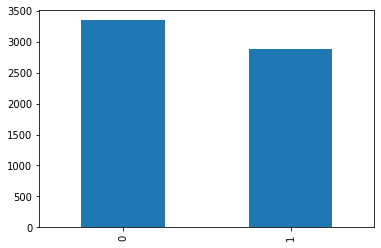

In [76]:
after_2020_03_01_home_shot_rapm_df['shot_made'].value_counts().plot(kind = 'bar')

In [77]:
from sklearn.model_selection import train_test_split


after_2020_03_01_home_shot_rapm_X = after_2020_03_01_home_shot_rapm_df.drop(columns=['event_type_de',
                                                                                     'event_team',
                                                                                     'home_team_abbrev',
                                                                                     'away_team_abbrev',
                                                                                     'seconds_elapsed',
                                                                                     'event_length',
                                                                                     'shot_made'
                                                                                    ])

after_2020_03_01_home_shot_rapm_y = after_2020_03_01_home_shot_rapm_df['shot_made']

after_2020_03_01_home_shot_rapm_X_train, \
after_2020_03_01_home_shot_rapm_X_test, \
after_2020_03_01_home_shot_rapm_y_train, \
after_2020_03_01_home_shot_rapm_y_test = train_test_split(
    after_2020_03_01_home_shot_rapm_X, after_2020_03_01_home_shot_rapm_y, test_size=0.20, random_state=1)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

after_2020_03_01_home_shot_rapm_random_forest_clf = RandomForestClassifier(random_state=0, 
                                                                           n_estimators=100, 
                                                                           oob_score=True,
                                                                           n_jobs=-1)
after_2020_03_01_home_shot_rapm_random_forest_clf.fit(after_2020_03_01_home_shot_rapm_X_train, 
                                                      after_2020_03_01_home_shot_rapm_y_train)

after_2020_03_01_home_shot_rapm_random_forest_clf.predict(after_2020_03_01_home_shot_rapm_X_train)

print("Random Forest Train R2 score: ", r2_score(after_2020_03_01_home_shot_rapm_y_train, 
                                                 after_2020_03_01_home_shot_rapm_random_forest_clf.predict(
                                                     after_2020_03_01_home_shot_rapm_X_train)
                                                ))
print("Random Forest Test R2 score: ", r2_score(after_2020_03_01_home_shot_rapm_y_test, 
                                                after_2020_03_01_home_shot_rapm_random_forest_clf.predict(
                                                    after_2020_03_01_home_shot_rapm_X_test)
                                               ))
print("Random Forest Train Accuracy: ", accuracy_score(after_2020_03_01_home_shot_rapm_y_train, 
                                                       after_2020_03_01_home_shot_rapm_random_forest_clf.predict(
                                                           after_2020_03_01_home_shot_rapm_X_train)
                                                      ))
print("Random Forest Test Accuracy: ", accuracy_score(after_2020_03_01_home_shot_rapm_y_test, 
                                                       after_2020_03_01_home_shot_rapm_random_forest_clf.predict(
                                                           after_2020_03_01_home_shot_rapm_X_test)
                                                     ))
print("Random Forest ROC AUC Score: ", roc_auc_score(after_2020_03_01_home_shot_rapm_y_train, 
                                                     after_2020_03_01_home_shot_rapm_random_forest_clf.predict(
                                                         after_2020_03_01_home_shot_rapm_X_train)
                                                    ))
print("Random Forest ROC AUC Score: ", roc_auc_score(after_2020_03_01_home_shot_rapm_y_test, 
                                                     after_2020_03_01_home_shot_rapm_random_forest_clf.predict(
                                                         after_2020_03_01_home_shot_rapm_X_test)
                                                    ))

Random Forest Train R2 score:  -0.10207325724911143
Random Forest Test R2 score:  -0.9837048136355122
Random Forest Train Accuracy:  0.7257578799437864
Random Forest Test Accuracy:  0.5088282504012841
Random Forest ROC AUC Score:  0.7220107841771599
Random Forest ROC AUC Score:  0.5020108842687977


In [79]:
after_2020_03_01_home_shot_rapm_feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(after_2020_03_01_home_shot_rapm_X.columns, 
                               after_2020_03_01_home_shot_rapm_random_forest_clf.feature_importances_):
    after_2020_03_01_home_shot_rapm_feats[feature] = importance
    
{k: v for k, v in sorted(after_2020_03_01_home_shot_rapm_feats.items(), 
                         key=lambda item: item[1], 
                         reverse=True)}

{'away_player_5_rapm': 0.04345674903940811,
 'away_player_5_orapm': 0.04164047460884132,
 'away_player_5_drapm': 0.03942723058882248,
 'home_player_5_rapm': 0.038436618486562796,
 'home_player_5_orapm': 0.036252886018587595,
 'home_player_5_drapm': 0.03592539141762142,
 'away_player_4_rapm': 0.035498536226536245,
 'home_player_4_drapm': 0.0354098566795788,
 'away_player_3_rapm': 0.03520976605288467,
 'home_player_3_rapm': 0.035100647664139915,
 'home_player_4_orapm': 0.03467334696317019,
 'home_player_4_rapm': 0.03461561367319429,
 'away_player_4_drapm': 0.033942050147573954,
 'away_player_4_orapm': 0.03375949833354029,
 'home_player_3_orapm': 0.033322413598288095,
 'away_player_3_drapm': 0.03323968972470698,
 'away_player_2_rapm': 0.03248158518591864,
 'away_player_3_orapm': 0.031984136244966786,
 'home_player_2_rapm': 0.03181712925586227,
 'away_player_2_orapm': 0.031293162055527575,
 'home_player_1_rapm': 0.030793401364196376,
 'away_player_2_drapm': 0.03055390389724292,
 'away_play

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

after_2020_03_01_home_shot_rapm_log_clf = make_pipeline(StandardScaler(), LogisticRegression())

after_2020_03_01_home_shot_rapm_log_clf.fit(after_2020_03_01_home_shot_rapm_X_train, 
                                                      after_2020_03_01_home_shot_rapm_y_train)

print("Logistic Regression Train R2 score: ", r2_score(after_2020_03_01_home_shot_rapm_y_train, 
                                                       after_2020_03_01_home_shot_rapm_log_clf.predict(
                                                           after_2020_03_01_home_shot_rapm_X_train)
                                                      ))
print("Logistic Regression Test R2 score: ", r2_score(after_2020_03_01_home_shot_rapm_y_test, 
                                                      after_2020_03_01_home_shot_rapm_log_clf.predict(
                                                          after_2020_03_01_home_shot_rapm_X_test)
                                                     ))
print("Logistic Regression Train Accuracy: ", accuracy_score(after_2020_03_01_home_shot_rapm_y_train, 
                                                             after_2020_03_01_home_shot_rapm_log_clf.predict(
                                                                 after_2020_03_01_home_shot_rapm_X_train)
                                                            ))
print("Logistic Regression Test Accuracy: ", accuracy_score(after_2020_03_01_home_shot_rapm_y_test, 
                                                            after_2020_03_01_home_shot_rapm_log_clf.predict(
                                                                after_2020_03_01_home_shot_rapm_X_test)
                                                           ))
print("Logistic Regression ROC AUC Score: ", roc_auc_score(after_2020_03_01_home_shot_rapm_y_train, 
                                                           after_2020_03_01_home_shot_rapm_log_clf.predict(
                                                               after_2020_03_01_home_shot_rapm_X_train)
                                                          ))
print("Logistic Regression ROC AUC Score: ", roc_auc_score(after_2020_03_01_home_shot_rapm_y_test, 
                                                           after_2020_03_01_home_shot_rapm_log_clf.predict(
                                                               after_2020_03_01_home_shot_rapm_X_test)
                                                          ))

Logistic Regression Train R2 score:  -0.8418984233526512
Logistic Regression Test R2 score:  -0.8961884247986514
Logistic Regression Train Accuracy:  0.5416583015458744
Logistic Regression Test Accuracy:  0.5304975922953451
Logistic Regression ROC AUC Score:  0.5186188219363576
Logistic Regression ROC AUC Score:  0.4990556908284947


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [81]:
after_2020_03_01_home_shot_rapm_log_clf_coefs = abs(after_2020_03_01_home_shot_rapm_log_clf.named_steps['logisticregression'].coef_[0])
after_2020_03_01_home_shot_rapm_features = after_2020_03_01_home_shot_rapm_X.columns
for i in np.argsort(after_2020_03_01_home_shot_rapm_log_clf_coefs, )[::-1]\
    [:len(after_2020_03_01_home_shot_rapm_features)]:
    print(str(after_2020_03_01_home_shot_rapm_features[i]) + ": " + str(after_2020_03_01_home_shot_rapm_log_clf_coefs[i]))

home_player_2_rapm: 0.08305802598061894
home_player_4_rapm: 0.06127690096118077
home_player_3_rapm: 0.05073058708087402
home_player_3_drapm: 0.04867526287633216
away_player_5_drapm: 0.04189110986211325
home_player_3_orapm: 0.04024166243428697
away_player_3_rapm: 0.03660619466662728
away_player_5_orapm: 0.03651701115778352
home_player_1_rapm: 0.034977742068021574
home_player_2_drapm: 0.027377884134044597
away_player_3_drapm: 0.02583007384338181
home_player_1_drapm: 0.025386271724252625
away_player_4_rapm: 0.0248275850621136
away_player_4_drapm: 0.02241360821148198
away_player_5_rapm: 0.021576055740892795
away_player_3_orapm: 0.02036422953222464
home_player_1_orapm: 0.020103751661444548
away_player_4_orapm: 0.018541189015288416
away_player_2_drapm: 0.018109730842812293
home_player_2_orapm: 0.016839186949784514
home_player_4_orapm: 0.01679287531170054
away_player_2_orapm: 0.015540582223409212
away_player_1_rapm: 0.014987406895638596
home_player_4_drapm: 0.011007256011668489
away_player_2_

In [275]:
len(RAPM_dict)

10

In [277]:
RAPM_dict.keys()

dict_keys([Timestamp('2020-03-02 00:00:00'), Timestamp('2020-03-03 00:00:00'), Timestamp('2020-03-04 00:00:00'), Timestamp('2020-03-05 00:00:00'), Timestamp('2020-03-06 00:00:00'), Timestamp('2020-03-07 00:00:00'), Timestamp('2020-03-08 00:00:00'), Timestamp('2020-03-09 00:00:00'), Timestamp('2020-03-10 00:00:00'), Timestamp('2020-03-11 00:00:00')])

In [280]:
list(RAPM_dict.values())[0]

,Player,PlayerId,ORAPM,DRAPM,RAPM
0,Stephen Curry,201939,6.453747,-4.293604,2.160142
2,Kevin Durant,201142,5.887571,-4.169485,1.718086
1,Damian Lillard,203081,5.924389,-4.270430,1.653960
3,Chris Paul,101108,5.598411,-3.988450,1.609961
5,Karl-Anthony Towns,1626157,4.831718,-3.562862,1.268856
...,...,...,...,...,...
507,Monte Morris,1628420,-0.490403,0.324780,-0.165623
504,Scott Machado,203159,-0.477222,0.308017,-0.169204
506,Erik McCree,1628571,-0.484099,0.313854,-0.170245
505,Jeremy Evans,202379,-0.482424,0.308789,-0.173635


In [281]:
list(RAPM_dict.values())[1]

,Player,PlayerId,ORAPM,DRAPM,RAPM
0,Stephen Curry,201939,6.403877,-4.276321,2.127556
1,Damian Lillard,203081,5.928294,-4.182997,1.745297
2,Kevin Durant,201142,5.768899,-4.157440,1.611459
3,Chris Paul,101108,5.476353,-3.989473,1.486880
4,James Harden,201935,5.046056,-3.931956,1.114100
...,...,...,...,...,...
496,Nick Young,201156,-0.417641,0.283701,-0.133940
494,Rawle Alkins,1628959,-0.415984,0.279425,-0.136560
495,Marquis Teague,203104,-0.417477,0.279753,-0.137724
505,Jalen Brunson,1628973,-0.472899,0.334276,-0.138624


In [282]:
list(RAPM_dict.values())[2]

,Player,PlayerId,ORAPM,DRAPM,RAPM
0,Stephen Curry,201939,6.409687,-4.325082,2.084605
1,Damian Lillard,203081,5.963459,-4.215376,1.748083
2,Kevin Durant,201142,5.775324,-4.168305,1.607019
3,Chris Paul,101108,5.467034,-4.047258,1.419776
4,James Harden,201935,5.048564,-3.886206,1.162359
...,...,...,...,...,...
310,Joe Johnson,2207,0.110287,-0.246687,-0.136400
309,Norvel Pelle,203658,0.112462,-0.249382,-0.136920
312,Marcus Morris Sr.,202694,0.096368,-0.234527,-0.138159
308,Rayjon Tucker,1629730,0.112478,-0.251063,-0.138585


In [283]:
list(RAPM_dict.values())[3]

,Player,PlayerId,ORAPM,DRAPM,RAPM
0,Stephen Curry,201939,6.391081,-4.355437,2.035643
1,Damian Lillard,203081,5.954331,-4.227667,1.726664
2,Kevin Durant,201142,5.786198,-4.167853,1.618345
3,Chris Paul,101108,5.513944,-4.018592,1.495352
7,LeBron James,2544,4.445915,-3.361069,1.084847
...,...,...,...,...,...
208,Coby White,1629632,0.513251,-0.659382,-0.146131
216,Aaron Harrison,1626151,0.477412,-0.624339,-0.146927
217,Amile Jefferson,1628518,0.475509,-0.623477,-0.147968
205,Jae Crowder,203109,0.523372,-0.671699,-0.148326


In [284]:
list(RAPM_dict.values())[4]

,Player,PlayerId,ORAPM,DRAPM,RAPM
0,Stephen Curry,201939,6.438268,-4.364506,2.073762
2,Kevin Durant,201142,5.786024,-4.113289,1.672735
1,Damian Lillard,203081,5.874734,-4.317675,1.557059
3,Chris Paul,101108,5.407303,-3.891168,1.516134
5,Kemba Walker,202689,4.685864,-3.647171,1.038693
...,...,...,...,...,...
219,Edmond Sumner,1628410,0.476658,-0.628453,-0.151795
220,Isaiah Canaan,203477,0.472081,-0.625408,-0.153326
221,Willy Hernangomez,1626195,0.469619,-0.624627,-0.155008
224,Shelvin Mack,202714,0.447044,-0.606541,-0.159497


In [286]:
list(RAPM_dict.values())[5]

,Player,PlayerId,ORAPM,DRAPM,RAPM
0,Stephen Curry,201939,6.497420,-4.377404,2.120016
2,Damian Lillard,203081,5.679638,-4.115617,1.564021
3,Chris Paul,101108,5.431552,-3.927843,1.503708
1,Kevin Durant,201142,5.733179,-4.352427,1.380752
4,James Harden,201935,4.867379,-3.872419,0.994959
...,...,...,...,...,...
481,Naz Mitrou-Long,1628513,-0.364160,0.223245,-0.140915
473,Isaiah Hicks,1628439,-0.344401,0.201068,-0.143333
475,Joel Bolomboy,1627762,-0.350268,0.206623,-0.143645
474,Robert Williams III,1629057,-0.349961,0.201886,-0.148075


# Get and Process Play By Play Data for 2017

In [123]:
import nba_scraper.nba_scraper as ns

In [124]:
after_2018_02_26_game_ids = game_df[game_df['game_date'] > datetime(2018, 2, 26)]['game_id'].to_list()

In [125]:
after_2018_02_26_pbp_df = ns.scrape_game([str(game_id) for game_id in after_2018_02_26_game_ids])

Scraping game id: 0021700907
Scraping game id: 0021700908
Scraping game id: 0021700909
Scraping game id: 0021700910
Scraping game id: 0021700911
Scraping game id: 0021700912
Scraping game id: 0021700913
Scraping game id: 0021700914
Scraping game id: 0021700915
Scraping game id: 0021700916
Scraping game id: 0021700917
Scraping game id: 0021700918
Scraping game id: 0021700919
Scraping game id: 0021700920
Scraping game id: 0021700921
Scraping game id: 0021700922
Scraping game id: 0021700923
Scraping game id: 0021700924
Scraping game id: 0021700925
Scraping game id: 0021700926
Scraping game id: 0021700927
Scraping game id: 0021700928
Scraping game id: 0021700929
Scraping game id: 0021700930
Scraping game id: 0021700931
Scraping game id: 0021700932
Scraping game id: 0021700933
Scraping game id: 0021700934
Scraping game id: 0021700935
Scraping game id: 0021700936
Scraping game id: 0021700937
Scraping game id: 0021700938
Scraping game id: 0021700939
Scraping game id: 0021700940
Scraping game 

Scraping game id: 0021701189
Scraping game id: 0021701190
Scraping game id: 0021701191
Scraping game id: 0021701192
Scraping game id: 0021701193
Scraping game id: 0021701194
Scraping game id: 0021701195
Scraping game id: 0021701196
Scraping game id: 0021701197
Scraping game id: 0021701198
Scraping game id: 0021701199
Scraping game id: 0021701200
Scraping game id: 0021701201
Scraping game id: 0021701202
Scraping game id: 0021701203
Scraping game id: 0021701204
Scraping game id: 0021701205
Scraping game id: 0021701206
Scraping game id: 0021701207
Scraping game id: 0021701208
Scraping game id: 0021701209
Scraping game id: 0021701210
Scraping game id: 0021701211
Scraping game id: 0021701212
Scraping game id: 0021701213
Scraping game id: 0021701214
Scraping game id: 0021701215
Scraping game id: 0021701216
Scraping game id: 0021701217
Scraping game id: 0021701218
Scraping game id: 0021701219
Scraping game id: 0021701220
Scraping game id: 0021701221
Scraping game id: 0021701222
Scraping game 

In [126]:
after_2018_02_26_pbp_df

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id
0,0021700907,2,12,0,1,7:11 PM,12:00,None,None,None,None,None,0.0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHI,period-start,,NaN,0,NaN,0,NaN,0,0,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
1,0021700907,4,10,0,1,7:11 PM,12:00,Jump Ball Howard vs. Felicio: Tip to Walker,None,None,None,None,4.0,2730,Dwight Howard,1.610613e+09,Charlotte,Hornets,CHA,5,1626245,Cristiano Felicio,1.610613e+09,Chicago,Bulls,CHI,4,202689,Kemba Walker,1.610613e+09,Charlotte,Hornets,CHA,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHA,jump-ball,,NaN,0,NaN,0,0.0,0,0,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
2,0021700907,7,5,40,1,7:11 PM,11:46,Walker Out of Bounds Lost Ball Turnover (P1.T1),None,None,None,None,4.0,202689,Kemba Walker,1.610613e+09,Charlotte,Hornets,CHA,0,0,None,NaN,None,None,None,1,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHA,turnover,,NaN,0,NaN,14,14.0,0,0,0,0,1,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
3,0021700907,8,1,1,1,7:12 PM,11:23,None,None,Felicio 16' Jump Shot (2 PTS) (LaVine 1 AST),2 - 0,-2,5.0,1626245,Cristiano Felicio,1.610613e+09,Chicago,Bulls,CHI,5,203897,Zach LaVine,1.610613e+09,Chicago,Bulls,CHI,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHI,shot,,1.0,0,Jump Shot,37,23.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
4,0021700907,10,1,52,1,7:12 PM,11:07,Howard 1' Alley Oop Dunk (2 PTS) (Batum 1 AST),None,None,2 - 2,TIE,4.0,2730,Dwight Howard,1.610613e+09,Charlotte,Hornets,CHA,4,201587,Nicolas Batum,1.610613e+09,Charlotte,Hornets,CHA,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHA,shot,,1.0,0,Alley Oop Dunk Shot,53,16.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [129]:
after_2018_02_26_shot_df = after_2018_02_26_pbp_df[(after_2018_02_26_pbp_df['event_type_de'] == 'shot') | 
                                                   (after_2018_02_26_pbp_df['event_type_de'] == 'missed_shot')]

In [130]:
after_2018_02_26_shot_df.reset_index(inplace = True, drop=True)
after_2018_02_26_shot_df

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id
0,0021700907,8,1,1,1,7:12 PM,11:23,None,None,Felicio 16' Jump Shot (2 PTS) (LaVine 1 AST),2 - 0,-2,5.0,1626245,Cristiano Felicio,1.610613e+09,Chicago,Bulls,CHI,5,203897,Zach LaVine,1.610613e+09,Chicago,Bulls,CHI,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHI,shot,,1.0,0,Jump Shot,37,23.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
1,0021700907,10,1,52,1,7:12 PM,11:07,Howard 1' Alley Oop Dunk (2 PTS) (Batum 1 AST),None,None,2 - 2,TIE,4.0,2730,Dwight Howard,1.610613e+09,Charlotte,Hornets,CHA,4,201587,Nicolas Batum,1.610613e+09,Charlotte,Hornets,CHA,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHA,shot,,1.0,0,Alley Oop Dunk Shot,53,16.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
2,0021700907,12,1,1,1,7:12 PM,10:45,None,None,Felicio 18' Jump Shot (4 PTS) (Dunn 1 AST),4 - 2,-2,5.0,1626245,Cristiano Felicio,1.610613e+09,Chicago,Bulls,CHI,5,1627739,Kris Dunn,1.610613e+09,Chicago,Bulls,CHI,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHI,shot,,1.0,0,Jump Shot,75,22.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
3,0021700907,23,2,5,1,7:13 PM,10:29,MISS Walker 4' Layup,None,Dunn BLOCK (1 BLK),None,None,4.0,202689,Kemba Walker,1.610613e+09,Charlotte,Hornets,CHA,0,0,None,NaN,None,None,None,5,1627739,Kris Dunn,1.610613e+09,Chicago,Bulls,CHI,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHA,missed_shot,,0.0,1,Layup Shot,91,16.0,0,0,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
4,0021700907,14,1,7,1,7:13 PM,10:22,Howard 1' Dunk (4 PTS),None,None,4 - 4,TIE,4.0,2730,Dwight Howard,1.610613e+09,Charlotte,Hornets,CHA,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHA,shot,,1.0,0,Dunk Shot,98,4.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [207]:
RAPM_dict = {}

def lookup_RAPM(game_id, player_id):
    if game_df is None:
        print("global object game_df is required to look up games")
        return
    
    if matchup_df is None:
        print("global object matchup_df is required to look up games")
        return
    
    game_id = int(game_id)
    player_id = int(player_id)
    
#     print(game_df[game_df['game_id'] == game_id].to_dict('records'))
    game_date = game_df[game_df['game_id'] == game_id].to_dict('records')[0]['game_date']
    
    if game_date not in RAPM_dict:
        RAPM_dict[game_date] = calculate_RAPM(matchup_df, n_games=901, until_date=game_date)
    
    RAPM = RAPM_dict[game_date]
    return RAPM[RAPM['PlayerId'] == player_id].to_dict('records')[0]

In [206]:
lookup_RAPM("0021900908", "1627763")

IndexError: list index out of range

In [133]:
after_2018_02_26_shot_df.iloc[14610,:]

game_id                0021700992
eventnum                        7
eventmsgtype                    2
eventmsgactiontype              3
period                          1
                          ...    
away_player_4_drapm           NaN
away_player_4_rapm            NaN
away_player_5_orapm           NaN
away_player_5_drapm           NaN
away_player_5_rapm            NaN
Name: 14610, Length: 106, dtype: object

In [208]:
for index, row in after_2018_02_26_shot_df.iterrows():
    print("working on row " + str(index))
    home_player_1_rapms = lookup_RAPM(row['game_id'], row['home_player_1_id'])
    after_2018_02_26_shot_df.loc[index, 'home_player_1_orapm'] = home_player_1_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_1_drapm'] = home_player_1_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_1_rapm'] = home_player_1_rapms['RAPM']
    
    home_player_2_rapms = lookup_RAPM(row['game_id'], row['home_player_2_id'])
    after_2018_02_26_shot_df.loc[index, 'home_player_2_orapm'] = home_player_2_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_2_drapm'] = home_player_2_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_2_rapm'] = home_player_2_rapms['RAPM']
    
    home_player_3_rapms = lookup_RAPM(row['game_id'], row['home_player_3_id'])
    after_2018_02_26_shot_df.loc[index, 'home_player_3_orapm'] = home_player_3_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_3_drapm'] = home_player_3_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_3_rapm'] = home_player_3_rapms['RAPM']
    
    home_player_4_rapms = lookup_RAPM(row['game_id'], row['home_player_4_id'])
    after_2018_02_26_shot_df.loc[index, 'home_player_4_orapm'] = home_player_4_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_4_drapm'] = home_player_4_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_4_rapm'] = home_player_4_rapms['RAPM']
    
    home_player_5_rapms = lookup_RAPM(row['game_id'], row['home_player_5_id'])
    after_2018_02_26_shot_df.loc[index, 'home_player_5_orapm'] = home_player_5_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_5_drapm'] = home_player_5_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'home_player_5_rapm'] = home_player_5_rapms['RAPM']
    
    away_player_1_rapms = lookup_RAPM(row['game_id'], row['away_player_1_id'])
    after_2018_02_26_shot_df.loc[index, 'away_player_1_orapm'] = away_player_1_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_1_drapm'] = away_player_1_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_1_rapm'] = away_player_1_rapms['RAPM']
    
    away_player_2_rapms = lookup_RAPM(row['game_id'], row['away_player_2_id'])
    after_2018_02_26_shot_df.loc[index, 'away_player_2_orapm'] = away_player_2_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_2_drapm'] = away_player_2_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_2_rapm'] = away_player_2_rapms['RAPM']
    
    away_player_3_rapms = lookup_RAPM(row['game_id'], row['away_player_3_id'])
    after_2018_02_26_shot_df.loc[index, 'away_player_3_orapm'] = away_player_3_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_3_drapm'] = away_player_3_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_3_rapm'] = away_player_3_rapms['RAPM']
    
    away_player_4_rapms = lookup_RAPM(row['game_id'], row['away_player_4_id'])
    after_2018_02_26_shot_df.loc[index, 'away_player_4_orapm'] = away_player_4_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_4_drapm'] = away_player_4_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_4_rapm'] = away_player_4_rapms['RAPM']
    
    away_player_5_rapms = lookup_RAPM(row['game_id'], row['away_player_5_id'])
    after_2018_02_26_shot_df.loc[index, 'away_player_5_orapm'] = away_player_5_rapms['ORAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_5_drapm'] = away_player_5_rapms['DRAPM']
    after_2018_02_26_shot_df.loc[index, 'away_player_5_rapm'] = away_player_5_rapms['RAPM']

working on row 0
clf.alpha_:  1.0
working on row 1
working on row 2


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 3
working on row 4
working on row 5
working on row 6
working on row 7
working on row 8
working on row 9
working on row 10
working on row 11
working on row 12
working on row 13
working on row 14
working on row 15
working on row 16
working on row 17
working on row 18
working on row 19
working on row 20
working on row 21
working on row 22
working on row 23
working on row 24
working on row 25
working on row 26
working on row 27
working on row 28
working on row 29
working on row 30
working on row 31
working on row 32
working on row 33
working on row 34
working on row 35
working on row 36
working on row 37
working on row 38
working on row 39
working on row 40
working on row 41
working on row 42
working on row 43
working on row 44
working on row 45
working on row 46
working on row 47
working on row 48
working on row 49
working on row 50
working on row 51
working on row 52
working on row 53
working on row 54
working on row 55
working on row 56
working on row 57
working on row 58

working on row 446
working on row 447
working on row 448
working on row 449
working on row 450
working on row 451
working on row 452
working on row 453
working on row 454
working on row 455
working on row 456
working on row 457
working on row 458
working on row 459
working on row 460
working on row 461
working on row 462
working on row 463
working on row 464
working on row 465
working on row 466
working on row 467
working on row 468
working on row 469
working on row 470
working on row 471
working on row 472
working on row 473
working on row 474
working on row 475
working on row 476
working on row 477
working on row 478
working on row 479
working on row 480
working on row 481
working on row 482
working on row 483
working on row 484
working on row 485
working on row 486
working on row 487
working on row 488
working on row 489
working on row 490
working on row 491
working on row 492
working on row 493
working on row 494
working on row 495
working on row 496
working on row 497
working on r

working on row 878
working on row 879
working on row 880
working on row 881
working on row 882
working on row 883
working on row 884
working on row 885
working on row 886
working on row 887
working on row 888
working on row 889
working on row 890
working on row 891
working on row 892
working on row 893
working on row 894
working on row 895
working on row 896
working on row 897
working on row 898
working on row 899
working on row 900
working on row 901
working on row 902
working on row 903
working on row 904
working on row 905
working on row 906
working on row 907
working on row 908
working on row 909
working on row 910
working on row 911
working on row 912
working on row 913
working on row 914
working on row 915
working on row 916
working on row 917
working on row 918
working on row 919
working on row 920
working on row 921
working on row 922
working on row 923
working on row 924
working on row 925
working on row 926
working on row 927
working on row 928
working on row 929
working on r

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 1026
working on row 1027
working on row 1028
working on row 1029
working on row 1030
working on row 1031
working on row 1032
working on row 1033
working on row 1034
working on row 1035
working on row 1036
working on row 1037
working on row 1038
working on row 1039
working on row 1040
working on row 1041
working on row 1042
working on row 1043
working on row 1044
working on row 1045
working on row 1046
working on row 1047
working on row 1048
working on row 1049
working on row 1050
working on row 1051
working on row 1052
working on row 1053
working on row 1054
working on row 1055
working on row 1056
working on row 1057
working on row 1058
working on row 1059
working on row 1060
working on row 1061
working on row 1062
working on row 1063
working on row 1064
working on row 1065
working on row 1066
working on row 1067
working on row 1068
working on row 1069
working on row 1070
working on row 1071
working on row 1072
working on row 1073
working on row 1074
working on row 1075


working on row 1439
working on row 1440
working on row 1441
working on row 1442
working on row 1443
working on row 1444
working on row 1445
working on row 1446
working on row 1447
working on row 1448
working on row 1449
working on row 1450
working on row 1451
working on row 1452
working on row 1453
working on row 1454
working on row 1455
working on row 1456
working on row 1457
working on row 1458
working on row 1459
working on row 1460
working on row 1461
working on row 1462
working on row 1463
working on row 1464
working on row 1465
working on row 1466
working on row 1467
working on row 1468
working on row 1469
working on row 1470
working on row 1471
working on row 1472
working on row 1473
working on row 1474
working on row 1475
working on row 1476
working on row 1477
working on row 1478
working on row 1479
working on row 1480
working on row 1481
working on row 1482
working on row 1483
working on row 1484
working on row 1485
working on row 1486
working on row 1487
working on row 1488


working on row 1854
working on row 1855
working on row 1856
working on row 1857
working on row 1858
working on row 1859
working on row 1860
working on row 1861
working on row 1862
working on row 1863
working on row 1864
working on row 1865
working on row 1866
working on row 1867
working on row 1868
working on row 1869
working on row 1870
working on row 1871
working on row 1872
working on row 1873
working on row 1874
working on row 1875
working on row 1876
working on row 1877
working on row 1878
working on row 1879
working on row 1880
working on row 1881
working on row 1882
working on row 1883
working on row 1884
working on row 1885
working on row 1886
working on row 1887
working on row 1888
working on row 1889
working on row 1890
working on row 1891
working on row 1892
working on row 1893
working on row 1894
working on row 1895
working on row 1896
working on row 1897
working on row 1898
working on row 1899
working on row 1900
working on row 1901
working on row 1902
working on row 1903


working on row 2270
working on row 2271
working on row 2272
working on row 2273
working on row 2274
working on row 2275
working on row 2276
working on row 2277
working on row 2278
working on row 2279
working on row 2280
working on row 2281
working on row 2282
working on row 2283
working on row 2284
working on row 2285
working on row 2286
working on row 2287
working on row 2288
working on row 2289
working on row 2290
working on row 2291
working on row 2292
working on row 2293
working on row 2294
working on row 2295
working on row 2296
working on row 2297
working on row 2298
working on row 2299
working on row 2300
working on row 2301
working on row 2302
working on row 2303
working on row 2304
working on row 2305
working on row 2306
working on row 2307
working on row 2308
working on row 2309
working on row 2310
working on row 2311
working on row 2312
working on row 2313
working on row 2314
working on row 2315
working on row 2316
working on row 2317
working on row 2318
working on row 2319


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 2592
working on row 2593
working on row 2594
working on row 2595
working on row 2596
working on row 2597
working on row 2598
working on row 2599
working on row 2600
working on row 2601
working on row 2602
working on row 2603
working on row 2604
working on row 2605
working on row 2606
working on row 2607
working on row 2608
working on row 2609
working on row 2610
working on row 2611
working on row 2612
working on row 2613
working on row 2614
working on row 2615
working on row 2616
working on row 2617
working on row 2618
working on row 2619
working on row 2620
working on row 2621
working on row 2622
working on row 2623
working on row 2624
working on row 2625
working on row 2626
working on row 2627
working on row 2628
working on row 2629
working on row 2630
working on row 2631
working on row 2632
working on row 2633
working on row 2634
working on row 2635
working on row 2636
working on row 2637
working on row 2638
working on row 2639
working on row 2640
working on row 2641


working on row 3005
working on row 3006
working on row 3007
working on row 3008
working on row 3009
working on row 3010
working on row 3011
working on row 3012
working on row 3013
working on row 3014
working on row 3015
working on row 3016
working on row 3017
working on row 3018
working on row 3019
working on row 3020
working on row 3021
working on row 3022
working on row 3023
working on row 3024
working on row 3025
working on row 3026
working on row 3027
working on row 3028
working on row 3029
working on row 3030
working on row 3031
working on row 3032
working on row 3033
working on row 3034
working on row 3035
working on row 3036
working on row 3037
working on row 3038
working on row 3039
working on row 3040
working on row 3041
working on row 3042
working on row 3043
working on row 3044
working on row 3045
working on row 3046
working on row 3047
working on row 3048
working on row 3049
working on row 3050
working on row 3051
working on row 3052
working on row 3053
working on row 3054


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 3313
working on row 3314
working on row 3315
working on row 3316
working on row 3317
working on row 3318
working on row 3319
working on row 3320
working on row 3321
working on row 3322
working on row 3323
working on row 3324
working on row 3325
working on row 3326
working on row 3327
working on row 3328
working on row 3329
working on row 3330
working on row 3331
working on row 3332
working on row 3333
working on row 3334
working on row 3335
working on row 3336
working on row 3337
working on row 3338
working on row 3339
working on row 3340
working on row 3341
working on row 3342
working on row 3343
working on row 3344
working on row 3345
working on row 3346
working on row 3347
working on row 3348
working on row 3349
working on row 3350
working on row 3351
working on row 3352
working on row 3353
working on row 3354
working on row 3355
working on row 3356
working on row 3357
working on row 3358
working on row 3359
working on row 3360
working on row 3361
working on row 3362


working on row 3726
working on row 3727
working on row 3728
working on row 3729
working on row 3730
working on row 3731
working on row 3732
working on row 3733
working on row 3734
working on row 3735
working on row 3736
working on row 3737
working on row 3738
working on row 3739
working on row 3740
working on row 3741
working on row 3742
working on row 3743
working on row 3744
working on row 3745
working on row 3746
working on row 3747
working on row 3748
working on row 3749
working on row 3750
working on row 3751
working on row 3752
working on row 3753
working on row 3754
working on row 3755
working on row 3756
working on row 3757
working on row 3758
working on row 3759
working on row 3760
working on row 3761
working on row 3762
working on row 3763
working on row 3764
working on row 3765
working on row 3766
working on row 3767
working on row 3768
working on row 3769
working on row 3770
working on row 3771
working on row 3772
working on row 3773
working on row 3774
working on row 3775


working on row 4140
working on row 4141
working on row 4142
working on row 4143
working on row 4144
working on row 4145
working on row 4146
working on row 4147
working on row 4148
working on row 4149
working on row 4150
working on row 4151
working on row 4152
working on row 4153
working on row 4154
working on row 4155
working on row 4156
working on row 4157
working on row 4158
working on row 4159
working on row 4160
working on row 4161
working on row 4162
working on row 4163
working on row 4164
working on row 4165
working on row 4166
working on row 4167
working on row 4168
working on row 4169
working on row 4170
working on row 4171
working on row 4172
working on row 4173
working on row 4174
working on row 4175
working on row 4176
working on row 4177
working on row 4178
working on row 4179
working on row 4180
working on row 4181
working on row 4182
working on row 4183
working on row 4184
working on row 4185
working on row 4186
working on row 4187
working on row 4188
working on row 4189


working on row 4551
working on row 4552
working on row 4553
working on row 4554
working on row 4555
working on row 4556
working on row 4557
working on row 4558
working on row 4559
working on row 4560
working on row 4561
working on row 4562
working on row 4563
working on row 4564
working on row 4565
working on row 4566
working on row 4567
working on row 4568
working on row 4569
working on row 4570
working on row 4571
working on row 4572
working on row 4573
working on row 4574
working on row 4575
working on row 4576
working on row 4577
working on row 4578
working on row 4579
working on row 4580
working on row 4581
working on row 4582
working on row 4583
working on row 4584
working on row 4585
working on row 4586
working on row 4587
working on row 4588
working on row 4589
working on row 4590
working on row 4591
working on row 4592
working on row 4593
working on row 4594
working on row 4595
working on row 4596
working on row 4597
working on row 4598
working on row 4599
working on row 4600


working on row 4961
working on row 4962
working on row 4963
working on row 4964
working on row 4965
working on row 4966
working on row 4967
working on row 4968
working on row 4969
working on row 4970
working on row 4971
working on row 4972
working on row 4973
working on row 4974
working on row 4975
working on row 4976
working on row 4977
working on row 4978
working on row 4979
working on row 4980
working on row 4981
working on row 4982
working on row 4983
working on row 4984
working on row 4985
working on row 4986
working on row 4987
working on row 4988
working on row 4989
working on row 4990
working on row 4991
working on row 4992
working on row 4993
working on row 4994
working on row 4995
clf.alpha_:  1.0
working on row 4996
working on row 4997
working on row 4998


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 4999
working on row 5000
working on row 5001
working on row 5002
working on row 5003
working on row 5004
working on row 5005
working on row 5006
working on row 5007
working on row 5008
working on row 5009
working on row 5010
working on row 5011
working on row 5012
working on row 5013
working on row 5014
working on row 5015
working on row 5016
working on row 5017
working on row 5018
working on row 5019
working on row 5020
working on row 5021
working on row 5022
working on row 5023
working on row 5024
working on row 5025
working on row 5026
working on row 5027
working on row 5028
working on row 5029
working on row 5030
working on row 5031
working on row 5032
working on row 5033
working on row 5034
working on row 5035
working on row 5036
working on row 5037
working on row 5038
working on row 5039
working on row 5040
working on row 5041
working on row 5042
working on row 5043
working on row 5044
working on row 5045
working on row 5046
working on row 5047
working on row 5048


working on row 5413
working on row 5414
working on row 5415
working on row 5416
working on row 5417
working on row 5418
working on row 5419
working on row 5420
working on row 5421
working on row 5422
working on row 5423
working on row 5424
working on row 5425
working on row 5426
working on row 5427
working on row 5428
working on row 5429
working on row 5430
working on row 5431
working on row 5432
working on row 5433
working on row 5434
working on row 5435
working on row 5436
working on row 5437
working on row 5438
working on row 5439
working on row 5440
working on row 5441
working on row 5442
working on row 5443
working on row 5444
working on row 5445
working on row 5446
working on row 5447
working on row 5448
working on row 5449
working on row 5450
working on row 5451
working on row 5452
working on row 5453
working on row 5454
working on row 5455
working on row 5456
working on row 5457
working on row 5458
working on row 5459
working on row 5460
working on row 5461
working on row 5462


working on row 5828
working on row 5829
working on row 5830
working on row 5831
working on row 5832
working on row 5833
working on row 5834
working on row 5835
working on row 5836
working on row 5837
working on row 5838
working on row 5839
working on row 5840
working on row 5841
working on row 5842
working on row 5843
working on row 5844
working on row 5845
working on row 5846
working on row 5847
working on row 5848
working on row 5849
working on row 5850
working on row 5851
working on row 5852
working on row 5853
working on row 5854
working on row 5855
working on row 5856
working on row 5857
working on row 5858
working on row 5859
working on row 5860
working on row 5861
working on row 5862
working on row 5863
working on row 5864
working on row 5865
working on row 5866
working on row 5867
working on row 5868
working on row 5869
working on row 5870
working on row 5871
working on row 5872
working on row 5873
working on row 5874
working on row 5875
working on row 5876
working on row 5877


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 6227
working on row 6228
working on row 6229
working on row 6230
working on row 6231
working on row 6232
working on row 6233
working on row 6234
working on row 6235
working on row 6236
working on row 6237
working on row 6238
working on row 6239
working on row 6240
working on row 6241
working on row 6242
working on row 6243
working on row 6244
working on row 6245
working on row 6246
working on row 6247
working on row 6248
working on row 6249
working on row 6250
working on row 6251
working on row 6252
working on row 6253
working on row 6254
working on row 6255
working on row 6256
working on row 6257
working on row 6258
working on row 6259
working on row 6260
working on row 6261
working on row 6262
working on row 6263
working on row 6264
working on row 6265
working on row 6266
working on row 6267
working on row 6268
working on row 6269
working on row 6270
working on row 6271
working on row 6272
working on row 6273
working on row 6274
working on row 6275
working on row 6276


working on row 6641
working on row 6642
working on row 6643
working on row 6644
working on row 6645
working on row 6646
working on row 6647
working on row 6648
working on row 6649
working on row 6650
working on row 6651
working on row 6652
working on row 6653
working on row 6654
working on row 6655
working on row 6656
working on row 6657
working on row 6658
working on row 6659
working on row 6660
working on row 6661
working on row 6662
working on row 6663
working on row 6664
working on row 6665
working on row 6666
working on row 6667
working on row 6668
working on row 6669
working on row 6670
working on row 6671
working on row 6672
working on row 6673
working on row 6674
working on row 6675
working on row 6676
working on row 6677
working on row 6678
working on row 6679
working on row 6680
working on row 6681
working on row 6682
working on row 6683
working on row 6684
working on row 6685
working on row 6686
working on row 6687
working on row 6688
working on row 6689
working on row 6690


working on row 7056
working on row 7057
working on row 7058
working on row 7059
working on row 7060
working on row 7061
working on row 7062
working on row 7063
working on row 7064
working on row 7065
working on row 7066
working on row 7067
working on row 7068
working on row 7069
working on row 7070
working on row 7071
working on row 7072
working on row 7073
working on row 7074
working on row 7075
working on row 7076
working on row 7077
working on row 7078
working on row 7079
working on row 7080
working on row 7081
working on row 7082
working on row 7083
working on row 7084
working on row 7085
working on row 7086
working on row 7087
working on row 7088
working on row 7089
working on row 7090
working on row 7091
working on row 7092
working on row 7093
working on row 7094
working on row 7095
working on row 7096
working on row 7097
working on row 7098
working on row 7099
working on row 7100
working on row 7101
working on row 7102
working on row 7103
working on row 7104
working on row 7105


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 7437
working on row 7438
working on row 7439
working on row 7440
working on row 7441
working on row 7442
working on row 7443
working on row 7444
working on row 7445
working on row 7446
working on row 7447
working on row 7448
working on row 7449
working on row 7450
working on row 7451
working on row 7452
working on row 7453
working on row 7454
working on row 7455
working on row 7456
working on row 7457
working on row 7458
working on row 7459
working on row 7460
working on row 7461
working on row 7462
working on row 7463
working on row 7464
working on row 7465
working on row 7466
working on row 7467
working on row 7468
working on row 7469
working on row 7470
working on row 7471
working on row 7472
working on row 7473
working on row 7474
working on row 7475
working on row 7476
working on row 7477
working on row 7478
working on row 7479
working on row 7480
working on row 7481
working on row 7482
working on row 7483
working on row 7484
working on row 7485
working on row 7486


working on row 7852
working on row 7853
working on row 7854
working on row 7855
working on row 7856
working on row 7857
working on row 7858
working on row 7859
working on row 7860
working on row 7861
working on row 7862
working on row 7863
working on row 7864
working on row 7865
working on row 7866
working on row 7867
working on row 7868
working on row 7869
working on row 7870
working on row 7871
working on row 7872
working on row 7873
working on row 7874
working on row 7875
working on row 7876
working on row 7877
working on row 7878
working on row 7879
working on row 7880
working on row 7881
working on row 7882
working on row 7883
working on row 7884
working on row 7885
working on row 7886
working on row 7887
working on row 7888
working on row 7889
working on row 7890
working on row 7891
working on row 7892
working on row 7893
working on row 7894
working on row 7895
working on row 7896
working on row 7897
working on row 7898
working on row 7899
working on row 7900
working on row 7901


working on row 8262
working on row 8263
working on row 8264
working on row 8265
working on row 8266
working on row 8267
working on row 8268
working on row 8269
working on row 8270
working on row 8271
working on row 8272
working on row 8273
working on row 8274
working on row 8275
working on row 8276
working on row 8277
working on row 8278
working on row 8279
working on row 8280
working on row 8281
working on row 8282
working on row 8283
working on row 8284
working on row 8285
working on row 8286
working on row 8287
working on row 8288
working on row 8289
working on row 8290
working on row 8291
working on row 8292
working on row 8293
working on row 8294
working on row 8295
working on row 8296
working on row 8297
working on row 8298
working on row 8299
working on row 8300
working on row 8301
working on row 8302
working on row 8303
working on row 8304
working on row 8305
working on row 8306
working on row 8307
working on row 8308
working on row 8309
working on row 8310
working on row 8311


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 8592
working on row 8593
working on row 8594
working on row 8595
working on row 8596
working on row 8597
working on row 8598
working on row 8599
working on row 8600
working on row 8601
working on row 8602
working on row 8603
working on row 8604
working on row 8605
working on row 8606
working on row 8607
working on row 8608
working on row 8609
working on row 8610
working on row 8611
working on row 8612
working on row 8613
working on row 8614
working on row 8615
working on row 8616
working on row 8617
working on row 8618
working on row 8619
working on row 8620
working on row 8621
working on row 8622
working on row 8623
working on row 8624
working on row 8625
working on row 8626
working on row 8627
working on row 8628
working on row 8629
working on row 8630
working on row 8631
working on row 8632
working on row 8633
working on row 8634
working on row 8635
working on row 8636
working on row 8637
working on row 8638
working on row 8639
working on row 8640
working on row 8641


working on row 9007
working on row 9008
working on row 9009
working on row 9010
working on row 9011
working on row 9012
working on row 9013
working on row 9014
working on row 9015
working on row 9016
working on row 9017
working on row 9018
working on row 9019
working on row 9020
working on row 9021
working on row 9022
working on row 9023
working on row 9024
working on row 9025
working on row 9026
working on row 9027
working on row 9028
working on row 9029
working on row 9030
working on row 9031
working on row 9032
working on row 9033
working on row 9034
working on row 9035
working on row 9036
working on row 9037
working on row 9038
working on row 9039
working on row 9040
working on row 9041
working on row 9042
working on row 9043
working on row 9044
working on row 9045
working on row 9046
working on row 9047
working on row 9048
working on row 9049
working on row 9050
working on row 9051
working on row 9052
working on row 9053
working on row 9054
working on row 9055
working on row 9056


working on row 9424
working on row 9425
working on row 9426
working on row 9427
working on row 9428
working on row 9429
working on row 9430
working on row 9431
working on row 9432
working on row 9433
working on row 9434
working on row 9435
working on row 9436
working on row 9437
working on row 9438
working on row 9439
working on row 9440
working on row 9441
working on row 9442
working on row 9443
working on row 9444
working on row 9445
working on row 9446
working on row 9447
working on row 9448
working on row 9449
working on row 9450
working on row 9451
working on row 9452
working on row 9453
working on row 9454
working on row 9455
working on row 9456
working on row 9457
working on row 9458
working on row 9459
working on row 9460
working on row 9461
working on row 9462
working on row 9463
working on row 9464
working on row 9465
working on row 9466
working on row 9467
working on row 9468
working on row 9469
working on row 9470
working on row 9471
working on row 9472
working on row 9473


working on row 9834
working on row 9835
working on row 9836
working on row 9837
working on row 9838
working on row 9839
working on row 9840
working on row 9841
working on row 9842
working on row 9843
working on row 9844
working on row 9845
working on row 9846
working on row 9847
working on row 9848
working on row 9849
working on row 9850
working on row 9851
working on row 9852
working on row 9853
working on row 9854
working on row 9855
working on row 9856
working on row 9857
working on row 9858
working on row 9859
working on row 9860
working on row 9861
working on row 9862
working on row 9863
working on row 9864
working on row 9865
working on row 9866
working on row 9867
working on row 9868
working on row 9869
working on row 9870
working on row 9871
working on row 9872
working on row 9873
working on row 9874
working on row 9875
working on row 9876
working on row 9877
working on row 9878
working on row 9879
working on row 9880
working on row 9881
working on row 9882
working on row 9883


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 9985
working on row 9986
working on row 9987
working on row 9988
working on row 9989
working on row 9990
working on row 9991
working on row 9992
working on row 9993
working on row 9994
working on row 9995
working on row 9996
working on row 9997
working on row 9998
working on row 9999
working on row 10000
working on row 10001
working on row 10002
working on row 10003
working on row 10004
working on row 10005
working on row 10006
working on row 10007
working on row 10008
working on row 10009
working on row 10010
working on row 10011
working on row 10012
working on row 10013
working on row 10014
working on row 10015
working on row 10016
working on row 10017
working on row 10018
working on row 10019
working on row 10020
working on row 10021
working on row 10022
working on row 10023
working on row 10024
working on row 10025
working on row 10026
working on row 10027
working on row 10028
working on row 10029
working on row 10030
working on row 10031
working on row 10032
working

working on row 10376
working on row 10377
working on row 10378
working on row 10379
working on row 10380
working on row 10381
working on row 10382
working on row 10383
working on row 10384
working on row 10385
working on row 10386
working on row 10387
working on row 10388
working on row 10389
working on row 10390
working on row 10391
working on row 10392
working on row 10393
working on row 10394
working on row 10395
working on row 10396
working on row 10397
working on row 10398
working on row 10399
working on row 10400
working on row 10401
working on row 10402
working on row 10403
working on row 10404
working on row 10405
working on row 10406
working on row 10407
working on row 10408
working on row 10409
working on row 10410
working on row 10411
working on row 10412
working on row 10413
working on row 10414
working on row 10415
working on row 10416
working on row 10417
working on row 10418
working on row 10419
working on row 10420
working on row 10421
working on row 10422
working on ro

working on row 10771
working on row 10772
working on row 10773
working on row 10774
working on row 10775
working on row 10776
working on row 10777
working on row 10778
working on row 10779
working on row 10780
working on row 10781
working on row 10782
working on row 10783
working on row 10784
working on row 10785
working on row 10786
working on row 10787
working on row 10788
working on row 10789
working on row 10790
working on row 10791
working on row 10792
working on row 10793
working on row 10794
working on row 10795
working on row 10796
working on row 10797
working on row 10798
working on row 10799
working on row 10800
working on row 10801
working on row 10802
working on row 10803
working on row 10804
working on row 10805
working on row 10806
working on row 10807
working on row 10808
working on row 10809
working on row 10810
working on row 10811
working on row 10812
working on row 10813
working on row 10814
working on row 10815
working on row 10816
working on row 10817
working on ro

working on row 11162
working on row 11163
working on row 11164
working on row 11165
working on row 11166
working on row 11167
working on row 11168
working on row 11169
working on row 11170
working on row 11171
working on row 11172
working on row 11173
working on row 11174
working on row 11175
working on row 11176
working on row 11177
working on row 11178
working on row 11179
working on row 11180
working on row 11181
working on row 11182
working on row 11183
working on row 11184
working on row 11185
working on row 11186
working on row 11187
clf.alpha_:  1.0
working on row 11188
working on row 11189


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 11190
working on row 11191
working on row 11192
working on row 11193
working on row 11194
working on row 11195
working on row 11196
working on row 11197
working on row 11198
working on row 11199
working on row 11200
working on row 11201
working on row 11202
working on row 11203
working on row 11204
working on row 11205
working on row 11206
working on row 11207
working on row 11208
working on row 11209
working on row 11210
working on row 11211
working on row 11212
working on row 11213
working on row 11214
working on row 11215
working on row 11216
working on row 11217
working on row 11218
working on row 11219
working on row 11220
working on row 11221
working on row 11222
working on row 11223
working on row 11224
working on row 11225
working on row 11226
working on row 11227
working on row 11228
working on row 11229
working on row 11230
working on row 11231
working on row 11232
working on row 11233
working on row 11234
working on row 11235
working on row 11236
working on ro

working on row 11581
working on row 11582
working on row 11583
working on row 11584
working on row 11585
working on row 11586
working on row 11587
working on row 11588
working on row 11589
working on row 11590
working on row 11591
working on row 11592
working on row 11593
working on row 11594
working on row 11595
working on row 11596
working on row 11597
working on row 11598
working on row 11599
working on row 11600
working on row 11601
working on row 11602
working on row 11603
working on row 11604
working on row 11605
working on row 11606
working on row 11607
working on row 11608
working on row 11609
working on row 11610
working on row 11611
working on row 11612
working on row 11613
working on row 11614
working on row 11615
working on row 11616
working on row 11617
working on row 11618
working on row 11619
working on row 11620
working on row 11621
working on row 11622
working on row 11623
working on row 11624
working on row 11625
working on row 11626
working on row 11627
working on ro

working on row 11977
working on row 11978
working on row 11979
working on row 11980
working on row 11981
working on row 11982
working on row 11983
working on row 11984
working on row 11985
working on row 11986
working on row 11987
working on row 11988
working on row 11989
working on row 11990
working on row 11991
working on row 11992
working on row 11993
working on row 11994
working on row 11995
working on row 11996
working on row 11997
working on row 11998
working on row 11999
working on row 12000
working on row 12001
working on row 12002
working on row 12003
working on row 12004
working on row 12005
working on row 12006
working on row 12007
working on row 12008
working on row 12009
working on row 12010
working on row 12011
working on row 12012
working on row 12013
working on row 12014
working on row 12015
working on row 12016
working on row 12017
working on row 12018
working on row 12019
working on row 12020
working on row 12021
working on row 12022
working on row 12023
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 12086
working on row 12087
working on row 12088
working on row 12089
working on row 12090
working on row 12091
working on row 12092
working on row 12093
working on row 12094
working on row 12095
working on row 12096
working on row 12097
working on row 12098
working on row 12099
working on row 12100
working on row 12101
working on row 12102
working on row 12103
working on row 12104
working on row 12105
working on row 12106
working on row 12107
working on row 12108
working on row 12109
working on row 12110
working on row 12111
working on row 12112
working on row 12113
working on row 12114
working on row 12115
working on row 12116
working on row 12117
working on row 12118
working on row 12119
working on row 12120
working on row 12121
working on row 12122
working on row 12123
working on row 12124
working on row 12125
working on row 12126
working on row 12127
working on row 12128
working on row 12129
working on row 12130
working on row 12131
working on row 12132
working on ro

working on row 12482
working on row 12483
working on row 12484
working on row 12485
working on row 12486
working on row 12487
working on row 12488
working on row 12489
working on row 12490
working on row 12491
working on row 12492
working on row 12493
working on row 12494
working on row 12495
working on row 12496
working on row 12497
working on row 12498
working on row 12499
working on row 12500
working on row 12501
working on row 12502
working on row 12503
working on row 12504
working on row 12505
working on row 12506
working on row 12507
working on row 12508
working on row 12509
working on row 12510
working on row 12511
working on row 12512
working on row 12513
working on row 12514
working on row 12515
working on row 12516
working on row 12517
working on row 12518
working on row 12519
working on row 12520
working on row 12521
working on row 12522
working on row 12523
working on row 12524
working on row 12525
working on row 12526
working on row 12527
working on row 12528
working on ro

working on row 12876
working on row 12877
working on row 12878
working on row 12879
working on row 12880
working on row 12881
working on row 12882
working on row 12883
working on row 12884
working on row 12885
working on row 12886
working on row 12887
working on row 12888
working on row 12889
working on row 12890
working on row 12891
working on row 12892
working on row 12893
working on row 12894
working on row 12895
working on row 12896
working on row 12897
working on row 12898
working on row 12899
working on row 12900
working on row 12901
working on row 12902
working on row 12903
working on row 12904
working on row 12905
working on row 12906
working on row 12907
working on row 12908
working on row 12909
working on row 12910
working on row 12911
working on row 12912
working on row 12913
working on row 12914
working on row 12915
working on row 12916
working on row 12917
working on row 12918
working on row 12919
working on row 12920
working on row 12921
working on row 12922
working on ro

working on row 13274
working on row 13275
working on row 13276
working on row 13277
working on row 13278
working on row 13279
working on row 13280
working on row 13281
working on row 13282
working on row 13283
working on row 13284
working on row 13285
working on row 13286
working on row 13287
working on row 13288
working on row 13289
working on row 13290
working on row 13291
working on row 13292
working on row 13293
working on row 13294
working on row 13295
working on row 13296
working on row 13297
working on row 13298
working on row 13299
working on row 13300
working on row 13301
working on row 13302
working on row 13303
working on row 13304
working on row 13305
working on row 13306
working on row 13307
working on row 13308
working on row 13309
working on row 13310
working on row 13311
working on row 13312
working on row 13313
working on row 13314
working on row 13315
working on row 13316
working on row 13317
working on row 13318
working on row 13319
working on row 13320
working on ro

working on row 13672
working on row 13673
working on row 13674
working on row 13675
working on row 13676
working on row 13677
working on row 13678
working on row 13679
working on row 13680
working on row 13681
working on row 13682
working on row 13683
working on row 13684
working on row 13685
working on row 13686
working on row 13687
working on row 13688
working on row 13689
working on row 13690
working on row 13691
working on row 13692
working on row 13693
working on row 13694
working on row 13695
working on row 13696
working on row 13697
working on row 13698
working on row 13699
working on row 13700
working on row 13701
working on row 13702
working on row 13703
working on row 13704
working on row 13705
working on row 13706
working on row 13707
working on row 13708
working on row 13709
working on row 13710
working on row 13711
working on row 13712
working on row 13713
working on row 13714
working on row 13715
working on row 13716
working on row 13717
working on row 13718
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 13785
working on row 13786
working on row 13787
working on row 13788
working on row 13789
working on row 13790
working on row 13791
working on row 13792
working on row 13793
working on row 13794
working on row 13795
working on row 13796
working on row 13797
working on row 13798
working on row 13799
working on row 13800
working on row 13801
working on row 13802
working on row 13803
working on row 13804
working on row 13805
working on row 13806
working on row 13807
working on row 13808
working on row 13809
working on row 13810
working on row 13811
working on row 13812
working on row 13813
working on row 13814
working on row 13815
working on row 13816
working on row 13817
working on row 13818
working on row 13819
working on row 13820
working on row 13821
working on row 13822
working on row 13823
working on row 13824
working on row 13825
working on row 13826
working on row 13827
working on row 13828
working on row 13829
working on row 13830
working on row 13831
working on ro

working on row 14177
working on row 14178
working on row 14179
working on row 14180
working on row 14181
working on row 14182
working on row 14183
working on row 14184
working on row 14185
working on row 14186
working on row 14187
working on row 14188
working on row 14189
working on row 14190
working on row 14191
working on row 14192
working on row 14193
working on row 14194
working on row 14195
working on row 14196
working on row 14197
working on row 14198
working on row 14199
working on row 14200
working on row 14201
working on row 14202
working on row 14203
working on row 14204
working on row 14205
working on row 14206
working on row 14207
working on row 14208
working on row 14209
working on row 14210
working on row 14211
working on row 14212
working on row 14213
working on row 14214
working on row 14215
working on row 14216
working on row 14217
working on row 14218
working on row 14219
working on row 14220
working on row 14221
working on row 14222
working on row 14223
working on ro

working on row 14569
working on row 14570
working on row 14571
working on row 14572
working on row 14573
working on row 14574
working on row 14575
working on row 14576
working on row 14577
working on row 14578
working on row 14579
working on row 14580
working on row 14581
working on row 14582
working on row 14583
working on row 14584
working on row 14585
working on row 14586
working on row 14587
working on row 14588
working on row 14589
working on row 14590
working on row 14591
working on row 14592
working on row 14593
working on row 14594
working on row 14595
working on row 14596
working on row 14597
working on row 14598
working on row 14599
working on row 14600
working on row 14601
working on row 14602
working on row 14603
working on row 14604
working on row 14605
working on row 14606
working on row 14607
working on row 14608
working on row 14609
working on row 14610
clf.alpha_:  1.0
working on row 14611
working on row 14612


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 14613
working on row 14614
working on row 14615
working on row 14616
working on row 14617
working on row 14618
working on row 14619
working on row 14620
working on row 14621
working on row 14622
working on row 14623
working on row 14624
working on row 14625
working on row 14626
working on row 14627
working on row 14628
working on row 14629
working on row 14630
working on row 14631
working on row 14632
working on row 14633
working on row 14634
working on row 14635
working on row 14636
working on row 14637
working on row 14638
working on row 14639
working on row 14640
working on row 14641
working on row 14642
working on row 14643
working on row 14644
working on row 14645
working on row 14646
working on row 14647
working on row 14648
working on row 14649
working on row 14650
working on row 14651
working on row 14652
working on row 14653
working on row 14654
working on row 14655
working on row 14656
working on row 14657
working on row 14658
working on row 14659
working on ro

working on row 15005
working on row 15006
working on row 15007
working on row 15008
working on row 15009
working on row 15010
working on row 15011
working on row 15012
working on row 15013
working on row 15014
working on row 15015
working on row 15016
working on row 15017
working on row 15018
working on row 15019
working on row 15020
working on row 15021
working on row 15022
working on row 15023
working on row 15024
working on row 15025
working on row 15026
working on row 15027
working on row 15028
working on row 15029
working on row 15030
working on row 15031
working on row 15032
working on row 15033
working on row 15034
working on row 15035
working on row 15036
working on row 15037
working on row 15038
working on row 15039
working on row 15040
working on row 15041
working on row 15042
working on row 15043
working on row 15044
working on row 15045
working on row 15046
working on row 15047
working on row 15048
working on row 15049
working on row 15050
working on row 15051
working on ro

working on row 15401
working on row 15402
working on row 15403
working on row 15404
working on row 15405
working on row 15406
working on row 15407
working on row 15408
working on row 15409
working on row 15410
working on row 15411
working on row 15412
working on row 15413
working on row 15414
working on row 15415
working on row 15416
working on row 15417
working on row 15418
working on row 15419
working on row 15420
working on row 15421
working on row 15422
working on row 15423
working on row 15424
working on row 15425
working on row 15426
working on row 15427
working on row 15428
working on row 15429
working on row 15430
working on row 15431
working on row 15432
working on row 15433
working on row 15434
working on row 15435
working on row 15436
working on row 15437
working on row 15438
working on row 15439
working on row 15440
working on row 15441
working on row 15442
working on row 15443
working on row 15444
working on row 15445
working on row 15446
working on row 15447
working on ro

working on row 15795
working on row 15796
working on row 15797
working on row 15798
working on row 15799
working on row 15800
working on row 15801
working on row 15802
working on row 15803
working on row 15804
working on row 15805
working on row 15806
working on row 15807
working on row 15808
working on row 15809
working on row 15810
working on row 15811
working on row 15812
working on row 15813
working on row 15814
working on row 15815
working on row 15816
working on row 15817
working on row 15818
working on row 15819
working on row 15820
working on row 15821
working on row 15822
working on row 15823
working on row 15824
working on row 15825
working on row 15826
working on row 15827
working on row 15828
working on row 15829
working on row 15830
working on row 15831
working on row 15832
working on row 15833
working on row 15834
working on row 15835
working on row 15836
working on row 15837
working on row 15838
working on row 15839
working on row 15840
working on row 15841
working on ro

working on row 16188
working on row 16189
working on row 16190
working on row 16191
working on row 16192
working on row 16193
working on row 16194
working on row 16195
working on row 16196
working on row 16197
working on row 16198
working on row 16199
working on row 16200
working on row 16201
working on row 16202
working on row 16203
working on row 16204
working on row 16205
working on row 16206
working on row 16207
working on row 16208
working on row 16209
working on row 16210
working on row 16211
working on row 16212
working on row 16213
working on row 16214
working on row 16215
working on row 16216
working on row 16217
working on row 16218
working on row 16219
working on row 16220
working on row 16221
working on row 16222
working on row 16223
working on row 16224
working on row 16225
working on row 16226
working on row 16227
working on row 16228
working on row 16229
working on row 16230
working on row 16231
clf.alpha_:  1.0
working on row 16232


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 16233
working on row 16234
working on row 16235
working on row 16236
working on row 16237
working on row 16238
working on row 16239
working on row 16240
working on row 16241
working on row 16242
working on row 16243
working on row 16244
working on row 16245
working on row 16246
working on row 16247
working on row 16248
working on row 16249
working on row 16250
working on row 16251
working on row 16252
working on row 16253
working on row 16254
working on row 16255
working on row 16256
working on row 16257
working on row 16258
working on row 16259
working on row 16260
working on row 16261
working on row 16262
working on row 16263
working on row 16264
working on row 16265
working on row 16266
working on row 16267
working on row 16268
working on row 16269
working on row 16270
working on row 16271
working on row 16272
working on row 16273
working on row 16274
working on row 16275
working on row 16276
working on row 16277
working on row 16278
working on row 16279
working on ro

working on row 16624
working on row 16625
working on row 16626
working on row 16627
working on row 16628
working on row 16629
working on row 16630
working on row 16631
working on row 16632
working on row 16633
working on row 16634
working on row 16635
working on row 16636
working on row 16637
working on row 16638
working on row 16639
working on row 16640
working on row 16641
working on row 16642
working on row 16643
working on row 16644
working on row 16645
working on row 16646
working on row 16647
working on row 16648
working on row 16649
working on row 16650
working on row 16651
working on row 16652
working on row 16653
working on row 16654
working on row 16655
working on row 16656
working on row 16657
working on row 16658
working on row 16659
working on row 16660
working on row 16661
working on row 16662
working on row 16663
working on row 16664
working on row 16665
working on row 16666
working on row 16667
working on row 16668
working on row 16669
working on row 16670
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 16917
working on row 16918
working on row 16919
working on row 16920
working on row 16921
working on row 16922
working on row 16923
working on row 16924
working on row 16925
working on row 16926
working on row 16927
working on row 16928
working on row 16929
working on row 16930
working on row 16931
working on row 16932
working on row 16933
working on row 16934
working on row 16935
working on row 16936
working on row 16937
working on row 16938
working on row 16939
working on row 16940
working on row 16941
working on row 16942
working on row 16943
working on row 16944
working on row 16945
working on row 16946
working on row 16947
working on row 16948
working on row 16949
working on row 16950
working on row 16951
working on row 16952
working on row 16953
working on row 16954
working on row 16955
working on row 16956
working on row 16957
working on row 16958
working on row 16959
working on row 16960
working on row 16961
working on row 16962
working on row 16963
working on ro

working on row 17313
working on row 17314
working on row 17315
working on row 17316
working on row 17317
working on row 17318
working on row 17319
working on row 17320
working on row 17321
working on row 17322
working on row 17323
working on row 17324
working on row 17325
working on row 17326
working on row 17327
working on row 17328
working on row 17329
working on row 17330
working on row 17331
working on row 17332
working on row 17333
working on row 17334
working on row 17335
working on row 17336
working on row 17337
working on row 17338
working on row 17339
working on row 17340
working on row 17341
working on row 17342
working on row 17343
working on row 17344
working on row 17345
working on row 17346
working on row 17347
working on row 17348
working on row 17349
working on row 17350
working on row 17351
working on row 17352
working on row 17353
working on row 17354
working on row 17355
working on row 17356
working on row 17357
working on row 17358
working on row 17359
working on ro

working on row 17706
working on row 17707
working on row 17708
working on row 17709
working on row 17710
working on row 17711
working on row 17712
working on row 17713
working on row 17714
working on row 17715
working on row 17716
working on row 17717
working on row 17718
working on row 17719
working on row 17720
working on row 17721
working on row 17722
working on row 17723
working on row 17724
working on row 17725
working on row 17726
working on row 17727
working on row 17728
working on row 17729
working on row 17730
working on row 17731
working on row 17732
working on row 17733
working on row 17734
working on row 17735
working on row 17736
working on row 17737
working on row 17738
working on row 17739
working on row 17740
working on row 17741
working on row 17742
working on row 17743
working on row 17744
working on row 17745
working on row 17746
working on row 17747
working on row 17748
working on row 17749
working on row 17750
working on row 17751
working on row 17752
working on ro

working on row 18099
working on row 18100
working on row 18101
working on row 18102
working on row 18103
working on row 18104
working on row 18105
working on row 18106
working on row 18107
working on row 18108
working on row 18109
working on row 18110
working on row 18111
working on row 18112
working on row 18113
working on row 18114
working on row 18115
working on row 18116
working on row 18117
working on row 18118
working on row 18119
working on row 18120
working on row 18121
working on row 18122
working on row 18123
working on row 18124
working on row 18125
working on row 18126
working on row 18127
working on row 18128
working on row 18129
working on row 18130
working on row 18131
working on row 18132
working on row 18133
working on row 18134
working on row 18135
working on row 18136
working on row 18137
working on row 18138
working on row 18139
working on row 18140
working on row 18141
working on row 18142
working on row 18143
working on row 18144
working on row 18145
working on ro

working on row 18491
working on row 18492
working on row 18493
working on row 18494
working on row 18495
working on row 18496
working on row 18497
working on row 18498
working on row 18499
working on row 18500
working on row 18501
working on row 18502
working on row 18503
working on row 18504
working on row 18505
working on row 18506
working on row 18507
working on row 18508
working on row 18509
working on row 18510
working on row 18511
working on row 18512
working on row 18513
working on row 18514
working on row 18515
working on row 18516
working on row 18517
working on row 18518
working on row 18519
working on row 18520
working on row 18521
working on row 18522
working on row 18523
working on row 18524
working on row 18525
working on row 18526
working on row 18527
working on row 18528
working on row 18529
working on row 18530
working on row 18531
working on row 18532
working on row 18533
working on row 18534
working on row 18535
working on row 18536
working on row 18537
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 18838
working on row 18839
working on row 18840
working on row 18841
working on row 18842
working on row 18843
working on row 18844
working on row 18845
working on row 18846
working on row 18847
working on row 18848
working on row 18849
working on row 18850
working on row 18851
working on row 18852
working on row 18853
working on row 18854
working on row 18855
working on row 18856
working on row 18857
working on row 18858
working on row 18859
working on row 18860
working on row 18861
working on row 18862
working on row 18863
working on row 18864
working on row 18865
working on row 18866
working on row 18867
working on row 18868
working on row 18869
working on row 18870
working on row 18871
working on row 18872
working on row 18873
working on row 18874
working on row 18875
working on row 18876
working on row 18877
working on row 18878
working on row 18879
working on row 18880
working on row 18881
working on row 18882
working on row 18883
working on row 18884
working on ro

working on row 19229
working on row 19230
working on row 19231
working on row 19232
working on row 19233
working on row 19234
working on row 19235
working on row 19236
working on row 19237
working on row 19238
working on row 19239
working on row 19240
working on row 19241
working on row 19242
working on row 19243
working on row 19244
working on row 19245
working on row 19246
working on row 19247
working on row 19248
working on row 19249
working on row 19250
working on row 19251
working on row 19252
working on row 19253
working on row 19254
working on row 19255
working on row 19256
working on row 19257
working on row 19258
working on row 19259
working on row 19260
working on row 19261
working on row 19262
working on row 19263
working on row 19264
working on row 19265
working on row 19266
working on row 19267
working on row 19268
working on row 19269
working on row 19270
working on row 19271
working on row 19272
working on row 19273
working on row 19274
working on row 19275
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 19577
working on row 19578
working on row 19579
working on row 19580
working on row 19581
working on row 19582
working on row 19583
working on row 19584
working on row 19585
working on row 19586
working on row 19587
working on row 19588
working on row 19589
working on row 19590
working on row 19591
working on row 19592
working on row 19593
working on row 19594
working on row 19595
working on row 19596
working on row 19597
working on row 19598
working on row 19599
working on row 19600
working on row 19601
working on row 19602
working on row 19603
working on row 19604
working on row 19605
working on row 19606
working on row 19607
working on row 19608
working on row 19609
working on row 19610
working on row 19611
working on row 19612
working on row 19613
working on row 19614
working on row 19615
working on row 19616
working on row 19617
working on row 19618
working on row 19619
working on row 19620
working on row 19621
working on row 19622
working on row 19623
working on ro

working on row 19974
working on row 19975
working on row 19976
working on row 19977
working on row 19978
working on row 19979
working on row 19980
working on row 19981
working on row 19982
working on row 19983
working on row 19984
working on row 19985
working on row 19986
working on row 19987
working on row 19988
working on row 19989
working on row 19990
working on row 19991
working on row 19992
working on row 19993
working on row 19994
working on row 19995
working on row 19996
working on row 19997
working on row 19998
working on row 19999
working on row 20000
working on row 20001
working on row 20002
working on row 20003
working on row 20004
working on row 20005
working on row 20006
working on row 20007
working on row 20008
working on row 20009
working on row 20010
working on row 20011
working on row 20012
working on row 20013
working on row 20014
working on row 20015
working on row 20016
working on row 20017
working on row 20018
working on row 20019
working on row 20020
working on ro

working on row 20369
working on row 20370
working on row 20371
working on row 20372
working on row 20373
working on row 20374
working on row 20375
working on row 20376
working on row 20377
working on row 20378
working on row 20379
working on row 20380
working on row 20381
working on row 20382
working on row 20383
working on row 20384
working on row 20385
working on row 20386
working on row 20387
working on row 20388
working on row 20389
working on row 20390
working on row 20391
working on row 20392
working on row 20393
working on row 20394
working on row 20395
working on row 20396
working on row 20397
working on row 20398
working on row 20399
working on row 20400
working on row 20401
working on row 20402
working on row 20403
working on row 20404
working on row 20405
working on row 20406
working on row 20407
working on row 20408
working on row 20409
working on row 20410
working on row 20411
working on row 20412
working on row 20413
working on row 20414
working on row 20415
working on ro

working on row 20761
working on row 20762
working on row 20763
working on row 20764
working on row 20765
working on row 20766
working on row 20767
working on row 20768
working on row 20769
working on row 20770
working on row 20771
working on row 20772
working on row 20773
working on row 20774
working on row 20775
working on row 20776
working on row 20777
working on row 20778
working on row 20779
working on row 20780
working on row 20781
working on row 20782
working on row 20783
working on row 20784
working on row 20785
working on row 20786
working on row 20787
working on row 20788
working on row 20789
working on row 20790
working on row 20791
working on row 20792
working on row 20793
working on row 20794
working on row 20795
working on row 20796
working on row 20797
working on row 20798
working on row 20799
working on row 20800
working on row 20801
working on row 20802
working on row 20803
working on row 20804
working on row 20805
working on row 20806
working on row 20807
working on ro

working on row 21154
working on row 21155
working on row 21156
working on row 21157
working on row 21158
working on row 21159
working on row 21160
working on row 21161
working on row 21162
working on row 21163
working on row 21164
working on row 21165
working on row 21166
working on row 21167
working on row 21168
working on row 21169
working on row 21170
working on row 21171
working on row 21172
working on row 21173
working on row 21174
working on row 21175
working on row 21176
clf.alpha_:  1.0
working on row 21177
working on row 21178
working on row 21179


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 21180
working on row 21181
working on row 21182
working on row 21183
working on row 21184
working on row 21185
working on row 21186
working on row 21187
working on row 21188
working on row 21189
working on row 21190
working on row 21191
working on row 21192
working on row 21193
working on row 21194
working on row 21195
working on row 21196
working on row 21197
working on row 21198
working on row 21199
working on row 21200
working on row 21201
working on row 21202
working on row 21203
working on row 21204
working on row 21205
working on row 21206
working on row 21207
working on row 21208
working on row 21209
working on row 21210
working on row 21211
working on row 21212
working on row 21213
working on row 21214
working on row 21215
working on row 21216
working on row 21217
working on row 21218
working on row 21219
working on row 21220
working on row 21221
working on row 21222
working on row 21223
working on row 21224
working on row 21225
working on row 21226
working on ro

working on row 21577
working on row 21578
working on row 21579
working on row 21580
working on row 21581
working on row 21582
working on row 21583
working on row 21584
working on row 21585
working on row 21586
working on row 21587
working on row 21588
working on row 21589
working on row 21590
working on row 21591
working on row 21592
working on row 21593
working on row 21594
working on row 21595
working on row 21596
working on row 21597
working on row 21598
working on row 21599
working on row 21600
working on row 21601
working on row 21602
working on row 21603
working on row 21604
working on row 21605
working on row 21606
working on row 21607
working on row 21608
working on row 21609
working on row 21610
working on row 21611
working on row 21612
working on row 21613
working on row 21614
working on row 21615
working on row 21616
working on row 21617
working on row 21618
working on row 21619
working on row 21620
working on row 21621
working on row 21622
working on row 21623
working on ro

working on row 21971
working on row 21972
working on row 21973
working on row 21974
working on row 21975
working on row 21976
working on row 21977
working on row 21978
working on row 21979
working on row 21980
working on row 21981
working on row 21982
working on row 21983
working on row 21984
working on row 21985
working on row 21986
working on row 21987
working on row 21988
working on row 21989
working on row 21990
working on row 21991
working on row 21992
working on row 21993
working on row 21994
working on row 21995
working on row 21996
working on row 21997
working on row 21998
working on row 21999
working on row 22000
working on row 22001
working on row 22002
working on row 22003
working on row 22004
working on row 22005
working on row 22006
working on row 22007
working on row 22008
working on row 22009
working on row 22010
working on row 22011
working on row 22012
working on row 22013
working on row 22014
working on row 22015
working on row 22016
working on row 22017
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 22230
working on row 22231
working on row 22232
working on row 22233
working on row 22234
working on row 22235
working on row 22236
working on row 22237
working on row 22238
working on row 22239
working on row 22240
working on row 22241
working on row 22242
working on row 22243
working on row 22244
working on row 22245
working on row 22246
working on row 22247
working on row 22248
working on row 22249
working on row 22250
working on row 22251
working on row 22252
working on row 22253
working on row 22254
working on row 22255
working on row 22256
working on row 22257
working on row 22258
working on row 22259
working on row 22260
working on row 22261
working on row 22262
working on row 22263
working on row 22264
working on row 22265
working on row 22266
working on row 22267
working on row 22268
working on row 22269
working on row 22270
working on row 22271
working on row 22272
working on row 22273
working on row 22274
working on row 22275
working on row 22276
working on ro

working on row 22623
working on row 22624
working on row 22625
working on row 22626
working on row 22627
working on row 22628
working on row 22629
working on row 22630
working on row 22631
working on row 22632
working on row 22633
working on row 22634
working on row 22635
working on row 22636
working on row 22637
working on row 22638
working on row 22639
working on row 22640
working on row 22641
working on row 22642
working on row 22643
working on row 22644
working on row 22645
working on row 22646
working on row 22647
working on row 22648
working on row 22649
working on row 22650
working on row 22651
working on row 22652
working on row 22653
working on row 22654
working on row 22655
working on row 22656
working on row 22657
working on row 22658
working on row 22659
working on row 22660
working on row 22661
working on row 22662
working on row 22663
working on row 22664
working on row 22665
working on row 22666
working on row 22667
working on row 22668
working on row 22669
working on ro

working on row 23019
working on row 23020
working on row 23021
working on row 23022
working on row 23023
working on row 23024
working on row 23025
working on row 23026
working on row 23027
working on row 23028
working on row 23029
working on row 23030
working on row 23031
working on row 23032
working on row 23033
working on row 23034
working on row 23035
working on row 23036
working on row 23037
working on row 23038
working on row 23039
working on row 23040
working on row 23041
working on row 23042
working on row 23043
working on row 23044
working on row 23045
working on row 23046
working on row 23047
working on row 23048
working on row 23049
working on row 23050
working on row 23051
working on row 23052
working on row 23053
working on row 23054
working on row 23055
working on row 23056
working on row 23057
working on row 23058
working on row 23059
working on row 23060
working on row 23061
working on row 23062
working on row 23063
working on row 23064
working on row 23065
working on ro

working on row 23415
working on row 23416
working on row 23417
working on row 23418
working on row 23419
working on row 23420
working on row 23421
working on row 23422
working on row 23423
working on row 23424
working on row 23425
working on row 23426
working on row 23427
working on row 23428
working on row 23429
working on row 23430
working on row 23431
working on row 23432
working on row 23433
working on row 23434
working on row 23435
working on row 23436
working on row 23437
working on row 23438
working on row 23439
working on row 23440
working on row 23441
working on row 23442
working on row 23443
working on row 23444
working on row 23445
working on row 23446
working on row 23447
working on row 23448
working on row 23449
working on row 23450
working on row 23451
working on row 23452
working on row 23453
working on row 23454
working on row 23455
working on row 23456
working on row 23457
working on row 23458
working on row 23459
working on row 23460
working on row 23461
working on ro

working on row 23809
working on row 23810
working on row 23811
working on row 23812
working on row 23813
working on row 23814
working on row 23815
working on row 23816
working on row 23817
working on row 23818
working on row 23819
working on row 23820
working on row 23821
working on row 23822
working on row 23823
working on row 23824
working on row 23825
working on row 23826
working on row 23827
working on row 23828
working on row 23829
working on row 23830
working on row 23831
working on row 23832
working on row 23833
working on row 23834
working on row 23835
working on row 23836
working on row 23837
working on row 23838
working on row 23839
working on row 23840
working on row 23841
working on row 23842
working on row 23843
working on row 23844
working on row 23845
working on row 23846
working on row 23847
working on row 23848
working on row 23849
working on row 23850
working on row 23851
working on row 23852
working on row 23853
working on row 23854
working on row 23855
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 24131
working on row 24132
working on row 24133
working on row 24134
working on row 24135
working on row 24136
working on row 24137
working on row 24138
working on row 24139
working on row 24140
working on row 24141
working on row 24142
working on row 24143
working on row 24144
working on row 24145
working on row 24146
working on row 24147
working on row 24148
working on row 24149
working on row 24150
working on row 24151
working on row 24152
working on row 24153
working on row 24154
working on row 24155
working on row 24156
working on row 24157
working on row 24158
working on row 24159
working on row 24160
working on row 24161
working on row 24162
working on row 24163
working on row 24164
working on row 24165
working on row 24166
working on row 24167
working on row 24168
working on row 24169
working on row 24170
working on row 24171
working on row 24172
working on row 24173
working on row 24174
working on row 24175
working on row 24176
working on row 24177
working on ro

working on row 24522
working on row 24523
working on row 24524
working on row 24525
working on row 24526
working on row 24527
working on row 24528
working on row 24529
working on row 24530
working on row 24531
working on row 24532
working on row 24533
working on row 24534
working on row 24535
working on row 24536
working on row 24537
working on row 24538
working on row 24539
working on row 24540
working on row 24541
working on row 24542
working on row 24543
working on row 24544
working on row 24545
working on row 24546
working on row 24547
working on row 24548
working on row 24549
working on row 24550
working on row 24551
working on row 24552
working on row 24553
working on row 24554
working on row 24555
working on row 24556
working on row 24557
working on row 24558
working on row 24559
working on row 24560
working on row 24561
working on row 24562
working on row 24563
working on row 24564
working on row 24565
working on row 24566
working on row 24567
working on row 24568
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 24815
working on row 24816
working on row 24817
working on row 24818
working on row 24819
working on row 24820
working on row 24821
working on row 24822
working on row 24823
working on row 24824
working on row 24825
working on row 24826
working on row 24827
working on row 24828
working on row 24829
working on row 24830
working on row 24831
working on row 24832
working on row 24833
working on row 24834
working on row 24835
working on row 24836
working on row 24837
working on row 24838
working on row 24839
working on row 24840
working on row 24841
working on row 24842
working on row 24843
working on row 24844
working on row 24845
working on row 24846
working on row 24847
working on row 24848
working on row 24849
working on row 24850
working on row 24851
working on row 24852
working on row 24853
working on row 24854
working on row 24855
working on row 24856
working on row 24857
working on row 24858
working on row 24859
working on row 24860
working on row 24861
working on ro

working on row 25211
working on row 25212
working on row 25213
working on row 25214
working on row 25215
working on row 25216
working on row 25217
working on row 25218
working on row 25219
working on row 25220
working on row 25221
working on row 25222
working on row 25223
working on row 25224
working on row 25225
working on row 25226
working on row 25227
working on row 25228
working on row 25229
working on row 25230
working on row 25231
working on row 25232
working on row 25233
working on row 25234
working on row 25235
working on row 25236
working on row 25237
working on row 25238
working on row 25239
working on row 25240
working on row 25241
working on row 25242
working on row 25243
working on row 25244
working on row 25245
working on row 25246
working on row 25247
working on row 25248
working on row 25249
working on row 25250
working on row 25251
working on row 25252
working on row 25253
working on row 25254
working on row 25255
working on row 25256
working on row 25257
working on ro

working on row 25602
working on row 25603
working on row 25604
working on row 25605
working on row 25606
working on row 25607
working on row 25608
working on row 25609
working on row 25610
working on row 25611
working on row 25612
working on row 25613
working on row 25614
working on row 25615
working on row 25616
working on row 25617
working on row 25618
working on row 25619
working on row 25620
working on row 25621
working on row 25622
working on row 25623
working on row 25624
working on row 25625
working on row 25626
working on row 25627
working on row 25628
working on row 25629
working on row 25630
working on row 25631
working on row 25632
working on row 25633
working on row 25634
working on row 25635
working on row 25636
working on row 25637
working on row 25638
working on row 25639
working on row 25640
working on row 25641
working on row 25642
working on row 25643
working on row 25644
working on row 25645
working on row 25646
working on row 25647
working on row 25648
working on ro

working on row 25996
working on row 25997
working on row 25998
working on row 25999
working on row 26000
working on row 26001
working on row 26002
working on row 26003
working on row 26004
working on row 26005
working on row 26006
working on row 26007
working on row 26008
working on row 26009
working on row 26010
working on row 26011
working on row 26012
working on row 26013
working on row 26014
working on row 26015
working on row 26016
working on row 26017
working on row 26018
working on row 26019
working on row 26020
working on row 26021
working on row 26022
working on row 26023
working on row 26024
working on row 26025
working on row 26026
working on row 26027
working on row 26028
working on row 26029
working on row 26030
working on row 26031
working on row 26032
working on row 26033
working on row 26034
working on row 26035
working on row 26036
working on row 26037
working on row 26038
working on row 26039
working on row 26040
working on row 26041
working on row 26042
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 26214
working on row 26215
working on row 26216
working on row 26217
working on row 26218
working on row 26219
working on row 26220
working on row 26221
working on row 26222
working on row 26223
working on row 26224
working on row 26225
working on row 26226
working on row 26227
working on row 26228
working on row 26229
working on row 26230
working on row 26231
working on row 26232
working on row 26233
working on row 26234
working on row 26235
working on row 26236
working on row 26237
working on row 26238
working on row 26239
working on row 26240
working on row 26241
working on row 26242
working on row 26243
working on row 26244
working on row 26245
working on row 26246
working on row 26247
working on row 26248
working on row 26249
working on row 26250
working on row 26251
working on row 26252
working on row 26253
working on row 26254
working on row 26255
working on row 26256
working on row 26257
working on row 26258
working on row 26259
working on row 26260
working on ro

working on row 26607
working on row 26608
working on row 26609
working on row 26610
working on row 26611
working on row 26612
working on row 26613
working on row 26614
working on row 26615
working on row 26616
working on row 26617
working on row 26618
working on row 26619
working on row 26620
working on row 26621
working on row 26622
working on row 26623
working on row 26624
working on row 26625
working on row 26626
working on row 26627
working on row 26628
working on row 26629
working on row 26630
working on row 26631
working on row 26632
working on row 26633
working on row 26634
working on row 26635
working on row 26636
working on row 26637
working on row 26638
working on row 26639
working on row 26640
working on row 26641
working on row 26642
working on row 26643
working on row 26644
working on row 26645
working on row 26646
working on row 26647
working on row 26648
working on row 26649
working on row 26650
working on row 26651
working on row 26652
working on row 26653
working on ro

working on row 26999
working on row 27000
working on row 27001
working on row 27002
working on row 27003
working on row 27004
working on row 27005
working on row 27006
working on row 27007
working on row 27008
working on row 27009
working on row 27010
working on row 27011
working on row 27012
working on row 27013
working on row 27014
working on row 27015
working on row 27016
working on row 27017
working on row 27018
working on row 27019
working on row 27020
working on row 27021
working on row 27022
working on row 27023
working on row 27024
working on row 27025
working on row 27026
working on row 27027
working on row 27028
working on row 27029
working on row 27030
working on row 27031
working on row 27032
working on row 27033
working on row 27034
working on row 27035
working on row 27036
working on row 27037
working on row 27038
working on row 27039
working on row 27040
working on row 27041
working on row 27042
working on row 27043
working on row 27044
working on row 27045
working on ro

working on row 27390
working on row 27391
working on row 27392
working on row 27393
working on row 27394
working on row 27395
working on row 27396
working on row 27397
working on row 27398
working on row 27399
working on row 27400
working on row 27401
working on row 27402
working on row 27403
working on row 27404
working on row 27405
working on row 27406
working on row 27407
working on row 27408
working on row 27409
working on row 27410
working on row 27411
working on row 27412
working on row 27413
working on row 27414
working on row 27415
working on row 27416
working on row 27417
working on row 27418
working on row 27419
working on row 27420
working on row 27421
working on row 27422
working on row 27423
working on row 27424
working on row 27425
working on row 27426
working on row 27427
working on row 27428
working on row 27429
working on row 27430
working on row 27431
working on row 27432
working on row 27433
working on row 27434
working on row 27435
working on row 27436
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 27445
working on row 27446
working on row 27447
working on row 27448
working on row 27449
working on row 27450
working on row 27451
working on row 27452
working on row 27453
working on row 27454
working on row 27455
working on row 27456
working on row 27457
working on row 27458
working on row 27459
working on row 27460
working on row 27461
working on row 27462
working on row 27463
working on row 27464
working on row 27465
working on row 27466
working on row 27467
working on row 27468
working on row 27469
working on row 27470
working on row 27471
working on row 27472
working on row 27473
working on row 27474
working on row 27475
working on row 27476
working on row 27477
working on row 27478
working on row 27479
working on row 27480
working on row 27481
working on row 27482
working on row 27483
working on row 27484
working on row 27485
working on row 27486
working on row 27487
working on row 27488
working on row 27489
working on row 27490
working on row 27491
working on ro

working on row 27838
working on row 27839
working on row 27840
working on row 27841
working on row 27842
working on row 27843
working on row 27844
working on row 27845
working on row 27846
working on row 27847
working on row 27848
working on row 27849
working on row 27850
working on row 27851
working on row 27852
working on row 27853
working on row 27854
working on row 27855
working on row 27856
working on row 27857
working on row 27858
working on row 27859
working on row 27860
working on row 27861
working on row 27862
working on row 27863
working on row 27864
working on row 27865
working on row 27866
working on row 27867
working on row 27868
working on row 27869
working on row 27870
working on row 27871
working on row 27872
working on row 27873
working on row 27874
working on row 27875
working on row 27876
working on row 27877
working on row 27878
working on row 27879
working on row 27880
working on row 27881
working on row 27882
working on row 27883
working on row 27884
working on ro

working on row 28229
working on row 28230
working on row 28231
working on row 28232
working on row 28233
working on row 28234
working on row 28235
working on row 28236
working on row 28237
working on row 28238
working on row 28239
working on row 28240
working on row 28241
working on row 28242
working on row 28243
working on row 28244
working on row 28245
working on row 28246
working on row 28247
working on row 28248
working on row 28249
working on row 28250
working on row 28251
working on row 28252
working on row 28253
working on row 28254
working on row 28255
working on row 28256
working on row 28257
working on row 28258
working on row 28259
working on row 28260
working on row 28261
working on row 28262
working on row 28263
working on row 28264
working on row 28265
working on row 28266
working on row 28267
working on row 28268
working on row 28269
working on row 28270
working on row 28271
working on row 28272
working on row 28273
working on row 28274
working on row 28275
working on ro

working on row 28622
working on row 28623
working on row 28624
working on row 28625
working on row 28626
working on row 28627
working on row 28628
working on row 28629
working on row 28630
working on row 28631
working on row 28632
working on row 28633
working on row 28634
working on row 28635
working on row 28636
working on row 28637
working on row 28638
working on row 28639
working on row 28640
working on row 28641
working on row 28642
working on row 28643
working on row 28644
working on row 28645
working on row 28646
working on row 28647
working on row 28648
working on row 28649
working on row 28650
working on row 28651
working on row 28652
working on row 28653
working on row 28654
working on row 28655
working on row 28656
working on row 28657
working on row 28658
working on row 28659
working on row 28660
working on row 28661
working on row 28662
working on row 28663
working on row 28664
working on row 28665
working on row 28666
working on row 28667
working on row 28668
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 28834
working on row 28835
working on row 28836
working on row 28837
working on row 28838
working on row 28839
working on row 28840
working on row 28841
working on row 28842
working on row 28843
working on row 28844
working on row 28845
working on row 28846
working on row 28847
working on row 28848
working on row 28849
working on row 28850
working on row 28851
working on row 28852
working on row 28853
working on row 28854
working on row 28855
working on row 28856
working on row 28857
working on row 28858
working on row 28859
working on row 28860
working on row 28861
working on row 28862
working on row 28863
working on row 28864
working on row 28865
working on row 28866
working on row 28867
working on row 28868
working on row 28869
working on row 28870
working on row 28871
working on row 28872
working on row 28873
working on row 28874
working on row 28875
working on row 28876
working on row 28877
working on row 28878
working on row 28879
working on row 28880
working on ro

working on row 29231
working on row 29232
working on row 29233
working on row 29234
working on row 29235
working on row 29236
working on row 29237
working on row 29238
working on row 29239
working on row 29240
working on row 29241
working on row 29242
working on row 29243
working on row 29244
working on row 29245
working on row 29246
working on row 29247
working on row 29248
working on row 29249
working on row 29250
working on row 29251
working on row 29252
working on row 29253
working on row 29254
working on row 29255
working on row 29256
working on row 29257
working on row 29258
working on row 29259
working on row 29260
working on row 29261
working on row 29262
working on row 29263
working on row 29264
working on row 29265
working on row 29266
working on row 29267
working on row 29268
working on row 29269
working on row 29270
working on row 29271
working on row 29272
working on row 29273
working on row 29274
working on row 29275
working on row 29276
working on row 29277
working on ro

working on row 29628
working on row 29629
working on row 29630
working on row 29631
working on row 29632
working on row 29633
working on row 29634
working on row 29635
working on row 29636
working on row 29637
working on row 29638
working on row 29639
working on row 29640
working on row 29641
working on row 29642
working on row 29643
working on row 29644
working on row 29645
working on row 29646
working on row 29647
working on row 29648
working on row 29649
working on row 29650
working on row 29651
working on row 29652
working on row 29653
working on row 29654
working on row 29655
working on row 29656
working on row 29657
working on row 29658
working on row 29659
working on row 29660
working on row 29661
working on row 29662
working on row 29663
working on row 29664
working on row 29665
working on row 29666
working on row 29667
working on row 29668
working on row 29669
working on row 29670
working on row 29671
working on row 29672
working on row 29673
working on row 29674
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 29911
working on row 29912
working on row 29913
working on row 29914
working on row 29915
working on row 29916
working on row 29917
working on row 29918
working on row 29919
working on row 29920
working on row 29921
working on row 29922
working on row 29923
working on row 29924
working on row 29925
working on row 29926
working on row 29927
working on row 29928
working on row 29929
working on row 29930
working on row 29931
working on row 29932
working on row 29933
working on row 29934
working on row 29935
working on row 29936
working on row 29937
working on row 29938
working on row 29939
working on row 29940
working on row 29941
working on row 29942
working on row 29943
working on row 29944
working on row 29945
working on row 29946
working on row 29947
working on row 29948
working on row 29949
working on row 29950
working on row 29951
working on row 29952
working on row 29953
working on row 29954
working on row 29955
working on row 29956
working on row 29957
working on ro

working on row 30308
working on row 30309
working on row 30310
working on row 30311
working on row 30312
working on row 30313
working on row 30314
working on row 30315
working on row 30316
working on row 30317
working on row 30318
working on row 30319
working on row 30320
working on row 30321
working on row 30322
working on row 30323
working on row 30324
working on row 30325
working on row 30326
working on row 30327
working on row 30328
working on row 30329
working on row 30330
working on row 30331
working on row 30332
working on row 30333
working on row 30334
working on row 30335
working on row 30336
working on row 30337
working on row 30338
working on row 30339
working on row 30340
working on row 30341
working on row 30342
working on row 30343
working on row 30344
working on row 30345
working on row 30346
working on row 30347
working on row 30348
working on row 30349
working on row 30350
working on row 30351
working on row 30352
working on row 30353
working on row 30354
working on ro

working on row 30699
working on row 30700
working on row 30701
working on row 30702
working on row 30703
working on row 30704
working on row 30705
working on row 30706
working on row 30707
working on row 30708
working on row 30709
working on row 30710
working on row 30711
working on row 30712
working on row 30713
working on row 30714
working on row 30715
working on row 30716
working on row 30717
working on row 30718
working on row 30719
working on row 30720
working on row 30721
working on row 30722
working on row 30723
working on row 30724
working on row 30725
working on row 30726
working on row 30727
working on row 30728
working on row 30729
working on row 30730
working on row 30731
working on row 30732
working on row 30733
working on row 30734
working on row 30735
working on row 30736
working on row 30737
working on row 30738
working on row 30739
working on row 30740
working on row 30741
working on row 30742
working on row 30743
working on row 30744
working on row 30745
working on ro

working on row 31090
working on row 31091
working on row 31092
working on row 31093
working on row 31094
working on row 31095
working on row 31096
working on row 31097
working on row 31098
working on row 31099
working on row 31100
working on row 31101
working on row 31102
working on row 31103
working on row 31104
working on row 31105
working on row 31106
working on row 31107
working on row 31108
working on row 31109
working on row 31110
working on row 31111
working on row 31112
working on row 31113
working on row 31114
working on row 31115
working on row 31116
working on row 31117
working on row 31118
working on row 31119
working on row 31120
working on row 31121
working on row 31122
working on row 31123
working on row 31124
working on row 31125
working on row 31126
working on row 31127
working on row 31128
working on row 31129
working on row 31130
working on row 31131
working on row 31132
working on row 31133
working on row 31134
working on row 31135
working on row 31136
working on ro

working on row 31481
working on row 31482
working on row 31483
working on row 31484
working on row 31485
working on row 31486
working on row 31487
working on row 31488
working on row 31489
working on row 31490
working on row 31491
working on row 31492
working on row 31493
working on row 31494
working on row 31495
working on row 31496
working on row 31497
working on row 31498
working on row 31499
working on row 31500
working on row 31501
working on row 31502
working on row 31503
working on row 31504
working on row 31505
working on row 31506
working on row 31507
working on row 31508
working on row 31509
working on row 31510
working on row 31511
working on row 31512
working on row 31513
working on row 31514
working on row 31515
working on row 31516
working on row 31517
working on row 31518
working on row 31519
working on row 31520
working on row 31521
working on row 31522
working on row 31523
working on row 31524
working on row 31525
working on row 31526
working on row 31527
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 31635
working on row 31636
working on row 31637
working on row 31638
working on row 31639
working on row 31640
working on row 31641
working on row 31642
working on row 31643
working on row 31644
working on row 31645
working on row 31646
working on row 31647
working on row 31648
working on row 31649
working on row 31650
working on row 31651
working on row 31652
working on row 31653
working on row 31654
working on row 31655
working on row 31656
working on row 31657
working on row 31658
working on row 31659
working on row 31660
working on row 31661
working on row 31662
working on row 31663
working on row 31664
working on row 31665
working on row 31666
working on row 31667
working on row 31668
working on row 31669
working on row 31670
working on row 31671
working on row 31672
working on row 31673
working on row 31674
working on row 31675
working on row 31676
working on row 31677
working on row 31678
working on row 31679
working on row 31680
working on row 31681
working on ro

working on row 32027
working on row 32028
working on row 32029
working on row 32030
working on row 32031
working on row 32032
working on row 32033
working on row 32034
working on row 32035
working on row 32036
working on row 32037
working on row 32038
working on row 32039
working on row 32040
working on row 32041
working on row 32042
working on row 32043
working on row 32044
working on row 32045
working on row 32046
working on row 32047
working on row 32048
working on row 32049
working on row 32050
working on row 32051
working on row 32052
working on row 32053
working on row 32054
working on row 32055
working on row 32056
working on row 32057
working on row 32058
working on row 32059
working on row 32060
working on row 32061
working on row 32062
working on row 32063
working on row 32064
working on row 32065
working on row 32066
working on row 32067
working on row 32068
working on row 32069
working on row 32070
working on row 32071
working on row 32072
working on row 32073
working on ro

working on row 32424
working on row 32425
working on row 32426
working on row 32427
working on row 32428
working on row 32429
working on row 32430
working on row 32431
working on row 32432
working on row 32433
working on row 32434
working on row 32435
working on row 32436
working on row 32437
working on row 32438
working on row 32439
working on row 32440
working on row 32441
working on row 32442
working on row 32443
working on row 32444
working on row 32445
working on row 32446
working on row 32447
working on row 32448
working on row 32449
working on row 32450
working on row 32451
working on row 32452
working on row 32453
working on row 32454
working on row 32455
working on row 32456
working on row 32457
working on row 32458
working on row 32459
working on row 32460
working on row 32461
working on row 32462
working on row 32463
working on row 32464
working on row 32465
working on row 32466
working on row 32467
working on row 32468
working on row 32469
working on row 32470
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 32718
working on row 32719
working on row 32720
working on row 32721
working on row 32722
working on row 32723
working on row 32724
working on row 32725
working on row 32726
working on row 32727
working on row 32728
working on row 32729
working on row 32730
working on row 32731
working on row 32732
working on row 32733
working on row 32734
working on row 32735
working on row 32736
working on row 32737
working on row 32738
working on row 32739
working on row 32740
working on row 32741
working on row 32742
working on row 32743
working on row 32744
working on row 32745
working on row 32746
working on row 32747
working on row 32748
working on row 32749
working on row 32750
working on row 32751
working on row 32752
working on row 32753
working on row 32754
working on row 32755
working on row 32756
working on row 32757
working on row 32758
working on row 32759
working on row 32760
working on row 32761
working on row 32762
working on row 32763
working on row 32764
working on ro

working on row 33110
working on row 33111
working on row 33112
working on row 33113
working on row 33114
working on row 33115
working on row 33116
working on row 33117
working on row 33118
working on row 33119
working on row 33120
working on row 33121
working on row 33122
working on row 33123
working on row 33124
working on row 33125
working on row 33126
working on row 33127
working on row 33128
working on row 33129
working on row 33130
working on row 33131
working on row 33132
working on row 33133
working on row 33134
working on row 33135
working on row 33136
working on row 33137
working on row 33138
working on row 33139
working on row 33140
working on row 33141
working on row 33142
working on row 33143
working on row 33144
working on row 33145
working on row 33146
working on row 33147
working on row 33148
working on row 33149
working on row 33150
working on row 33151
working on row 33152
working on row 33153
working on row 33154
working on row 33155
working on row 33156
working on ro

working on row 33501
working on row 33502
working on row 33503
working on row 33504
working on row 33505
working on row 33506
working on row 33507
working on row 33508
working on row 33509
working on row 33510
working on row 33511
working on row 33512
working on row 33513
working on row 33514
working on row 33515
working on row 33516
working on row 33517
working on row 33518
working on row 33519
working on row 33520
working on row 33521
working on row 33522
working on row 33523
working on row 33524
working on row 33525
working on row 33526
working on row 33527
working on row 33528
working on row 33529
working on row 33530
working on row 33531
working on row 33532
working on row 33533
working on row 33534
working on row 33535
working on row 33536
working on row 33537
working on row 33538
working on row 33539
working on row 33540
working on row 33541
working on row 33542
working on row 33543
working on row 33544
working on row 33545
working on row 33546
working on row 33547
working on ro

working on row 33896
working on row 33897
working on row 33898
working on row 33899
working on row 33900
working on row 33901
working on row 33902
working on row 33903
working on row 33904
working on row 33905
working on row 33906
working on row 33907
working on row 33908
working on row 33909
working on row 33910
working on row 33911
working on row 33912
working on row 33913
working on row 33914
working on row 33915
working on row 33916
working on row 33917
working on row 33918
working on row 33919
working on row 33920
working on row 33921
working on row 33922
working on row 33923
working on row 33924
working on row 33925
working on row 33926
working on row 33927
working on row 33928
working on row 33929
working on row 33930
working on row 33931
working on row 33932
working on row 33933
working on row 33934
working on row 33935
working on row 33936
working on row 33937
working on row 33938
working on row 33939
working on row 33940
working on row 33941
working on row 33942
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 34288
working on row 34289
working on row 34290
working on row 34291
working on row 34292
working on row 34293
working on row 34294
working on row 34295
working on row 34296
working on row 34297
working on row 34298
working on row 34299
working on row 34300
working on row 34301
working on row 34302
working on row 34303
working on row 34304
working on row 34305
working on row 34306
working on row 34307
working on row 34308
working on row 34309
working on row 34310
working on row 34311
working on row 34312
working on row 34313
working on row 34314
working on row 34315
working on row 34316
working on row 34317
working on row 34318
working on row 34319
working on row 34320
working on row 34321
working on row 34322
working on row 34323
working on row 34324
working on row 34325
working on row 34326
working on row 34327
working on row 34328
working on row 34329
working on row 34330
working on row 34331
working on row 34332
working on row 34333
working on row 34334
working on ro

working on row 34680
working on row 34681
working on row 34682
working on row 34683
working on row 34684
working on row 34685
working on row 34686
working on row 34687
working on row 34688
working on row 34689
working on row 34690
working on row 34691
working on row 34692
working on row 34693
working on row 34694
working on row 34695
working on row 34696
working on row 34697
working on row 34698
working on row 34699
working on row 34700
working on row 34701
working on row 34702
working on row 34703
working on row 34704
working on row 34705
working on row 34706
working on row 34707
working on row 34708
working on row 34709
working on row 34710
working on row 34711
working on row 34712
working on row 34713
working on row 34714
working on row 34715
working on row 34716
working on row 34717
working on row 34718
working on row 34719
working on row 34720
working on row 34721
working on row 34722
working on row 34723
working on row 34724
working on row 34725
working on row 34726
working on ro

working on row 35072
working on row 35073
working on row 35074
working on row 35075
working on row 35076
working on row 35077
working on row 35078
working on row 35079
working on row 35080
working on row 35081
working on row 35082
working on row 35083
working on row 35084
working on row 35085
working on row 35086
working on row 35087
working on row 35088
working on row 35089
working on row 35090
working on row 35091
working on row 35092
working on row 35093
working on row 35094
working on row 35095
working on row 35096
working on row 35097
working on row 35098
working on row 35099
working on row 35100
working on row 35101
working on row 35102
working on row 35103
working on row 35104
working on row 35105
working on row 35106
working on row 35107
working on row 35108
working on row 35109
working on row 35110
working on row 35111
working on row 35112
working on row 35113
working on row 35114
working on row 35115
working on row 35116
working on row 35117
working on row 35118
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 35176
working on row 35177
working on row 35178
working on row 35179
working on row 35180
working on row 35181
working on row 35182
working on row 35183
working on row 35184
working on row 35185
working on row 35186
working on row 35187
working on row 35188
working on row 35189
working on row 35190
working on row 35191
working on row 35192
working on row 35193
working on row 35194
working on row 35195
working on row 35196
working on row 35197
working on row 35198
working on row 35199
working on row 35200
working on row 35201
working on row 35202
working on row 35203
working on row 35204
working on row 35205
working on row 35206
working on row 35207
working on row 35208
working on row 35209
working on row 35210
working on row 35211
working on row 35212
working on row 35213
working on row 35214
working on row 35215
working on row 35216
working on row 35217
working on row 35218
working on row 35219
working on row 35220
working on row 35221
working on row 35222
working on ro

working on row 35567
working on row 35568
working on row 35569
working on row 35570
working on row 35571
working on row 35572
working on row 35573
working on row 35574
working on row 35575
working on row 35576
working on row 35577
working on row 35578
working on row 35579
working on row 35580
working on row 35581
working on row 35582
working on row 35583
working on row 35584
working on row 35585
working on row 35586
working on row 35587
working on row 35588
working on row 35589
working on row 35590
working on row 35591
working on row 35592
working on row 35593
working on row 35594
working on row 35595
working on row 35596
working on row 35597
working on row 35598
working on row 35599
working on row 35600
working on row 35601
working on row 35602
working on row 35603
working on row 35604
working on row 35605
working on row 35606
working on row 35607
working on row 35608
working on row 35609
working on row 35610
working on row 35611
working on row 35612
working on row 35613
working on ro

working on row 35961
working on row 35962
working on row 35963
working on row 35964
working on row 35965
working on row 35966
working on row 35967
working on row 35968
working on row 35969
working on row 35970
working on row 35971
working on row 35972
working on row 35973
working on row 35974
working on row 35975
working on row 35976
working on row 35977
working on row 35978
working on row 35979
working on row 35980
working on row 35981
working on row 35982
working on row 35983
working on row 35984
working on row 35985
working on row 35986
working on row 35987
working on row 35988
working on row 35989
working on row 35990
working on row 35991
working on row 35992
working on row 35993
working on row 35994
working on row 35995
working on row 35996
working on row 35997
working on row 35998
working on row 35999
working on row 36000
working on row 36001
working on row 36002
working on row 36003
working on row 36004
working on row 36005
working on row 36006
working on row 36007
working on ro

working on row 36354
working on row 36355
working on row 36356
working on row 36357
working on row 36358
working on row 36359
working on row 36360
working on row 36361
working on row 36362
working on row 36363
working on row 36364
working on row 36365
working on row 36366
working on row 36367
working on row 36368
working on row 36369
working on row 36370
working on row 36371
working on row 36372
working on row 36373
working on row 36374
working on row 36375
working on row 36376
working on row 36377
working on row 36378
working on row 36379
working on row 36380
working on row 36381
working on row 36382
working on row 36383
working on row 36384
working on row 36385
working on row 36386
working on row 36387
working on row 36388
working on row 36389
working on row 36390
working on row 36391
working on row 36392
working on row 36393
working on row 36394
working on row 36395
working on row 36396
working on row 36397
working on row 36398
working on row 36399
working on row 36400
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 36583
working on row 36584
working on row 36585
working on row 36586
working on row 36587
working on row 36588
working on row 36589
working on row 36590
working on row 36591
working on row 36592
working on row 36593
working on row 36594
working on row 36595
working on row 36596
working on row 36597
working on row 36598
working on row 36599
working on row 36600
working on row 36601
working on row 36602
working on row 36603
working on row 36604
working on row 36605
working on row 36606
working on row 36607
working on row 36608
working on row 36609
working on row 36610
working on row 36611
working on row 36612
working on row 36613
working on row 36614
working on row 36615
working on row 36616
working on row 36617
working on row 36618
working on row 36619
working on row 36620
working on row 36621
working on row 36622
working on row 36623
working on row 36624
working on row 36625
working on row 36626
working on row 36627
working on row 36628
working on row 36629
working on ro

working on row 36974
working on row 36975
working on row 36976
working on row 36977
working on row 36978
working on row 36979
working on row 36980
working on row 36981
working on row 36982
working on row 36983
working on row 36984
working on row 36985
working on row 36986
working on row 36987
working on row 36988
working on row 36989
working on row 36990
working on row 36991
working on row 36992
working on row 36993
working on row 36994
working on row 36995
working on row 36996
working on row 36997
working on row 36998
working on row 36999
working on row 37000
working on row 37001
working on row 37002
working on row 37003
working on row 37004
working on row 37005
working on row 37006
working on row 37007
working on row 37008
working on row 37009
working on row 37010
working on row 37011
working on row 37012
working on row 37013
working on row 37014
working on row 37015
working on row 37016
working on row 37017
working on row 37018
working on row 37019
working on row 37020
working on ro

working on row 37369
working on row 37370
working on row 37371
working on row 37372
working on row 37373
working on row 37374
working on row 37375
working on row 37376
working on row 37377
working on row 37378
working on row 37379
working on row 37380
working on row 37381
working on row 37382
working on row 37383
working on row 37384
working on row 37385
working on row 37386
working on row 37387
working on row 37388
working on row 37389
working on row 37390
working on row 37391
working on row 37392
working on row 37393
working on row 37394
working on row 37395
working on row 37396
working on row 37397
working on row 37398
working on row 37399
working on row 37400
working on row 37401
working on row 37402
working on row 37403
working on row 37404
working on row 37405
working on row 37406
working on row 37407
working on row 37408
working on row 37409
working on row 37410
working on row 37411
working on row 37412
working on row 37413
working on row 37414
working on row 37415
working on ro

working on row 37760
working on row 37761
working on row 37762
working on row 37763
working on row 37764
working on row 37765
working on row 37766
working on row 37767
working on row 37768
working on row 37769
working on row 37770
working on row 37771
working on row 37772
working on row 37773
working on row 37774
working on row 37775
working on row 37776
working on row 37777
working on row 37778
working on row 37779
working on row 37780
working on row 37781
working on row 37782
working on row 37783
working on row 37784
working on row 37785
working on row 37786
working on row 37787
working on row 37788
working on row 37789
working on row 37790
working on row 37791
working on row 37792
working on row 37793
working on row 37794
working on row 37795
working on row 37796
working on row 37797
working on row 37798
working on row 37799
working on row 37800
working on row 37801
working on row 37802
working on row 37803
working on row 37804
working on row 37805
working on row 37806
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 37943
working on row 37944
working on row 37945
working on row 37946
working on row 37947
working on row 37948
working on row 37949
working on row 37950
working on row 37951
working on row 37952
working on row 37953
working on row 37954
working on row 37955
working on row 37956
working on row 37957
working on row 37958
working on row 37959
working on row 37960
working on row 37961
working on row 37962
working on row 37963
working on row 37964
working on row 37965
working on row 37966
working on row 37967
working on row 37968
working on row 37969
working on row 37970
working on row 37971
working on row 37972
working on row 37973
working on row 37974
working on row 37975
working on row 37976
working on row 37977
working on row 37978
working on row 37979
working on row 37980
working on row 37981
working on row 37982
working on row 37983
working on row 37984
working on row 37985
working on row 37986
working on row 37987
working on row 37988
working on row 37989
working on ro

working on row 38335
working on row 38336
working on row 38337
working on row 38338
working on row 38339
working on row 38340
working on row 38341
working on row 38342
working on row 38343
working on row 38344
working on row 38345
working on row 38346
working on row 38347
working on row 38348
working on row 38349
working on row 38350
working on row 38351
working on row 38352
working on row 38353
working on row 38354
working on row 38355
working on row 38356
working on row 38357
working on row 38358
working on row 38359
working on row 38360
working on row 38361
working on row 38362
working on row 38363
working on row 38364
working on row 38365
working on row 38366
working on row 38367
working on row 38368
working on row 38369
working on row 38370
working on row 38371
working on row 38372
working on row 38373
working on row 38374
working on row 38375
working on row 38376
working on row 38377
working on row 38378
working on row 38379
working on row 38380
working on row 38381
working on ro

working on row 38728
working on row 38729
working on row 38730
working on row 38731
working on row 38732
working on row 38733
working on row 38734
working on row 38735
working on row 38736
working on row 38737
working on row 38738
working on row 38739
working on row 38740
working on row 38741
working on row 38742
working on row 38743
working on row 38744
working on row 38745
working on row 38746
working on row 38747
working on row 38748
working on row 38749
working on row 38750
working on row 38751
working on row 38752
working on row 38753
working on row 38754
working on row 38755
working on row 38756
working on row 38757
working on row 38758
working on row 38759
working on row 38760
working on row 38761
working on row 38762
working on row 38763
working on row 38764
working on row 38765
working on row 38766
working on row 38767
working on row 38768
working on row 38769
working on row 38770
clf.alpha_:  1.0
working on row 38771
working on row 38772


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 38773
working on row 38774
working on row 38775
working on row 38776
working on row 38777
working on row 38778
working on row 38779
working on row 38780
working on row 38781
working on row 38782
working on row 38783
working on row 38784
working on row 38785
working on row 38786
working on row 38787
working on row 38788
working on row 38789
working on row 38790
working on row 38791
working on row 38792
working on row 38793
working on row 38794
working on row 38795
working on row 38796
working on row 38797
working on row 38798
working on row 38799
working on row 38800
working on row 38801
working on row 38802
working on row 38803
working on row 38804
working on row 38805
working on row 38806
working on row 38807
working on row 38808
working on row 38809
working on row 38810
working on row 38811
working on row 38812
working on row 38813
working on row 38814
working on row 38815
working on row 38816
working on row 38817
working on row 38818
working on row 38819
working on ro

working on row 39168
working on row 39169
working on row 39170
working on row 39171
working on row 39172
working on row 39173
working on row 39174
working on row 39175
working on row 39176
working on row 39177
working on row 39178
working on row 39179
working on row 39180
working on row 39181
working on row 39182
working on row 39183
working on row 39184
working on row 39185
working on row 39186
working on row 39187
working on row 39188
working on row 39189
working on row 39190
working on row 39191
working on row 39192
working on row 39193
working on row 39194
working on row 39195
working on row 39196
working on row 39197
working on row 39198
working on row 39199
working on row 39200
working on row 39201
working on row 39202
working on row 39203
working on row 39204
working on row 39205
working on row 39206
working on row 39207
working on row 39208
working on row 39209
working on row 39210
working on row 39211
working on row 39212
working on row 39213
working on row 39214
working on ro

working on row 39564
working on row 39565
working on row 39566
working on row 39567
working on row 39568
working on row 39569
working on row 39570
working on row 39571
working on row 39572
working on row 39573
working on row 39574
working on row 39575
working on row 39576
working on row 39577
working on row 39578
working on row 39579
working on row 39580
working on row 39581
working on row 39582
working on row 39583
working on row 39584
working on row 39585
working on row 39586
working on row 39587
working on row 39588
working on row 39589
working on row 39590
working on row 39591
working on row 39592
working on row 39593
working on row 39594
working on row 39595
working on row 39596
working on row 39597
working on row 39598
working on row 39599
working on row 39600
working on row 39601
working on row 39602
working on row 39603
working on row 39604
working on row 39605
working on row 39606
working on row 39607
working on row 39608
working on row 39609
working on row 39610
working on ro

working on row 39957
working on row 39958
working on row 39959
working on row 39960
working on row 39961
working on row 39962
working on row 39963
working on row 39964
working on row 39965
working on row 39966
working on row 39967
working on row 39968
working on row 39969
working on row 39970
working on row 39971
working on row 39972
working on row 39973
working on row 39974
working on row 39975
working on row 39976
working on row 39977
working on row 39978
working on row 39979
working on row 39980
working on row 39981
working on row 39982
working on row 39983
working on row 39984
working on row 39985
working on row 39986
working on row 39987
working on row 39988
working on row 39989
working on row 39990
working on row 39991
working on row 39992
working on row 39993
working on row 39994
working on row 39995
working on row 39996
working on row 39997
working on row 39998
working on row 39999
working on row 40000
working on row 40001
working on row 40002
working on row 40003
working on ro

working on row 40348
working on row 40349
working on row 40350
working on row 40351
working on row 40352
working on row 40353
working on row 40354
working on row 40355
working on row 40356
working on row 40357
working on row 40358
working on row 40359
working on row 40360
working on row 40361
working on row 40362
working on row 40363
working on row 40364
working on row 40365
working on row 40366
working on row 40367
working on row 40368
working on row 40369
working on row 40370
working on row 40371
working on row 40372
working on row 40373
working on row 40374
working on row 40375
working on row 40376
working on row 40377
working on row 40378
working on row 40379
working on row 40380
working on row 40381
working on row 40382
working on row 40383
working on row 40384
working on row 40385
working on row 40386
clf.alpha_:  1.0
working on row 40387
working on row 40388


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 40389
working on row 40390
working on row 40391
working on row 40392
working on row 40393
working on row 40394
working on row 40395
working on row 40396
working on row 40397
working on row 40398
working on row 40399
working on row 40400
working on row 40401
working on row 40402
working on row 40403
working on row 40404
working on row 40405
working on row 40406
working on row 40407
working on row 40408
working on row 40409
working on row 40410
working on row 40411
working on row 40412
working on row 40413
working on row 40414
working on row 40415
working on row 40416
working on row 40417
working on row 40418
working on row 40419
working on row 40420
working on row 40421
working on row 40422
working on row 40423
working on row 40424
working on row 40425
working on row 40426
working on row 40427
working on row 40428
working on row 40429
working on row 40430
working on row 40431
working on row 40432
working on row 40433
working on row 40434
working on row 40435
working on ro

working on row 40785
working on row 40786
working on row 40787
working on row 40788
working on row 40789
working on row 40790
working on row 40791
working on row 40792
working on row 40793
working on row 40794
working on row 40795
working on row 40796
working on row 40797
working on row 40798
working on row 40799
working on row 40800
working on row 40801
working on row 40802
working on row 40803
working on row 40804
working on row 40805
working on row 40806
working on row 40807
working on row 40808
working on row 40809
working on row 40810
working on row 40811
working on row 40812
working on row 40813
working on row 40814
working on row 40815
working on row 40816
working on row 40817
working on row 40818
working on row 40819
working on row 40820
working on row 40821
working on row 40822
working on row 40823
working on row 40824
working on row 40825
working on row 40826
working on row 40827
working on row 40828
working on row 40829
working on row 40830
working on row 40831
working on ro

working on row 41182
working on row 41183
working on row 41184
working on row 41185
working on row 41186
working on row 41187
working on row 41188
working on row 41189
working on row 41190
working on row 41191
working on row 41192
working on row 41193
working on row 41194
working on row 41195
working on row 41196
working on row 41197
working on row 41198
working on row 41199
working on row 41200
working on row 41201
working on row 41202
working on row 41203
working on row 41204
working on row 41205
working on row 41206
working on row 41207
working on row 41208
working on row 41209
working on row 41210
working on row 41211
working on row 41212
working on row 41213
working on row 41214
working on row 41215
working on row 41216
working on row 41217
working on row 41218
working on row 41219
working on row 41220
working on row 41221
working on row 41222
working on row 41223
working on row 41224
working on row 41225
working on row 41226
working on row 41227
working on row 41228
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 41255
working on row 41256
working on row 41257
working on row 41258
working on row 41259
working on row 41260
working on row 41261
working on row 41262
working on row 41263
working on row 41264
working on row 41265
working on row 41266
working on row 41267
working on row 41268
working on row 41269
working on row 41270
working on row 41271
working on row 41272
working on row 41273
working on row 41274
working on row 41275
working on row 41276
working on row 41277
working on row 41278
working on row 41279
working on row 41280
working on row 41281
working on row 41282
working on row 41283
working on row 41284
working on row 41285
working on row 41286
working on row 41287
working on row 41288
working on row 41289
working on row 41290
working on row 41291
working on row 41292
working on row 41293
working on row 41294
working on row 41295
working on row 41296
working on row 41297
working on row 41298
working on row 41299
working on row 41300
working on row 41301
working on ro

working on row 41651
working on row 41652
working on row 41653
working on row 41654
working on row 41655
working on row 41656
working on row 41657
working on row 41658
working on row 41659
working on row 41660
working on row 41661
working on row 41662
working on row 41663
working on row 41664
working on row 41665
working on row 41666
working on row 41667
working on row 41668
working on row 41669
working on row 41670
working on row 41671
working on row 41672
working on row 41673
working on row 41674
working on row 41675
working on row 41676
working on row 41677
working on row 41678
working on row 41679
working on row 41680
working on row 41681
working on row 41682
working on row 41683
working on row 41684
working on row 41685
working on row 41686
working on row 41687
working on row 41688
working on row 41689
working on row 41690
working on row 41691
working on row 41692
working on row 41693
working on row 41694
working on row 41695
working on row 41696
working on row 41697
working on ro

working on row 42048
working on row 42049
working on row 42050
working on row 42051
working on row 42052
working on row 42053
working on row 42054
working on row 42055
working on row 42056
working on row 42057
working on row 42058
working on row 42059
working on row 42060
working on row 42061
working on row 42062
working on row 42063
working on row 42064
working on row 42065
working on row 42066
working on row 42067
working on row 42068
working on row 42069
working on row 42070
working on row 42071
working on row 42072
working on row 42073
working on row 42074
working on row 42075
working on row 42076
working on row 42077
working on row 42078
working on row 42079
working on row 42080
working on row 42081
working on row 42082
working on row 42083
working on row 42084
working on row 42085
working on row 42086
working on row 42087
working on row 42088
working on row 42089
working on row 42090
working on row 42091
working on row 42092
working on row 42093
working on row 42094
working on ro

working on row 42439
working on row 42440
working on row 42441
working on row 42442
working on row 42443
working on row 42444
working on row 42445
working on row 42446
working on row 42447
working on row 42448
working on row 42449
working on row 42450
working on row 42451
working on row 42452
working on row 42453
working on row 42454
working on row 42455
working on row 42456
working on row 42457
working on row 42458
working on row 42459
working on row 42460
working on row 42461
working on row 42462
working on row 42463
working on row 42464
working on row 42465
working on row 42466
working on row 42467
working on row 42468
working on row 42469
working on row 42470
working on row 42471
working on row 42472
working on row 42473
working on row 42474
working on row 42475
working on row 42476
working on row 42477
working on row 42478
working on row 42479
working on row 42480
working on row 42481
working on row 42482
working on row 42483
working on row 42484
working on row 42485
working on ro

working on row 42832
working on row 42833
working on row 42834
working on row 42835
working on row 42836
working on row 42837
working on row 42838
working on row 42839
working on row 42840
working on row 42841
working on row 42842
working on row 42843
working on row 42844
working on row 42845
working on row 42846
working on row 42847
working on row 42848
working on row 42849
working on row 42850
working on row 42851
working on row 42852
working on row 42853
working on row 42854
working on row 42855
working on row 42856
working on row 42857
working on row 42858
working on row 42859
working on row 42860
working on row 42861
working on row 42862
working on row 42863
working on row 42864
working on row 42865
working on row 42866
working on row 42867
working on row 42868
working on row 42869
working on row 42870
working on row 42871
working on row 42872
working on row 42873
working on row 42874
working on row 42875
working on row 42876
working on row 42877
working on row 42878
working on ro

working on row 43228
working on row 43229
working on row 43230
working on row 43231
working on row 43232
working on row 43233
working on row 43234
working on row 43235
working on row 43236
working on row 43237
working on row 43238
working on row 43239
working on row 43240
working on row 43241
working on row 43242
working on row 43243
working on row 43244
working on row 43245
working on row 43246
working on row 43247
working on row 43248
working on row 43249
working on row 43250
working on row 43251
working on row 43252
working on row 43253
working on row 43254
working on row 43255
working on row 43256
working on row 43257
working on row 43258
working on row 43259
working on row 43260
working on row 43261
working on row 43262
working on row 43263
working on row 43264
working on row 43265
working on row 43266
working on row 43267
working on row 43268
working on row 43269
working on row 43270
working on row 43271
working on row 43272
working on row 43273
working on row 43274
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 43490
working on row 43491
working on row 43492
working on row 43493
working on row 43494
working on row 43495
working on row 43496
working on row 43497
working on row 43498
working on row 43499
working on row 43500
working on row 43501
working on row 43502
working on row 43503
working on row 43504
working on row 43505
working on row 43506
working on row 43507
working on row 43508
working on row 43509
working on row 43510
working on row 43511
working on row 43512
working on row 43513
working on row 43514
working on row 43515
working on row 43516
working on row 43517
working on row 43518
working on row 43519
working on row 43520
working on row 43521
working on row 43522
working on row 43523
working on row 43524
working on row 43525
working on row 43526
working on row 43527
working on row 43528
working on row 43529
working on row 43530
working on row 43531
working on row 43532
working on row 43533
working on row 43534
working on row 43535
working on row 43536
working on ro

working on row 43881
working on row 43882
working on row 43883
working on row 43884
working on row 43885
working on row 43886
working on row 43887
working on row 43888
working on row 43889
working on row 43890
working on row 43891
working on row 43892
working on row 43893
working on row 43894
working on row 43895
working on row 43896
working on row 43897
working on row 43898
working on row 43899
working on row 43900
working on row 43901
working on row 43902
working on row 43903
working on row 43904
working on row 43905
working on row 43906
working on row 43907
working on row 43908
working on row 43909
working on row 43910
working on row 43911
working on row 43912
working on row 43913
working on row 43914
working on row 43915
working on row 43916
working on row 43917
working on row 43918
working on row 43919
working on row 43920
working on row 43921
working on row 43922
working on row 43923
working on row 43924
working on row 43925
working on row 43926
working on row 43927
working on ro

working on row 44274
working on row 44275
working on row 44276
working on row 44277
working on row 44278
working on row 44279
working on row 44280
working on row 44281
working on row 44282
working on row 44283
working on row 44284
working on row 44285
working on row 44286
working on row 44287
working on row 44288
working on row 44289
working on row 44290
working on row 44291
working on row 44292
working on row 44293
working on row 44294
working on row 44295
working on row 44296
working on row 44297
working on row 44298
working on row 44299
working on row 44300
working on row 44301
working on row 44302
working on row 44303
working on row 44304
working on row 44305
working on row 44306
working on row 44307
working on row 44308
working on row 44309
working on row 44310
working on row 44311
working on row 44312
working on row 44313
working on row 44314
working on row 44315
working on row 44316
working on row 44317
working on row 44318
working on row 44319
working on row 44320
working on ro

working on row 44666
working on row 44667
working on row 44668
working on row 44669
working on row 44670
working on row 44671
working on row 44672
working on row 44673
working on row 44674
working on row 44675
working on row 44676
working on row 44677
working on row 44678
working on row 44679
working on row 44680
working on row 44681
working on row 44682
working on row 44683
working on row 44684
working on row 44685
working on row 44686
working on row 44687
working on row 44688
working on row 44689
working on row 44690
working on row 44691
working on row 44692
working on row 44693
working on row 44694
working on row 44695
working on row 44696
working on row 44697
working on row 44698
working on row 44699
working on row 44700
working on row 44701
working on row 44702
working on row 44703
working on row 44704
working on row 44705
working on row 44706
working on row 44707
working on row 44708
working on row 44709
working on row 44710
working on row 44711
working on row 44712
working on ro

working on row 45057
working on row 45058
working on row 45059
working on row 45060
working on row 45061
working on row 45062
working on row 45063
working on row 45064
working on row 45065
working on row 45066
working on row 45067
working on row 45068
working on row 45069
working on row 45070
working on row 45071
working on row 45072
working on row 45073
working on row 45074
working on row 45075
working on row 45076
working on row 45077
working on row 45078
working on row 45079
working on row 45080
working on row 45081
working on row 45082
working on row 45083
working on row 45084
working on row 45085
working on row 45086
working on row 45087
working on row 45088
working on row 45089
working on row 45090
working on row 45091
working on row 45092
working on row 45093
working on row 45094
working on row 45095
working on row 45096
working on row 45097
working on row 45098
working on row 45099
working on row 45100
working on row 45101
working on row 45102
working on row 45103
working on ro

working on row 45449
working on row 45450
working on row 45451
working on row 45452
working on row 45453
working on row 45454
working on row 45455
working on row 45456
working on row 45457
working on row 45458
working on row 45459
working on row 45460
working on row 45461
working on row 45462
working on row 45463
working on row 45464
working on row 45465
working on row 45466
working on row 45467
working on row 45468
working on row 45469
working on row 45470
working on row 45471
working on row 45472
working on row 45473
working on row 45474
working on row 45475
working on row 45476
working on row 45477
working on row 45478
working on row 45479
working on row 45480
working on row 45481
working on row 45482
working on row 45483
working on row 45484
working on row 45485
working on row 45486
working on row 45487
working on row 45488
working on row 45489
working on row 45490
working on row 45491
working on row 45492
working on row 45493
working on row 45494
working on row 45495
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 45709
working on row 45710
working on row 45711
working on row 45712
working on row 45713
working on row 45714
working on row 45715
working on row 45716
working on row 45717
working on row 45718
working on row 45719
working on row 45720
working on row 45721
working on row 45722
working on row 45723
working on row 45724
working on row 45725
working on row 45726
working on row 45727
working on row 45728
working on row 45729
working on row 45730
working on row 45731
working on row 45732
working on row 45733
working on row 45734
working on row 45735
working on row 45736
working on row 45737
working on row 45738
working on row 45739
working on row 45740
working on row 45741
working on row 45742
working on row 45743
working on row 45744
working on row 45745
working on row 45746
working on row 45747
working on row 45748
working on row 45749
working on row 45750
working on row 45751
working on row 45752
working on row 45753
working on row 45754
working on row 45755
working on ro

working on row 46104
working on row 46105
working on row 46106
working on row 46107
working on row 46108
working on row 46109
working on row 46110
working on row 46111
working on row 46112
working on row 46113
working on row 46114
working on row 46115
working on row 46116
working on row 46117
working on row 46118
working on row 46119
working on row 46120
working on row 46121
working on row 46122
working on row 46123
working on row 46124
working on row 46125
working on row 46126
working on row 46127
working on row 46128
working on row 46129
working on row 46130
working on row 46131
working on row 46132
working on row 46133
working on row 46134
working on row 46135
working on row 46136
working on row 46137
working on row 46138
working on row 46139
working on row 46140
working on row 46141
working on row 46142
working on row 46143
working on row 46144
working on row 46145
working on row 46146
working on row 46147
working on row 46148
working on row 46149
working on row 46150
working on ro

working on row 46500
working on row 46501
working on row 46502
working on row 46503
working on row 46504
working on row 46505
working on row 46506
working on row 46507
working on row 46508
working on row 46509
working on row 46510
working on row 46511
working on row 46512
working on row 46513
working on row 46514
working on row 46515
working on row 46516
working on row 46517
working on row 46518
working on row 46519
working on row 46520
working on row 46521
working on row 46522
working on row 46523
working on row 46524
working on row 46525
working on row 46526
working on row 46527
working on row 46528
working on row 46529
working on row 46530
working on row 46531
working on row 46532
working on row 46533
working on row 46534
working on row 46535
working on row 46536
working on row 46537
working on row 46538
working on row 46539
working on row 46540
working on row 46541
working on row 46542
working on row 46543
working on row 46544
working on row 46545
working on row 46546
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 46774
working on row 46775
working on row 46776
working on row 46777
working on row 46778
working on row 46779
working on row 46780
working on row 46781
working on row 46782
working on row 46783
working on row 46784
working on row 46785
working on row 46786
working on row 46787
working on row 46788
working on row 46789
working on row 46790
working on row 46791
working on row 46792
working on row 46793
working on row 46794
working on row 46795
working on row 46796
working on row 46797
working on row 46798
working on row 46799
working on row 46800
working on row 46801
working on row 46802
working on row 46803
working on row 46804
working on row 46805
working on row 46806
working on row 46807
working on row 46808
working on row 46809
working on row 46810
working on row 46811
working on row 46812
working on row 46813
working on row 46814
working on row 46815
working on row 46816
working on row 46817
working on row 46818
working on row 46819
working on row 46820
working on ro

working on row 47171
working on row 47172
working on row 47173
working on row 47174
working on row 47175
working on row 47176
working on row 47177
working on row 47178
working on row 47179
working on row 47180
working on row 47181
working on row 47182
working on row 47183
working on row 47184
working on row 47185
working on row 47186
working on row 47187
working on row 47188
working on row 47189
working on row 47190
working on row 47191
working on row 47192
working on row 47193
working on row 47194
working on row 47195
working on row 47196
working on row 47197
working on row 47198
working on row 47199
working on row 47200
working on row 47201
working on row 47202
working on row 47203
working on row 47204
working on row 47205
working on row 47206
working on row 47207
working on row 47208
working on row 47209
working on row 47210
working on row 47211
working on row 47212
working on row 47213
working on row 47214
working on row 47215
working on row 47216
working on row 47217
working on ro

working on row 47564
working on row 47565
working on row 47566
working on row 47567
working on row 47568
working on row 47569
working on row 47570
working on row 47571
working on row 47572
working on row 47573
working on row 47574
working on row 47575
working on row 47576
working on row 47577
working on row 47578
working on row 47579
working on row 47580
working on row 47581
working on row 47582
working on row 47583
working on row 47584
working on row 47585
working on row 47586
working on row 47587
working on row 47588
working on row 47589
working on row 47590
working on row 47591
working on row 47592
working on row 47593
working on row 47594
working on row 47595
working on row 47596
working on row 47597
working on row 47598
working on row 47599
working on row 47600
working on row 47601
working on row 47602
working on row 47603
working on row 47604
working on row 47605
working on row 47606
working on row 47607
working on row 47608
working on row 47609
working on row 47610
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 47789
working on row 47790
working on row 47791
working on row 47792
working on row 47793
working on row 47794
working on row 47795
working on row 47796
working on row 47797
working on row 47798
working on row 47799
working on row 47800
working on row 47801
working on row 47802
working on row 47803
working on row 47804
working on row 47805
working on row 47806
working on row 47807
working on row 47808
working on row 47809
working on row 47810
working on row 47811
working on row 47812
working on row 47813
working on row 47814
working on row 47815
working on row 47816
working on row 47817
working on row 47818
working on row 47819
working on row 47820
working on row 47821
working on row 47822
working on row 47823
working on row 47824
working on row 47825
working on row 47826
working on row 47827
working on row 47828
working on row 47829
working on row 47830
working on row 47831
working on row 47832
working on row 47833
working on row 47834
working on row 47835
working on ro

working on row 48187
working on row 48188
working on row 48189
working on row 48190
working on row 48191
working on row 48192
working on row 48193
working on row 48194
working on row 48195
working on row 48196
working on row 48197
working on row 48198
working on row 48199
working on row 48200
working on row 48201
working on row 48202
working on row 48203
working on row 48204
working on row 48205
working on row 48206
working on row 48207
working on row 48208
working on row 48209
working on row 48210
working on row 48211
working on row 48212
working on row 48213
working on row 48214
working on row 48215
working on row 48216
working on row 48217
working on row 48218
working on row 48219
working on row 48220
working on row 48221
working on row 48222
working on row 48223
working on row 48224
working on row 48225
working on row 48226
working on row 48227
working on row 48228
working on row 48229
working on row 48230
working on row 48231
working on row 48232
working on row 48233
working on ro

working on row 48578
working on row 48579
working on row 48580
working on row 48581
working on row 48582
working on row 48583
working on row 48584
working on row 48585
working on row 48586
working on row 48587
working on row 48588
working on row 48589
working on row 48590
working on row 48591
working on row 48592
working on row 48593
working on row 48594
working on row 48595
working on row 48596
working on row 48597
working on row 48598
working on row 48599
working on row 48600
working on row 48601
working on row 48602
working on row 48603
working on row 48604
working on row 48605
working on row 48606
working on row 48607
working on row 48608
working on row 48609
working on row 48610
working on row 48611
working on row 48612
working on row 48613
working on row 48614
working on row 48615
working on row 48616
working on row 48617
working on row 48618
working on row 48619
working on row 48620
working on row 48621
working on row 48622
working on row 48623
working on row 48624
working on ro

working on row 48971
working on row 48972
working on row 48973
working on row 48974
working on row 48975
working on row 48976
working on row 48977
working on row 48978
working on row 48979
working on row 48980
working on row 48981
working on row 48982
working on row 48983
working on row 48984
working on row 48985
working on row 48986
working on row 48987
working on row 48988
working on row 48989
working on row 48990
working on row 48991
working on row 48992
working on row 48993
working on row 48994
working on row 48995
working on row 48996
working on row 48997
working on row 48998
working on row 48999
working on row 49000
working on row 49001
working on row 49002
working on row 49003
working on row 49004
working on row 49005
working on row 49006
working on row 49007
working on row 49008
working on row 49009
working on row 49010
working on row 49011
working on row 49012
working on row 49013
working on row 49014
working on row 49015
working on row 49016
working on row 49017
working on ro

working on row 49364
working on row 49365
working on row 49366
working on row 49367
working on row 49368
working on row 49369
working on row 49370
working on row 49371
working on row 49372
working on row 49373
working on row 49374
working on row 49375
working on row 49376
working on row 49377
working on row 49378
working on row 49379
working on row 49380
working on row 49381
working on row 49382
working on row 49383
working on row 49384
working on row 49385
working on row 49386
working on row 49387
working on row 49388
working on row 49389
working on row 49390
working on row 49391
working on row 49392
working on row 49393
working on row 49394
working on row 49395
working on row 49396
working on row 49397
working on row 49398
working on row 49399
working on row 49400
working on row 49401
working on row 49402
working on row 49403
working on row 49404
working on row 49405
working on row 49406
working on row 49407
working on row 49408
working on row 49409
working on row 49410
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 49566
working on row 49567
working on row 49568
working on row 49569
working on row 49570
working on row 49571
working on row 49572
working on row 49573
working on row 49574
working on row 49575
working on row 49576
working on row 49577
working on row 49578
working on row 49579
working on row 49580
working on row 49581
working on row 49582
working on row 49583
working on row 49584
working on row 49585
working on row 49586
working on row 49587
working on row 49588
working on row 49589
working on row 49590
working on row 49591
working on row 49592
working on row 49593
working on row 49594
working on row 49595
working on row 49596
working on row 49597
working on row 49598
working on row 49599
working on row 49600
working on row 49601
working on row 49602
working on row 49603
working on row 49604
working on row 49605
working on row 49606
working on row 49607
working on row 49608
working on row 49609
working on row 49610
working on row 49611
working on row 49612
working on ro

working on row 49960
working on row 49961
working on row 49962
working on row 49963
working on row 49964
working on row 49965
working on row 49966
working on row 49967
working on row 49968
working on row 49969
working on row 49970
working on row 49971
working on row 49972
working on row 49973
working on row 49974
working on row 49975
working on row 49976
working on row 49977
working on row 49978
working on row 49979
working on row 49980
working on row 49981
working on row 49982
working on row 49983
working on row 49984
working on row 49985
working on row 49986
working on row 49987
working on row 49988
working on row 49989
working on row 49990
working on row 49991
working on row 49992
working on row 49993
working on row 49994
working on row 49995
working on row 49996
working on row 49997
working on row 49998
working on row 49999
working on row 50000
working on row 50001
working on row 50002
working on row 50003
working on row 50004
working on row 50005
working on row 50006
working on ro

working on row 50357
working on row 50358
working on row 50359
working on row 50360
working on row 50361
working on row 50362
working on row 50363
working on row 50364
working on row 50365
working on row 50366
working on row 50367
working on row 50368
working on row 50369
working on row 50370
working on row 50371
working on row 50372
working on row 50373
working on row 50374
working on row 50375
working on row 50376
working on row 50377
working on row 50378
working on row 50379
working on row 50380
working on row 50381
working on row 50382
working on row 50383
working on row 50384
working on row 50385
working on row 50386
working on row 50387
working on row 50388
working on row 50389
working on row 50390
working on row 50391
working on row 50392
working on row 50393
working on row 50394
working on row 50395
working on row 50396
working on row 50397
working on row 50398
working on row 50399
working on row 50400
working on row 50401
working on row 50402
working on row 50403
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 50623
working on row 50624
working on row 50625
working on row 50626
working on row 50627
working on row 50628
working on row 50629
working on row 50630
working on row 50631
working on row 50632
working on row 50633
working on row 50634
working on row 50635
working on row 50636
working on row 50637
working on row 50638
working on row 50639
working on row 50640
working on row 50641
working on row 50642
working on row 50643
working on row 50644
working on row 50645
working on row 50646
working on row 50647
working on row 50648
working on row 50649
working on row 50650
working on row 50651
working on row 50652
working on row 50653
working on row 50654
working on row 50655
working on row 50656
working on row 50657
working on row 50658
working on row 50659
working on row 50660
working on row 50661
working on row 50662
working on row 50663
working on row 50664
working on row 50665
working on row 50666
working on row 50667
working on row 50668
working on row 50669
working on ro

working on row 51014
working on row 51015
working on row 51016
working on row 51017
working on row 51018
working on row 51019
working on row 51020
working on row 51021
working on row 51022
working on row 51023
working on row 51024
working on row 51025
working on row 51026
working on row 51027
working on row 51028
working on row 51029
working on row 51030
working on row 51031
working on row 51032
working on row 51033
working on row 51034
working on row 51035
working on row 51036
working on row 51037
working on row 51038
working on row 51039
working on row 51040
working on row 51041
working on row 51042
working on row 51043
working on row 51044
working on row 51045
working on row 51046
working on row 51047
working on row 51048
working on row 51049
working on row 51050
working on row 51051
working on row 51052
working on row 51053
working on row 51054
working on row 51055
working on row 51056
working on row 51057
working on row 51058
working on row 51059
working on row 51060
working on ro

working on row 51411
working on row 51412
working on row 51413
working on row 51414
working on row 51415
working on row 51416
working on row 51417
working on row 51418
working on row 51419
working on row 51420
working on row 51421
working on row 51422
working on row 51423
working on row 51424
working on row 51425
working on row 51426
working on row 51427
working on row 51428
working on row 51429
working on row 51430
working on row 51431
working on row 51432
working on row 51433
working on row 51434
working on row 51435
working on row 51436
working on row 51437
working on row 51438
working on row 51439
working on row 51440
working on row 51441
working on row 51442
working on row 51443
working on row 51444
working on row 51445
working on row 51446
working on row 51447
working on row 51448
working on row 51449
working on row 51450
working on row 51451
working on row 51452
working on row 51453
working on row 51454
working on row 51455
working on row 51456
working on row 51457
working on ro

working on row 51806
working on row 51807
working on row 51808
working on row 51809
working on row 51810
working on row 51811
working on row 51812
working on row 51813
working on row 51814
working on row 51815
working on row 51816
working on row 51817
working on row 51818
working on row 51819
working on row 51820
working on row 51821
working on row 51822
working on row 51823
working on row 51824
working on row 51825
working on row 51826
working on row 51827
working on row 51828
working on row 51829
working on row 51830
working on row 51831
working on row 51832
working on row 51833
working on row 51834
working on row 51835
working on row 51836
working on row 51837
working on row 51838
working on row 51839
working on row 51840
working on row 51841
working on row 51842
working on row 51843
working on row 51844
working on row 51845
working on row 51846
working on row 51847
clf.alpha_:  1.0
working on row 51848
working on row 51849
working on row 51850


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 51851
working on row 51852
working on row 51853
working on row 51854
working on row 51855
working on row 51856
working on row 51857
working on row 51858
working on row 51859
working on row 51860
working on row 51861
working on row 51862
working on row 51863
working on row 51864
working on row 51865
working on row 51866
working on row 51867
working on row 51868
working on row 51869
working on row 51870
working on row 51871
working on row 51872
working on row 51873
working on row 51874
working on row 51875
working on row 51876
working on row 51877
working on row 51878
working on row 51879
working on row 51880
working on row 51881
working on row 51882
working on row 51883
working on row 51884
working on row 51885
working on row 51886
working on row 51887
working on row 51888
working on row 51889
working on row 51890
working on row 51891
working on row 51892
working on row 51893
working on row 51894
working on row 51895
working on row 51896
working on row 51897
working on ro

working on row 52242
working on row 52243
working on row 52244
working on row 52245
working on row 52246
working on row 52247
working on row 52248
working on row 52249
working on row 52250
working on row 52251
working on row 52252
working on row 52253
working on row 52254
working on row 52255
working on row 52256
working on row 52257
working on row 52258
working on row 52259
working on row 52260
working on row 52261
working on row 52262
working on row 52263
working on row 52264
working on row 52265
working on row 52266
working on row 52267
working on row 52268
working on row 52269
working on row 52270
working on row 52271
working on row 52272
working on row 52273
working on row 52274
working on row 52275
working on row 52276
working on row 52277
working on row 52278
working on row 52279
working on row 52280
working on row 52281
working on row 52282
working on row 52283
working on row 52284
working on row 52285
working on row 52286
working on row 52287
working on row 52288
working on ro

working on row 52634
working on row 52635
working on row 52636
working on row 52637
working on row 52638
working on row 52639
working on row 52640
working on row 52641
working on row 52642
working on row 52643
working on row 52644
working on row 52645
working on row 52646
working on row 52647
working on row 52648
working on row 52649
working on row 52650
working on row 52651
working on row 52652
working on row 52653
working on row 52654
working on row 52655
working on row 52656
working on row 52657
working on row 52658
working on row 52659
working on row 52660
working on row 52661
working on row 52662
working on row 52663
working on row 52664
working on row 52665
working on row 52666
working on row 52667
working on row 52668
working on row 52669
working on row 52670
working on row 52671
working on row 52672
working on row 52673
working on row 52674
working on row 52675
working on row 52676
working on row 52677
working on row 52678
working on row 52679
working on row 52680
working on ro

working on row 53028
working on row 53029
working on row 53030
working on row 53031
working on row 53032
working on row 53033
working on row 53034
working on row 53035
working on row 53036
working on row 53037
working on row 53038
working on row 53039
working on row 53040
working on row 53041
working on row 53042
working on row 53043
working on row 53044
working on row 53045
working on row 53046
working on row 53047
working on row 53048
working on row 53049
working on row 53050
working on row 53051
working on row 53052
working on row 53053
working on row 53054
working on row 53055
working on row 53056
working on row 53057
working on row 53058
working on row 53059
working on row 53060
working on row 53061
working on row 53062
working on row 53063
working on row 53064
working on row 53065
working on row 53066
working on row 53067
working on row 53068
working on row 53069
working on row 53070
working on row 53071
working on row 53072
working on row 53073
working on row 53074
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 53405
working on row 53406
working on row 53407
working on row 53408
working on row 53409
working on row 53410
working on row 53411
working on row 53412
working on row 53413
working on row 53414
working on row 53415
working on row 53416
working on row 53417
working on row 53418
working on row 53419
working on row 53420
working on row 53421
working on row 53422
working on row 53423
working on row 53424
working on row 53425
working on row 53426
working on row 53427
working on row 53428
working on row 53429
working on row 53430
working on row 53431
working on row 53432
working on row 53433
working on row 53434
working on row 53435
working on row 53436
working on row 53437
working on row 53438
working on row 53439
working on row 53440
working on row 53441
working on row 53442
working on row 53443
working on row 53444
working on row 53445
working on row 53446
working on row 53447
working on row 53448
working on row 53449
working on row 53450
working on row 53451
working on ro

working on row 53797
working on row 53798
working on row 53799
working on row 53800
working on row 53801
working on row 53802
working on row 53803
working on row 53804
working on row 53805
working on row 53806
working on row 53807
working on row 53808
working on row 53809
working on row 53810
working on row 53811
working on row 53812
working on row 53813
working on row 53814
working on row 53815
working on row 53816
working on row 53817
working on row 53818
working on row 53819
working on row 53820
working on row 53821
working on row 53822
working on row 53823
working on row 53824
working on row 53825
working on row 53826
working on row 53827
working on row 53828
working on row 53829
working on row 53830
working on row 53831
working on row 53832
working on row 53833
working on row 53834
working on row 53835
working on row 53836
working on row 53837
working on row 53838
working on row 53839
working on row 53840
working on row 53841
working on row 53842
working on row 53843
working on ro

working on row 54192
working on row 54193
working on row 54194
working on row 54195
working on row 54196
working on row 54197
working on row 54198
working on row 54199
working on row 54200
working on row 54201
working on row 54202
working on row 54203
working on row 54204
working on row 54205
working on row 54206
working on row 54207
working on row 54208
working on row 54209
working on row 54210
working on row 54211
working on row 54212
working on row 54213
working on row 54214
working on row 54215
working on row 54216
working on row 54217
working on row 54218
working on row 54219
working on row 54220
working on row 54221
working on row 54222
working on row 54223
working on row 54224
working on row 54225
working on row 54226
working on row 54227
working on row 54228
working on row 54229
working on row 54230
working on row 54231
working on row 54232
working on row 54233
working on row 54234
working on row 54235
working on row 54236
working on row 54237
working on row 54238
working on ro

/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


working on row 54486
working on row 54487
working on row 54488
working on row 54489
working on row 54490
working on row 54491
working on row 54492
working on row 54493
working on row 54494
working on row 54495
working on row 54496
working on row 54497
working on row 54498
working on row 54499
working on row 54500
working on row 54501
working on row 54502
working on row 54503
working on row 54504
working on row 54505
working on row 54506
working on row 54507
working on row 54508
working on row 54509
working on row 54510
working on row 54511
working on row 54512
working on row 54513
working on row 54514
working on row 54515
working on row 54516
working on row 54517
working on row 54518
working on row 54519
working on row 54520
working on row 54521
working on row 54522
working on row 54523
working on row 54524
working on row 54525
working on row 54526
working on row 54527
working on row 54528
working on row 54529
working on row 54530
working on row 54531
working on row 54532
working on ro

working on row 54882
working on row 54883
working on row 54884
working on row 54885
working on row 54886
working on row 54887
working on row 54888
working on row 54889
working on row 54890
working on row 54891
working on row 54892
working on row 54893
working on row 54894
working on row 54895
working on row 54896
working on row 54897
working on row 54898
working on row 54899
working on row 54900
working on row 54901
working on row 54902
working on row 54903
working on row 54904
working on row 54905
working on row 54906
working on row 54907
working on row 54908
working on row 54909
working on row 54910
working on row 54911
working on row 54912
working on row 54913
working on row 54914
working on row 54915
working on row 54916
working on row 54917
working on row 54918
working on row 54919
working on row 54920
working on row 54921
working on row 54922
working on row 54923
working on row 54924
working on row 54925
working on row 54926
working on row 54927
working on row 54928
working on ro

working on row 55278
working on row 55279
working on row 55280
working on row 55281
working on row 55282
working on row 55283
working on row 55284
working on row 55285
working on row 55286
working on row 55287
working on row 55288
working on row 55289
working on row 55290
working on row 55291
working on row 55292
working on row 55293
working on row 55294
working on row 55295
working on row 55296
working on row 55297
working on row 55298
working on row 55299
working on row 55300
working on row 55301
working on row 55302
working on row 55303
working on row 55304
working on row 55305
working on row 55306
working on row 55307
working on row 55308
working on row 55309
working on row 55310
working on row 55311
working on row 55312
working on row 55313
working on row 55314
working on row 55315
working on row 55316
working on row 55317
working on row 55318
working on row 55319
working on row 55320
working on row 55321
working on row 55322
working on row 55323
working on row 55324
working on ro

working on row 55672
working on row 55673
working on row 55674
working on row 55675
working on row 55676
working on row 55677
working on row 55678
working on row 55679
working on row 55680
working on row 55681
working on row 55682
working on row 55683
working on row 55684
working on row 55685
working on row 55686
working on row 55687
working on row 55688
working on row 55689
working on row 55690
working on row 55691
working on row 55692
working on row 55693
working on row 55694
working on row 55695
working on row 55696
working on row 55697
working on row 55698
working on row 55699
working on row 55700
working on row 55701
working on row 55702
working on row 55703
working on row 55704
working on row 55705
working on row 55706
working on row 55707
working on row 55708
working on row 55709
working on row 55710
working on row 55711
working on row 55712
working on row 55713
working on row 55714
working on row 55715
working on row 55716
working on row 55717
working on row 55718
working on ro

working on row 56070
working on row 56071
working on row 56072
working on row 56073
working on row 56074
working on row 56075
working on row 56076
working on row 56077
working on row 56078
working on row 56079
working on row 56080
working on row 56081
working on row 56082
working on row 56083
working on row 56084
working on row 56085
working on row 56086
working on row 56087
working on row 56088
working on row 56089
working on row 56090
working on row 56091
working on row 56092
working on row 56093
working on row 56094
working on row 56095
working on row 56096
working on row 56097
working on row 56098
working on row 56099
working on row 56100
working on row 56101
working on row 56102
working on row 56103
working on row 56104
working on row 56105
working on row 56106
working on row 56107
working on row 56108
working on row 56109
working on row 56110
working on row 56111
working on row 56112
working on row 56113
working on row 56114
working on row 56115
working on row 56116
working on ro

working on row 56467
working on row 56468
working on row 56469
working on row 56470
working on row 56471
working on row 56472
working on row 56473
working on row 56474
working on row 56475
working on row 56476
working on row 56477
working on row 56478
working on row 56479
working on row 56480
working on row 56481
working on row 56482
working on row 56483
working on row 56484
working on row 56485
working on row 56486
working on row 56487
working on row 56488
working on row 56489
working on row 56490
working on row 56491
working on row 56492
working on row 56493
working on row 56494
working on row 56495
working on row 56496
working on row 56497
working on row 56498
working on row 56499
working on row 56500
working on row 56501
working on row 56502
working on row 56503
working on row 56504
working on row 56505
working on row 56506
working on row 56507
working on row 56508
working on row 56509
working on row 56510
working on row 56511
working on row 56512
working on row 56513
working on ro

In [209]:
after_2018_02_26_shot_df

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id,home_player_1_orapm,home_player_1_drapm,home_player_1_rapm,home_player_2_orapm,home_player_2_drapm,home_player_2_rapm,home_player_3_orapm,home_player_3_drapm,home_player_3_rapm,home_player_4_orapm,home_player_4_drapm,home_player_4_rapm,home_player_5_orapm,home_player_5_drapm,home_player_5_rapm,away_player_1_orapm,away_player_1_drapm,away_player_1_rapm,away_player_2_orapm,away_player_2_drapm,away_player_2_rapm,away_player_3_orapm,away_player_3_drapm,away_player_3_rapm,away_player_4_orapm,away_player_4_drapm,away_player_4_rapm,away_player_5_orapm,away_player_5_drapm,away_player_5_rapm
0,0021700907,8,1,1,1,7:12 PM,11:23,None,None,Felicio 16' Jump Shot (2 PTS) (LaVine 1 AST),2 - 0,-2,5.0,1626245,Cristiano Felicio,1.610613e+09,Chicago,Bulls,CHI,5,203897,Zach LaVine,1.610613e+09,Chicago,Bulls,CHI,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHI,shot,,1.0,0,Jump Shot,37,23.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739,3.186740,-3.290110,-0.103370,-2.094330,2.083733,-0.010597,-9.913959,9.15824,-0.755719,0.657551,-0.552497,0.105054,9.176123,-9.917192,-0.741069,-0.137964,0.500990,0.363026,-0.255836,0.632956,0.377120,4.042793,-4.423416,-0.380623,3.037189,-3.061606,-0.024417,-0.368135,0.645174,0.277039
1,0021700907,10,1,52,1,7:12 PM,11:07,Howard 1' Alley Oop Dunk (2 PTS) (Batum 1 AST),None,None,2 - 2,TIE,4.0,2730,Dwight Howard,1.610613e+09,Charlotte,Hornets,CHA,4,201587,Nicolas Batum,1.610613e+09,Charlotte,Hornets,CHA,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHA,shot,,1.0,0,Alley Oop Dunk Shot,53,16.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739,3.186740,-3.290110,-0.103370,-2.094330,2.083733,-0.010597,-9.913959,9.15824,-0.755719,0.657551,-0.552497,0.105054,9.176123,-9.917192,-0.741069,-0.137964,0.500990,0.363026,-0.255836,0.632956,0.377120,4.042793,-4.423416,-0.380623,3.037189,-3.061606,-0.024417,-0.368135,0.645174,0.277039
2,0021700907,12,1,1,1,7:12 PM,10:45,None,None,Felicio 18' Jump Shot (4 PTS) (Dunn 1 AST),4 - 2,-2,5.0,1626245,Cristiano Felicio,1.610613e+09,Chicago,Bulls,CHI,5,1627739,Kris Dunn,1.610613e+09,Chicago,Bulls,CHI,0,0,None,NaN,None,None,None,1,CHA,CHI,1610612766,1610612741,2018-02-27,2018,CHI,shot,,1.0,0,Jump Shot,75,22.0,0,2,0,0,0,0,NaN,0,Michael Kidd-Gilchrist,203077,Marvin Williams,101107,Dwight Howard,2730,Nicolas Batum,201587,Kemba Walker,202689,David Nwaba,1628021,Lauri Markkanen,1628374,Cristiano Felicio,1626245,Zach LaVine,203897,Kris Dunn,1627739,3.186740,-3.290110,-0.103370,-2.094330,2.0

In [210]:
for column in after_2018_02_26_shot_df:
    print("Does " + column + " have null: " + str(after_2018_02_26_shot_df[column].isnull().values.any()))

Does game_id have null: False
Does eventnum have null: False
Does eventmsgtype have null: False
Does eventmsgactiontype have null: False
Does period have null: False
Does wctimestring have null: False
Does pctimestring have null: False
Does homedescription have null: True
Does neutraldescription have null: True
Does visitordescription have null: True
Does score have null: True
Does scoremargin have null: True
Does person1type have null: False
Does player1_id have null: False
Does player1_name have null: False
Does player1_team_id have null: False
Does player1_team_city have null: False
Does player1_team_nickname have null: False
Does player1_team_abbreviation have null: False
Does person2type have null: False
Does player2_id have null: False
Does player2_name have null: True
Does player2_team_id have null: True
Does player2_team_city have null: True
Does player2_team_nickname have null: True
Does player2_team_abbreviation have null: True
Does person3type have null: False
Does player3_i

In [211]:
after_2018_02_26_shot_rapm_df = after_2018_02_26_shot_df[['event_type_de', 
                                                          'event_team', 
                                                          'home_team_abbrev',
                                                          'away_team_abbrev',
                                                          'seconds_elapsed',
                                                          'event_length',
                                                          'home_player_1_orapm',
                                                          'home_player_1_drapm',
                                                          'home_player_1_rapm',
                                                          'home_player_2_orapm',
                                                          'home_player_2_drapm',
                                                          'home_player_2_rapm',
                                                          'home_player_3_orapm',
                                                          'home_player_3_drapm',
                                                          'home_player_3_rapm',
                                                          'home_player_4_orapm',
                                                          'home_player_4_drapm',
                                                          'home_player_4_rapm',
                                                          'home_player_5_orapm',
                                                          'home_player_5_drapm',
                                                          'home_player_5_rapm',
                                                          'away_player_1_orapm',
                                                          'away_player_1_drapm',
                                                          'away_player_1_rapm',
                                                          'away_player_2_orapm',
                                                          'away_player_2_drapm',
                                                          'away_player_2_rapm',
                                                          'away_player_3_orapm',
                                                          'away_player_3_drapm',
                                                          'away_player_3_rapm',
                                                          'away_player_4_orapm',
                                                          'away_player_4_drapm',
                                                          'away_player_4_rapm',
                                                          'away_player_5_orapm',
                                                          'away_player_5_drapm',
                                                          'away_player_5_rapm'
                                                         ]]

In [212]:
after_2018_02_26_home_shot_rapm_df = after_2018_02_26_shot_rapm_df[
    after_2018_02_26_shot_rapm_df['event_team'] == after_2018_02_26_shot_rapm_df['home_team_abbrev']
]

In [213]:
after_2018_02_26_home_shot_rapm_df

,event_type_de,event_team,home_team_abbrev,away_team_abbrev,seconds_elapsed,event_length,home_player_1_orapm,home_player_1_drapm,home_player_1_rapm,home_player_2_orapm,home_player_2_drapm,home_player_2_rapm,home_player_3_orapm,home_player_3_drapm,home_player_3_rapm,home_player_4_orapm,home_player_4_drapm,home_player_4_rapm,home_player_5_orapm,home_player_5_drapm,home_player_5_rapm,away_player_1_orapm,away_player_1_drapm,away_player_1_rapm,away_player_2_orapm,away_player_2_drapm,away_player_2_rapm,away_player_3_orapm,away_player_3_drapm,away_player_3_rapm,away_player_4_orapm,away_player_4_drapm,away_player_4_rapm,away_player_5_orapm,away_player_5_drapm,away_player_5_rapm
1,shot,CHA,CHA,CHI,53,16.0,3.186740,-3.290110,-0.103370,-2.094330,2.083733,-0.010597,-9.913959,9.158240,-0.755719,0.657551,-0.552497,0.105054,9.176123,-9.917192,-0.741069,-0.137964,0.500990,0.363026,-0.255836,0.632956,0.377120,4.042793,-4.423416,-0.380623,3.037189,-3.061606,-0.024417,-0.368135,0.645174,0.277039
3,missed_shot,CHA,CHA,CHI,91,16.0,3.186740,-3.290110,-0.103370,-2.094330,2.083733,-0.010597,-9.913959,9.158240,-0.755719,0.657551,-0.552497,0.105054,9.176123,-9.917192,-0.741069,-0.137964,0.500990,0.363026,-0.255836,0.632956,0.377120,4.042793,-4.423416,-0.380623,3.037189,-3.061606,-0.024417,-0.368135,0.645174,0.277039
4,shot,CHA,CHA,CHI,98,4.0,3.186740,-3.290110,-0.103370,-2.094330,2.083733,-0.010597,-9.913959,9.158240,-0.755719,0.657551,-0.552497,0.105054,9.176123,-9.917192,-0.741069,-0.137964,0.500990,0.363026,-0.255836,0.632956,0.377120,4.042793,-4.423416,-0.380623,3.037189,-3.061606,-0.024417,-0.368135,0.645174,0.277039
6,missed_shot,CHA,CHA,CHI,148,8.0,3.186740,-3.290110,-0.103370,-2.094330,2.083733,-0.010597,-9.913959,9.158240,-0.755719,0.657551,-0.552497,0.105054,9.176123,-9.917192,-0.741069,-0.137964,0.500990,0.363026,-0.255836,0.632956,0.377120,4.042793,-4.423416,-0.380623,3.037189,-3.061606,-0.024417,-0.368135,0.645174,0.277039
8,shot,CHA,CHA,CHI,170,10.0,3.186740,-3.290110,-0.103370,-2.094330,2.083733,-0.010597,-9.913959,9.158240,-0.755719,0.657551,-0.552497,0.105054,9.176123,-9.917192,-0.741069,-0.137964,0.500990,0.363026,-0.255836,0.632956,0.377120,4.042793,-4.423416,-0.380623,3.037189,-3.061606,-0.024417,-0.368135,0.645174,0.277039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56633,shot,SAC,SAC,HOU,2716,15.0,-1.119044,2.689769,1.570725,-6.594074,6.692428,0.098354,0.634002,0.958132,1.592134,0.171474,1.335814,1.507289,-13.338988,11.064690,-2.274298,12.212061,-14.194136,-1.982075,8.571518,-6.976124,1.595394,7.540521,-6.464907,1.075614,-25.518587,16.665185,-8.853402,-14.430711,11.471354,-2.959357
56634,missed_shot,SAC,SAC,HOU,2754,19.0,-6.594074,6.692428,0.098354,0.634002,0.958132,1.592134,0.171474,1.335814,1.507289,-13.338988,11.064690,-2.274298,0.311104,1.297068,1.608172,12.212061,-14.194136,-1.982075,8.571518,-6.976124,1.595394,7.540521,-6.464907,1.075614,-25.518587,16.665185,-8.853402,-14.430711,11.471354,-2.959357
56637,missed_shot,SAC,SAC,HOU,2803,6.0,0.634002,0.958132,1.592134,0.171474,1.335814,1.507289,-13.338988,11.064690,-2.274298,0.311104,1.297068,1.608172,-12.307474,10.679839,-1.627635,12.212061,-14.194136,-1.982075,8.571518,-6.976124,1.595394,7.540521,-6.464907,1.075614,-25.518587,16.665185,-8.853402,-14.430711,11.471354,-2.959357
56638,missed_shot,SAC,SAC,HOU,2836,20.0,0.634002,0.958132,1.592134,0.171474,1.335814,1.507289,-13.338988,11.064690,-2.274298,0.311104,1.297068,1.608172,-12.307474,10.679839,-1.627635,12.212061,-14.194136,-1.982075,8.571518,-6.976124,1.595394,7.540521,-6.464907,1.075614,-25.518587,16.665185,-8.853402,-14.430711,11.471354,-2.959357


In [214]:
after_2018_02_26_home_shot_rapm_df.loc[:,'shot_made'] = \
    pd.get_dummies(after_2018_02_26_home_shot_rapm_df['event_type_de'])['shot']


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


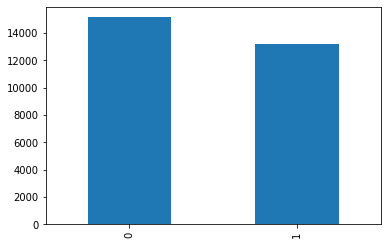

In [215]:
after_2018_02_26_home_shot_rapm_df['shot_made'].value_counts().plot(kind = 'bar')

In [216]:
from sklearn.model_selection import train_test_split


after_2018_02_26_home_shot_rapm_X = after_2018_02_26_home_shot_rapm_df.drop(columns=['event_type_de',
                                                                                     'event_team',
                                                                                     'home_team_abbrev',
                                                                                     'away_team_abbrev',
                                                                                     'seconds_elapsed',
                                                                                     'event_length',
                                                                                     'shot_made'
                                                                                    ])

after_2018_02_26_home_shot_rapm_y = after_2018_02_26_home_shot_rapm_df['shot_made']

after_2018_02_26_home_shot_rapm_X_train, \
after_2018_02_26_home_shot_rapm_X_test, \
after_2018_02_26_home_shot_rapm_y_train, \
after_2018_02_26_home_shot_rapm_y_test = train_test_split(
    after_2018_02_26_home_shot_rapm_X, after_2018_02_26_home_shot_rapm_y, test_size=0.20, random_state=1)

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

after_2018_02_26_home_shot_rapm_random_forest_clf = RandomForestClassifier(random_state=0, 
                                                                           n_estimators=100, 
                                                                           oob_score=True,
                                                                           n_jobs=-1)
after_2018_02_26_home_shot_rapm_random_forest_clf.fit(after_2018_02_26_home_shot_rapm_X_train, 
                                                      after_2018_02_26_home_shot_rapm_y_train)

after_2018_02_26_home_shot_rapm_random_forest_clf.predict(after_2018_02_26_home_shot_rapm_X_train)

print("Random Forest Train R2 score: ", r2_score(after_2018_02_26_home_shot_rapm_y_train, 
                                                 after_2018_02_26_home_shot_rapm_random_forest_clf.predict(
                                                     after_2018_02_26_home_shot_rapm_X_train)
                                                ))
print("Random Forest Test R2 score: ", r2_score(after_2018_02_26_home_shot_rapm_y_test, 
                                                after_2018_02_26_home_shot_rapm_random_forest_clf.predict(
                                                    after_2018_02_26_home_shot_rapm_X_test)
                                               ))
print("Random Forest Train Accuracy: ", accuracy_score(after_2018_02_26_home_shot_rapm_y_train, 
                                                       after_2018_02_26_home_shot_rapm_random_forest_clf.predict(
                                                           after_2018_02_26_home_shot_rapm_X_train)
                                                      ))
print("Random Forest Test Accuracy: ", accuracy_score(after_2018_02_26_home_shot_rapm_y_test, 
                                                       after_2018_02_26_home_shot_rapm_random_forest_clf.predict(
                                                           after_2018_02_26_home_shot_rapm_X_test)
                                                     ))
print("Random Forest ROC AUC Score: ", roc_auc_score(after_2018_02_26_home_shot_rapm_y_train, 
                                                     after_2018_02_26_home_shot_rapm_random_forest_clf.predict(
                                                         after_2018_02_26_home_shot_rapm_X_train)
                                                    ))
print("Random Forest ROC AUC Score: ", roc_auc_score(after_2018_02_26_home_shot_rapm_y_test, 
                                                     after_2018_02_26_home_shot_rapm_random_forest_clf.predict(
                                                         after_2018_02_26_home_shot_rapm_X_test)
                                                    ))

Random Forest Train R2 score:  -0.13075860041373089
Random Forest Test R2 score:  -1.0028477244028537
Random Forest Train Accuracy:  0.7186288332745858
Random Forest Test Accuracy:  0.5014977973568282
Random Forest ROC AUC Score:  0.7155206299589492
Random Forest ROC AUC Score:  0.4979594240129024


In [218]:
after_2018_02_26_home_shot_rapm_feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(after_2018_02_26_home_shot_rapm_X.columns, 
                               after_2018_02_26_home_shot_rapm_random_forest_clf.feature_importances_):
    after_2018_02_26_home_shot_rapm_feats[feature] = importance
    
{k: v for k, v in sorted(after_2018_02_26_home_shot_rapm_feats.items(), 
                         key=lambda item: item[1], 
                         reverse=True)}

{'away_player_5_rapm': 0.0384151303452125,
 'away_player_5_orapm': 0.03816358868857333,
 'away_player_5_drapm': 0.037910812983349265,
 'home_player_5_rapm': 0.03704567999571465,
 'home_player_5_orapm': 0.036838926695878696,
 'home_player_5_drapm': 0.036784481704857125,
 'away_player_4_drapm': 0.03546072519763303,
 'away_player_4_orapm': 0.034965331015996914,
 'away_player_4_rapm': 0.03488307916604981,
 'home_player_4_drapm': 0.034619608678998465,
 'home_player_4_orapm': 0.03420541434192436,
 'away_player_3_rapm': 0.03361359974907127,
 'home_player_4_rapm': 0.03343610286845272,
 'away_player_3_drapm': 0.03333105392899943,
 'away_player_2_drapm': 0.0328363500405132,
 'home_player_3_rapm': 0.03278154429620864,
 'away_player_3_orapm': 0.03268572884090186,
 'away_player_2_orapm': 0.03231133540836331,
 'away_player_1_rapm': 0.03202025391330334,
 'home_player_2_rapm': 0.03200769711876566,
 'away_player_2_rapm': 0.03167456777585604,
 'home_player_2_drapm': 0.030830859286334663,
 'home_player_3

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

after_2018_02_26_home_shot_rapm_log_clf = make_pipeline(StandardScaler(), LogisticRegression())

after_2018_02_26_home_shot_rapm_log_clf.fit(after_2018_02_26_home_shot_rapm_X_train, 
                                                      after_2018_02_26_home_shot_rapm_y_train)

print("Logistic Regression Train R2 score: ", r2_score(after_2018_02_26_home_shot_rapm_y_train, 
                                                       after_2018_02_26_home_shot_rapm_log_clf.predict(
                                                           after_2018_02_26_home_shot_rapm_X_train)
                                                      ))
print("Logistic Regression Test R2 score: ", r2_score(after_2018_02_26_home_shot_rapm_y_test, 
                                                      after_2018_02_26_home_shot_rapm_log_clf.predict(
                                                          after_2018_02_26_home_shot_rapm_X_test)
                                                     ))
print("Logistic Regression Train Accuracy: ", accuracy_score(after_2018_02_26_home_shot_rapm_y_train, 
                                                             after_2018_02_26_home_shot_rapm_log_clf.predict(
                                                                 after_2018_02_26_home_shot_rapm_X_train)
                                                            ))
print("Logistic Regression Test Accuracy: ", accuracy_score(after_2018_02_26_home_shot_rapm_y_test, 
                                                            after_2018_02_26_home_shot_rapm_log_clf.predict(
                                                                after_2018_02_26_home_shot_rapm_X_test)
                                                           ))
print("Logistic Regression ROC AUC Score: ", roc_auc_score(after_2018_02_26_home_shot_rapm_y_train, 
                                                           after_2018_02_26_home_shot_rapm_log_clf.predict(
                                                               after_2018_02_26_home_shot_rapm_X_train)
                                                          ))
print("Logistic Regression ROC AUC Score: ", roc_auc_score(after_2018_02_26_home_shot_rapm_y_test, 
                                                           after_2018_02_26_home_shot_rapm_log_clf.predict(
                                                               after_2018_02_26_home_shot_rapm_X_test)
                                                          ))

Logistic Regression Train R2 score:  -0.8581554576795634
Logistic Regression Test R2 score:  -0.873289175952616
Logistic Regression Train Accuracy:  0.5376277758195277
Logistic Regression Test Accuracy:  0.5337444933920705
Logistic Regression ROC AUC Score:  0.510272036728361
Logistic Regression ROC AUC Score:  0.5067509169929567


/Users/dzhang200/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [220]:
len(RAPM_dict)

43

In [221]:
RAPM_dict.keys()

dict_keys([Timestamp('2018-02-27 00:00:00'), Timestamp('2018-02-28 00:00:00'), Timestamp('2018-03-01 00:00:00'), Timestamp('2018-03-02 00:00:00'), Timestamp('2018-03-03 00:00:00'), Timestamp('2018-03-04 00:00:00'), Timestamp('2018-03-05 00:00:00'), Timestamp('2018-03-06 00:00:00'), Timestamp('2018-03-07 00:00:00'), Timestamp('2018-03-08 00:00:00'), Timestamp('2018-03-09 00:00:00'), Timestamp('2018-03-10 00:00:00'), Timestamp('2018-03-11 00:00:00'), Timestamp('2018-03-12 00:00:00'), Timestamp('2018-03-13 00:00:00'), Timestamp('2018-03-14 00:00:00'), Timestamp('2018-03-15 00:00:00'), Timestamp('2018-03-16 00:00:00'), Timestamp('2018-03-17 00:00:00'), Timestamp('2018-03-18 00:00:00'), Timestamp('2018-03-19 00:00:00'), Timestamp('2018-03-20 00:00:00'), Timestamp('2018-03-21 00:00:00'), Timestamp('2018-03-22 00:00:00'), Timestamp('2018-03-23 00:00:00'), Timestamp('2018-03-24 00:00:00'), Timestamp('2018-03-25 00:00:00'), Timestamp('2018-03-26 00:00:00'), Timestamp('2018-03-27 00:00:00'), Tim

In [222]:
list(RAPM_dict.values())[0]

,Player,PlayerId,ORAPM,DRAPM,RAPM
504,Marshall Plumlee,1627850,-36.010283,70.934984,34.924700
503,Kadeem Allen,1628443,-31.574098,55.702041,24.127943
502,Jacob Wiley,1628451,-29.254460,51.407135,22.152675
501,Bruno Caboclo,203998,-26.215676,47.898290,21.682614
1,RJ Hunter,1626154,92.131128,-71.008966,21.122162
...,...,...,...,...,...
4,Ben Moore,1628500,49.112531,-56.912633,-7.800101
3,London Perrantes,1628506,49.490428,-58.113299,-8.622871
6,Erik McCree,1628571,29.849698,-39.267839,-9.418141
5,Johnathan Motley,1628405,31.432977,-42.474800,-11.041823


In [223]:
list(RAPM_dict.values())[1]

,Player,PlayerId,ORAPM,DRAPM,RAPM
505,Marshall Plumlee,1627850,-36.497557,73.267950,36.770394
504,Kadeem Allen,1628443,-30.931979,55.611584,24.679605
503,Jacob Wiley,1628451,-28.553381,50.748180,22.194799
1,RJ Hunter,1626154,92.434116,-70.830337,21.603779
502,Bruno Caboclo,203998,-26.822988,48.194712,21.371724
...,...,...,...,...,...
6,Ben Moore,1628500,29.067608,-36.581202,-7.513594
4,Johnathan Motley,1628405,46.713232,-55.332254,-8.619022
3,London Perrantes,1628506,49.105032,-58.494831,-9.389799
5,Erik McCree,1628571,31.102911,-40.863543,-9.760632


In [224]:
list(RAPM_dict.values())[2]

,Player,PlayerId,ORAPM,DRAPM,RAPM
504,Marshall Plumlee,1627850,-34.993336,73.425443,38.432107
503,Jacob Wiley,1628451,-30.491299,55.509170,25.017871
502,Kadeem Allen,1628443,-28.300929,51.751952,23.451023
1,RJ Hunter,1626154,92.216736,-70.250830,21.965906
501,Charles Cooke,1628429,-27.124253,46.816476,19.692223
...,...,...,...,...,...
3,London Perrantes,1628506,50.576760,-57.360951,-6.784191
7,Reggie Hearn,203687,28.411551,-35.527111,-7.115560
6,Erik McCree,1628571,29.894604,-37.279747,-7.385143
5,Ben Moore,1628500,29.907282,-39.584635,-9.677353


In [225]:
list(RAPM_dict.values())[3]

,Player,PlayerId,ORAPM,DRAPM,RAPM
503,Marshall Plumlee,1627850,-34.238325,71.404668,37.166343
1,RJ Hunter,1626154,93.380685,-66.967874,26.412811
501,Jacob Wiley,1628451,-29.403583,54.471718,25.068135
502,Kadeem Allen,1628443,-31.446239,55.777084,24.330845
500,Jusuf Nurkic,203994,-28.835919,46.097441,17.261522
...,...,...,...,...,...
7,Reggie Hearn,203687,30.713085,-36.118982,-5.405897
6,Erik McCree,1628571,31.221019,-37.346240,-6.125220
3,London Perrantes,1628506,50.617910,-57.529607,-6.911697
5,Ben Moore,1628500,31.262426,-39.351915,-8.089489


In [226]:
list(RAPM_dict.values())[4]

,Player,PlayerId,ORAPM,DRAPM,RAPM
504,Marshall Plumlee,1627850,-34.313697,69.194822,34.881125
1,RJ Hunter,1626154,94.459078,-67.368890,27.090188
502,Udonis Haslem,2617,-29.751923,54.099644,24.347721
503,Jacob Wiley,1628451,-32.230129,55.920341,23.690212
501,Kadeem Allen,1628443,-28.406717,48.697589,20.290873
...,...,...,...,...,...
16,Mangok Mathiang,1628493,15.830784,-19.269478,-3.438694
7,Jack Cooley,204022,30.889858,-35.641761,-4.751902
6,Ben Moore,1628500,31.211684,-36.511434,-5.299750
3,London Perrantes,1628506,50.129490,-59.088025,-8.958535


In [227]:
list(RAPM_dict.values())[5]

,Player,PlayerId,ORAPM,DRAPM,RAPM
504,Marshall Plumlee,1627850,-34.911506,69.102151,34.190645
1,RJ Hunter,1626154,94.523246,-67.613761,26.909484
503,Jacob Wiley,1628451,-31.722281,57.255985,25.533704
502,Kadeem Allen,1628443,-29.486096,52.351194,22.865098
501,Jon Leuer,202720,-29.438884,49.716533,20.277650
...,...,...,...,...,...
22,Georgios Papagiannis,1627834,12.175898,-16.173757,-3.997859
21,Markel Brown,203900,12.386585,-16.485347,-4.098762
23,Jeff Withey,203481,11.667790,-15.873640,-4.205850
3,London Perrantes,1628506,50.726251,-57.361292,-6.635041


In [35]:
game_pbp = ns.scrape_game(['21700002'])

Scraping game id: 0021700002


In [36]:
game_pbp

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id
0,0021700002,2,12,0,1,11:02 PM,12:00,None,None,None,None,None,0.0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,period-start,,NaN,0,NaN,0,NaN,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Stephen Curry,201939,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,Chris Paul,101108
1,0021700002,4,10,0,1,11:02 PM,12:00,Jump Ball Pachulia vs. Capela: Tip to Anderson,None,None,None,None,4.0,2585,Zaza Pachulia,1.610613e+09,Golden State,Warriors,GSW,5,203991,Clint Capela,1.610613e+09,Houston,Rockets,HOU,5,201583,Ryan Anderson,1.610613e+09,Houston,Rockets,HOU,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,GSW,jump-ball,,NaN,0,NaN,0,0.0,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Stephen Curry,201939,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,Chris Paul,101108
2,0021700002,7,1,6,1,11:03 PM,11:47,None,None,Harden 2' Driving Layup (2 PTS),2 - 0,-2,5.0,201935,James Harden,1.610613e+09,Houston,Rockets,HOU,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,shot,,1.0,0,Driving Layup Shot,13,13.0,0,2,0,0,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Stephen Curry,201939,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,Chris Paul,101108
3,0021700002,8,2,1,1,11:03 PM,11:27,MISS Green 25' 3PT Jump Shot,None,None,None,None,4.0,203110,Draymond Green,1.610613e+09,Golden State,Warriors,GSW,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,GSW,missed_shot,,0.0,0,Jump Shot,33,20.0,1,0,0,0,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Stephen Curry,201939,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,Chris Paul,101108
4,0021700002,9,4,0,1,11:03 PM,11:23,None,None,Capela REBOUND (Off:0 Def:1),None,None,5.0,203991,Clint Capela,1.610613e+09,Houston,Rockets,HOU,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,rebound,,NaN,0,NaN,37,4.0,0,0,0,1,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Stephen Curry,201939,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,Chris Paul,101108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,0021700002,676,9,1,4,1:27 AM,0:10,WARRIORS Timeo

In [7]:
for i, p in game_pbp:
    print(p)

game_id
eventnum
eventmsgtype
eventmsgactiontype
period
wctimestring
pctimestring
homedescription
neutraldescription
visitordescription
score
scoremargin
person1type
player1_id
player1_name
player1_team_id
player1_team_city
player1_team_nickname
player1_team_abbreviation
person2type
player2_id
player2_name
player2_team_id
player2_team_city
player2_team_nickname
player2_team_abbreviation
person3type
player3_id
player3_name
player3_team_id
player3_team_city
player3_team_nickname
player3_team_abbreviation
video_available_flag
home_team_abbrev
away_team_abbrev
home_team_id
away_team_id
game_date
season
event_team
event_type_de
shot_type_de
shot_made
is_block
shot_type
seconds_elapsed
event_length
is_three
points_made
is_o_rebound
is_d_rebound
is_turnover
is_steal
foul_type
is_putback
home_player_1
home_player_1_id
home_player_2
home_player_2_id
home_player_3
home_player_3_id
home_player_4
home_player_4_id
home_player_5
home_player_5_id
away_player_1
away_player_1_id
away_player_2
away_play

In [ ]:
game_pbp.shift(-1).

In [28]:
def get_on_court_players(pbp_event):
    on_court_players = [pbp_event['home_player_1_id'], \
                        pbp_event['home_player_2_id'], \
                        pbp_event['home_player_3_id'], \
                        pbp_event['home_player_4_id'], \
                        pbp_event['home_player_5_id'], \
                        pbp_event['away_player_1_id'], \
                        pbp_event['away_player_2_id'], \
                        pbp_event['away_player_3_id'], \
                        pbp_event['away_player_4_id'], \
                        pbp_event['away_player_5_id']]
                        
    
    return set(on_court_players)

In [100]:
g_record = game_pbp.to_dict('records')

matchups = []
matchup = []
pbp_event = g_record[0]
pbp_event['event_num'] = 0
matchup.append(pbp_event)

for i, pbp_event in enumerate(g_record[1:], 1):
    pbp_event['event_num'] = i

        
    if get_on_court_players(pbp_event) != get_on_court_players(g_record[i - 1]):
#         print("in get_on_court_players(pbp_event) != get_on_court_players(g_record[i - 1]), i: ", i)
        
        if pbp_event['event_type_de'] == 'substitution':
            if len(matchup) == 1 and g_record[i - 1]['event_type_de'] == 'free-throw':
                prev_matchup = matchups.pop()
                matchup = prev_matchup + matchup
            
            if not substituing:
                matchups.append(matchup)
                matchup = []
                substituing = True
                
            continue
            
        matchups.append(matchup)
        matchup = []
            
    if pbp_event['event_type_de'] != 'substitution':
        substituing = False
        matchup.append(pbp_event)
        
matchups.append( matchup)

    

In [101]:
len(matchups)

31

In [102]:
for i, matchup in enumerate(matchups):
    players = set()
    for event in matchup:
        players.update(get_on_court_players(event))
        
    print("i: " + str(i) + " len(players): " + str(len(players)) + ", len(matchup): " + str(len(matchup)) + \
          ", from event " + str(matchup[0]['event_num']) + " to event " + str(matchup[-1]['event_num']))

i: 0 len(players): 10, len(matchup): 38, from event 0 to event 37
i: 1 len(players): 10, len(matchup): 9, from event 39 to event 47
i: 2 len(players): 10, len(matchup): 9, from event 50 to event 58
i: 3 len(players): 10, len(matchup): 12, from event 60 to event 71
i: 4 len(players): 10, len(matchup): 5, from event 73 to event 77
i: 5 len(players): 10, len(matchup): 9, from event 79 to event 87
i: 6 len(players): 10, len(matchup): 9, from event 91 to event 99
i: 7 len(players): 10, len(matchup): 9, from event 101 to event 109
i: 8 len(players): 10, len(matchup): 7, from event 111 to event 117
i: 9 len(players): 10, len(matchup): 41, from event 118 to event 158
i: 10 len(players): 10, len(matchup): 5, from event 164 to event 168
i: 11 len(players): 10, len(matchup): 10, from event 170 to event 179
i: 12 len(players): 10, len(matchup): 30, from event 181 to event 210
i: 13 len(players): 10, len(matchup): 8, from event 213 to event 220
i: 14 len(players): 10, len(matchup): 16, from event 2

In [95]:
for i, matchup in enumerate(matchups):
    players = set()
    for event in matchup:
        players.update(get_on_court_players(event))
        
    print("i: " + str(i) + " len(players): " + str(len(players)) + ", len(matchup): " + str(len(matchup)) + \
          ", from event " + str(matchup[0]['event_num']) + " to event " + str(matchup[-1]['event_num']))

i: 0 len(players): 10, len(matchup): 38, from event 0 to event 37
i: 1 len(players): 10, len(matchup): 9, from event 39 to event 47
i: 2 len(players): 10, len(matchup): 9, from event 50 to event 58
i: 3 len(players): 10, len(matchup): 12, from event 60 to event 71
i: 4 len(players): 10, len(matchup): 5, from event 73 to event 77
i: 5 len(players): 10, len(matchup): 9, from event 79 to event 87
i: 6 len(players): 10, len(matchup): 9, from event 91 to event 99
i: 7 len(players): 10, len(matchup): 9, from event 101 to event 109
i: 8 len(players): 10, len(matchup): 7, from event 111 to event 117
i: 9 len(players): 10, len(matchup): 41, from event 118 to event 158
i: 10 len(players): 10, len(matchup): 5, from event 164 to event 168
i: 11 len(players): 10, len(matchup): 10, from event 170 to event 179
i: 12 len(players): 10, len(matchup): 30, from event 181 to event 210
i: 13 len(players): 10, len(matchup): 8, from event 213 to event 220
i: 14 len(players): 10, len(matchup): 16, from event 2

In [104]:
game_pbp.iloc[378:386, :]

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id
378,0021700002,569,2,79,4,1:07 AM,8:07,None,None,MISS Gordon 27' 3PT Pullup Jump Shot,None,None,5.0,201569,Eric Gordon,1.610613e+09,Houston,Rockets,HOU,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,missed_shot,,0.0,0,Pullup Jump shot,2393,17.0,1,0,0,0,0,0,NaN,0,Kevin Durant,201142,Stephen Curry,201939,Nick Young,201156,Shaun Livingston,2733,David West,2561,Trevor Ariza,2772,Ryan Anderson,201583,Chris Paul,101108,Eric Gordon,201569,Luc Mbah a Moute,201601
379,0021700002,570,4,0,4,1:08 AM,8:05,None,None,Rockets Rebound,None,None,3.0,1610612745,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,rebound,,NaN,0,NaN,2395,2.0,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Stephen Curry,201939,Nick Young,201156,Shaun Livingston,2733,David West,2561,Trevor Ariza,2772,Ryan Anderson,201583,Chris Paul,101108,Eric Gordon,201569,Luc Mbah a Moute,201601
380,0021700002,574,8,0,4,1:08 AM,8:05,SUB: Looney FOR West,None,None,None,None,4.0,2561,David West,1.610613e+09,Golden State,Warriors,GSW,4,1626172,Kevon Looney,1.610613e+09,Golden State,Warriors,GSW,0,0,None,NaN,None,None,None,0,GSW,HOU,1610612744,1610612745,2017-10-17,2018,GSW,substitution,,NaN,0,NaN,2395,0.0,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Stephen Curry,201939,Nick Young,201156,Shaun Livingston,2733,Kevon Looney,1626172,Trevor Ariza,2772,Ryan Anderson,201583,Chris Paul,101108,Eric Gordon,201569,Luc Mbah a Moute,201601
381,0021700002,575,8,0,4,1:08 AM,8:05,None,None,SUB: Harden FOR Ariza,None,None,5.0,2772,Trevor Ariza,1.610613e+09,Houston,Rockets,HOU,5,201935,James Harden,1.610613e+09,Houston,Rockets,HOU,0,0,None,NaN,None,None,None,0,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,substitution,,NaN,0,NaN,2395,0.0,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Stephen Curry,201939,Nick Young,201156,Shaun Livingston,2733,Kevon Looney,1626172,Ryan Anderson,201583,Chris Paul,101108,Eric Gordon,201569,Luc Mbah a Moute,201601,James Harden,201935
382,0021700002,576,8,0,4,1:08 AM,8:05,None,None,SUB: Tucker FOR Gordon,None,None,5.0,201569,Eric Gordon,1.610613e+09,Houston,Rockets,HOU,5,200782,P.J. Tucker,1.610613e+09,Houston,Rockets,HOU,0,0,None,NaN,None,None,None,0,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,substitution,,NaN,0,NaN,2395,0.0,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Stephen Curry,201939,Nick Young,201156,Shaun Livingston,2733,Kevon Looney,1626172,Ryan Anderson,201583,Chris Paul,101108,Luc Mbah a Moute,201601,James Harden,201935,P.J. Tucker,200782
383,0021700002,577,6,1,4,1:08 AM,8:04,Durant P.FOUL (P4.T2) (S.Foster),None,None,None,None,4.0,201142,Kevin Durant,1.610613e+09,Golden State,Warriors,GSW,5,201583,Ryan Anderson,1.610613e+09,Houston,Rockets,HOU,1,0,None,NaN,None,None,None,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,GSW,foul,,NaN,0,NaN,2396,1.0,0,0,0,0,0,0,pe

In [61]:
game_pbp.iloc[45:51, :]

,game_id,eventnum,eventmsgtype,eventmsgactiontype,period,wctimestring,pctimestring,homedescription,neutraldescription,visitordescription,score,scoremargin,person1type,player1_id,player1_name,player1_team_id,player1_team_city,player1_team_nickname,player1_team_abbreviation,person2type,player2_id,player2_name,player2_team_id,player2_team_city,player2_team_nickname,player2_team_abbreviation,person3type,player3_id,player3_name,player3_team_id,player3_team_city,player3_team_nickname,player3_team_abbreviation,video_available_flag,home_team_abbrev,away_team_abbrev,home_team_id,away_team_id,game_date,season,event_team,event_type_de,shot_type_de,shot_made,is_block,shot_type,seconds_elapsed,event_length,is_three,points_made,is_o_rebound,is_d_rebound,is_turnover,is_steal,foul_type,is_putback,home_player_1,home_player_1_id,home_player_2,home_player_2_id,home_player_3,home_player_3_id,home_player_4,home_player_4_id,home_player_5,home_player_5_id,away_player_1,away_player_1_id,away_player_2,away_player_2_id,away_player_3,away_player_3_id,away_player_4,away_player_4_id,away_player_5,away_player_5_id
45,0021700002,72,4,0,1,11:11 PM,6:59,Green REBOUND (Off:0 Def:2),None,None,None,None,4.0,203110,Draymond Green,1.610613e+09,Golden State,Warriors,GSW,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,GSW,rebound,,NaN,0,NaN,301,4.0,0,0,0,1,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Patrick McCaw,1627775,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,Chris Paul,101108
46,0021700002,73,1,2,1,11:11 PM,6:56,Thompson 3PT Running Jump Shot (11 PTS) (Dura...,None,None,9 - 22,13,4.0,202691,Klay Thompson,1.610613e+09,Golden State,Warriors,GSW,4,201142,Kevin Durant,1.610613e+09,Golden State,Warriors,GSW,0,0,None,NaN,None,None,None,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,GSW,shot,,1.0,0,Running Jump Shot,304,3.0,1,3,0,0,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Patrick McCaw,1627775,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,Chris Paul,101108
47,0021700002,75,9,1,1,11:11 PM,6:55,None,None,Rockets Timeout: Regular (Reg.1 Short 0),None,None,3.0,1610612745,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,0,None,NaN,None,None,None,0,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,team-timeout,,NaN,0,NaN,305,1.0,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Patrick McCaw,1627775,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,Chris Paul,101108
48,0021700002,78,8,0,1,11:12 PM,6:55,None,None,SUB: Tucker FOR Paul,None,None,5.0,101108,Chris Paul,1.610613e+09,Houston,Rockets,HOU,5,200782,P.J. Tucker,1.610613e+09,Houston,Rockets,HOU,0,0,None,NaN,None,None,None,0,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,substitution,,NaN,0,NaN,305,0.0,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Patrick McCaw,1627775,Trevor Ariza,2772,Ryan Anderson,201583,Clint Capela,203991,James Harden,201935,P.J. Tucker,200782
49,0021700002,79,8,0,1,11:12 PM,6:55,None,None,SUB: Gordon FOR Capela,None,None,5.0,203991,Clint Capela,1.610613e+09,Houston,Rockets,HOU,5,201569,Eric Gordon,1.610613e+09,Houston,Rockets,HOU,0,0,None,NaN,None,None,None,0,GSW,HOU,1610612744,1610612745,2017-10-17,2018,HOU,substitution,,NaN,0,NaN,305,0.0,0,0,0,0,0,0,NaN,0,Kevin Durant,201142,Draymond Green,203110,Zaza Pachulia,2585,Klay Thompson,202691,Patrick McCaw,1627775,Trevor Ariza,2772,Ryan Anderson,201583,James Harden,201935,P.J. Tucker,200782,Eric Gordon,201569
50,0021700002,80,2,5,1,11:15 PM,6:43,Durant BLOCK (1 BLK),None,MISS Harden 2' Layup,None,None,5.0,201935,James Harden,1.610613e+09,Houston,Rockets,HOU,0,0,None,NaN,None,None,None,4,201142,Kevin Durant,1.610613e+09,Golden State,Warriors,GSW,1,GSW,HOU,1610612744,1610612745,2017-10-17,2018,H

In [44]:
g_record[456]

{'game_id': '0021700002',
 'eventnum': 686,
 'eventmsgtype': 13,
 'eventmsgactiontype': 0,
 'period': 4,
 'wctimestring': '1:30 AM',
 'pctimestring': '0:00',
 'homedescription': None,
 'neutraldescription': None,
 'visitordescription': None,
 'score': '122 - 121',
 'scoremargin': '-1',
 'person1type': 0.0,
 'player1_id': 0,
 'player1_name': None,
 'player1_team_id': nan,
 'player1_team_city': None,
 'player1_team_nickname': None,
 'player1_team_abbreviation': None,
 'person2type': 0,
 'player2_id': 0,
 'player2_name': None,
 'player2_team_id': nan,
 'player2_team_city': None,
 'player2_team_nickname': None,
 'player2_team_abbreviation': None,
 'person3type': 0,
 'player3_id': 0,
 'player3_name': None,
 'player3_team_id': nan,
 'player3_team_city': None,
 'player3_team_nickname': None,
 'player3_team_abbreviation': None,
 'video_available_flag': 1,
 'home_team_abbrev': 'GSW',
 'away_team_abbrev': 'HOU',
 'home_team_id': 1610612744,
 'away_team_id': 1610612745,
 'game_date': Timestamp('2

In [30]:
game_pbp['event_type_de'].unique()

array(['period-start', 'jump-ball', 'shot', 'missed_shot', 'rebound',
       'foul', 'free-throw', 'turnover', 'substitution', 'goal-tending',
       'team-timeout', 'period-end', 'instant-replay'], dtype=object)